# Module 771762 - Big Data & Data Mining 
# Accident Data Course Work
### Student ID: 202403820 | Samuel Datubo Jaja
### MSc Artificial Intelligence & Data Science | DAIM - Data-Science Artificial Intelligence & Modelling¶

## Installing and Importing Libraries 

In [38]:
#please after these instalation ensure kernel is restarted else the association rule library might flag an error
!pip install mlxtend==0.23.1      
!pip install --upgrade matplotlib seaborn
!pip install python-louvain            
!pip install --upgrade mlxtend
!pip install folium                    
#After installing these libraries please ensure your restart the kernal before running other lines of code else it may say no module not found

Defaulting to user installation because normal site-packages is not writeable
  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.3
    Uninstalling mlxtend-0.23.3:
      Successfully uninstalled mlxtend-0.23.3



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached mlxtend-0.23.3-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.3-py3-none-any.whl (1.4 MB)
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.1
    Uninstalling mlxtend-0.23.1:
      Successfully uninstalled mlxtend-0.23.1



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Importing necessary libraries for the project --->if any issue while running this code block, restart kernal and run again
import warnings
warnings.filterwarnings('ignore') #ensuring warning are ignored not to make the notebook clustered and longer
#database connection and management
import sqlite3
import os

#data manipulation and analysis libraries
import pandas as pd
import numpy as np
from itertools import product

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

#machine learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules

#time series analysis libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#network analysis libraries
import networkx as nx
from networkx.algorithms.community import girvan_newman
import community as community_louvain

print("Importation Complete... Please Proceed")

Importation Complete... Please Proceed


## 2020 Accident Data Extraction with Associated Tables from SQL to Pandas 

In [2]:
#Connect to the SQLite accident_data_v1.0.0_2023.db
#Create cursor for executing SQL queries
connection = sqlite3.connect("accident_data_v1.0.0_2023.db")
cursor = connection.cursor()

In [3]:
#Query to list all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#Fetching all table names
tables = cursor.fetchall()
#Displaying the result
print("Tables in the database:")
for table in tables:
    print(table[0])  #Each result is a tuple, so I am accessing the first element

Tables in the database:
accident
casualty
vehicle
lsoa


In [4]:
#get accident table column information using PRAGMA
#fetch and display all column details
col_info_accident = cursor.execute(f"PRAGMA table_info(accident)")
col_info_accident.fetchall()

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [5]:
#extract all 2020 accident records from database
#load query results into pandas dataframe
#display the dataframe
query = "SELECT * FROM accident WHERE accident_year = 2020"
accident_df= pd.read_sql(query, connection)
accident_df

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [6]:
#The info function display the  summary of the accident_df DataFrame,provideimg key information about the dataset, such as:
#Number of rows and columns, Column names and their data types (e.g., int64, float64, object), 
#Non-null counts for each column (helps identify missing data)

accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [7]:
#get vehicle table column information using PRAGMA
#fetch and display all column details from vehicle table
col_info_vehicle = cursor.execute(f"PRAGMA table_info(vehicle)")
col_info_vehicle.fetchall()

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [8]:
#extract all 2020 vehicle records from database
#load query results into pandas dataframe
#display the vehicle dataframe
query = "SELECT * FROM vehicle WHERE accident_year = 2020"
vehicle_df= pd.read_sql(query, connection)
vehicle_df

vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


In [9]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [10]:
col_info_casualty = cursor.execute(f"PRAGMA table_info(casualty)").fetchall()
col_info_casualty

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [11]:
#gGet casualty data
query = "SELECT * FROM casualty WHERE accident_year = 2020"
casualty_df = pd.read_sql(query, connection)
casualty_df
# casualty_data = cursor.fetchall()
# df_casualty = pd.DataFrame(casualty_data, columns=casualty_columns)
# df_casualty

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [12]:
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [13]:
#retrieve information about the 'lsoa' table schema using SQLite's PRAGMA command
#display the retrieved table schema information
col_info_lsoa = cursor.execute(f"PRAGMA table_info(lsoa)").fetchall()
col_info_lsoa

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [14]:
#extract all lsoa records from database
#load query results into pandas dataframe
#display the lsoa dataframe
query = "SELECT * FROM lsoa"
lsao_df = pd.read_sql(query, connection)
lsao_df

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

In [15]:
#displaying a summary of the lsao_df DataFrame including column names data types, and non-null counts
lsao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


## Data Cleaner Class Implementation with Functions 
After reading through the dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2023-1.xlsx:
This form states the meaning of the numerical values in each column and gives the best hint on how to clean the columns. The ideas on how to approach the cleaning came from studying this excel file. 

In [16]:
#class for cleaning and preprocessing data in a dictionary of DataFrames
class DataCleaner:
    def __init__(self, tables):
        """
        Initialize the DataCleaner with a dictionary of tables.
        :param tables: Dictionary of DataFrames {table_name: DataFrame}
        """
        self.tables = tables  # store the dictionary of DataFrames as an instance variable

    def drop_invalid_values(self, invalid_value=-1):
        """
        Drop rows where any column contains the specified invalid value.
        :param invalid_value: Value to be treated as invalid (default: -1)
        """
        for table_name, df in self.tables.items():  # iterate over each table in the dictionary
            print(f"Cleaning table: {table_name}")  # log the table being cleaned
            initial_shape = df.shape  # store the initial shape of the DataFrame
            self.tables[table_name] = df.replace(invalid_value, pd.NA).dropna()  # replace invalid values and drop rows with missing values
            print(f"{table_name}: Dropped rows with invalid value '{invalid_value}'.")  # log the action
            print(f"Shape before: {initial_shape}, after: {self.tables[table_name].shape}")  # log shape change

    def clean_whitespace(self):
        """
        Strip leading and trailing whitespaces from string columns.
        """
        for table_name, df in self.tables.items():  # iterate over each table in the dictionary
            self.tables[table_name] = df.applymap(  # apply a function to all elements in the DataFrame
                lambda x: x.strip() if isinstance(x, str) else x  # strip whitespace if the element is a string
            )
            print(f"{table_name}: Whitespace cleaned from string columns.")  #log the action

    def convert_data_types(self, conversion_map):
        """
        Convert column data types for specified tables based on a provided conversion map.
    
        :param conversion_map: Dictionary {table_name: {column_name: dtype}}
            - table_name: Name of the table to convert types for.
            - column_name: Name of the column in the table.
            - dtype: Target data type for the column.
        
        This method updates the data types of specified columns in the specified tables. 
        If a table is not found, an exception is raised and logged. Any other exceptions 
        during type conversion are also caught and logged.
        """
        for table_name, col_types in conversion_map.items():  # iterate through the conversion map
            try:
                if table_name in self.tables:  # check if the table exists in the dictionary
                    self.tables[table_name] = self.tables[table_name].astype(col_types)  # convert data types for the specified columns
                    print(f"{table_name}: Data types converted successfully.")  # log successful conversion
                else:
                    # raise an error if the table is not found
                    raise KeyError(f"Table {table_name} not found")  
            except Exception as e:  # catch and handle any exceptions during type conversion
                print(f"Error converting types for {table_name}: {str(e)}")  # log the error message


    def drop_duplicates(self):
        """
        Drop duplicate rows in each table.
        """
        for table_name, df in self.tables.items():  # iterate over each table in the dictionary
            initial_shape = df.shape  # store the initial shape of the DataFrame
            self.tables[table_name] = df.drop_duplicates()  # drop duplicate rows
            print(f"{table_name}: Dropped duplicates. Shape before: {initial_shape}, after: {self.tables[table_name].shape}")  # log shape change

    def summary(self):
        """
        Print a summary of each table (rows, columns, and missing values).
        """
        for table_name, df in self.tables.items():  # iterate over each table in the dictionary
            print(f"\nSummary of {table_name}:")  # log the table name
            print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")  # log the number of rows and columns
            print("Missing Values:")  # log missing values
            print(df.isnull().sum())  # calculate and display missing values for each column

    def get_cleaned_table(self, table_name):
        """
        Get the cleaned table by name.
        :param table_name: Name of the table to retrieve.
        :return: Cleaned DataFrame
        """
        return self.tables.get(table_name, None)  # return the cleaned DataFrame or None if it doesn't exist


In [17]:
#storing tables in a dictionary
tables = {
    "accidents": accident_df,
    "vehicles": vehicle_df,
    "casualties": casualty_df,
    "lsao": lsao_df
}

#initializing the cleaner
cleaner = DataCleaner(tables)

#performing cleaning operation
cleaner.drop_invalid_values(invalid_value=-1)  #drop rows with -1
cleaner.clean_whitespace()                    #remove leading/trailing spaces
cleaner.drop_duplicates()                     #drop duplicate rows

#converting specific column types
conversion_map = {
    "accidents": {"date": "datetime64[ns]", "police_force": "int", "time": "datetime64[ns]"}, #considering adding time here too "time": "datetime64[ns]"
    "vehicles": {"vehicle_type": "int", "age_of_vehicle": "float"},
}
cleaner.convert_data_types(conversion_map)

#summarizing the cleaned tables
cleaner.summary()

Cleaning table: accidents
accidents: Dropped rows with invalid value '-1'.
Shape before: (91199, 36), after: (49025, 36)
Cleaning table: vehicles
vehicles: Dropped rows with invalid value '-1'.
Shape before: (167375, 28), after: (103621, 28)
Cleaning table: casualties
casualties: Dropped rows with invalid value '-1'.
Shape before: (115584, 19), after: (102519, 19)
Cleaning table: lsao
lsao: Dropped rows with invalid value '-1'.
Shape before: (34378, 7), after: (34378, 7)
accidents: Whitespace cleaned from string columns.
vehicles: Whitespace cleaned from string columns.
casualties: Whitespace cleaned from string columns.
lsao: Whitespace cleaned from string columns.
accidents: Dropped duplicates. Shape before: (49025, 36), after: (49025, 36)
vehicles: Dropped duplicates. Shape before: (103621, 28), after: (103621, 28)
casualties: Dropped duplicates. Shape before: (102519, 19), after: (102519, 19)
lsao: Dropped duplicates. Shape before: (34378, 7), after: (34378, 7)
accidents: Data type

In [18]:
#rRetrieving cleaned DataFrames for analysis 
cleaned_accidents_df = cleaner.get_cleaned_table("accidents")
cleaned_vehicles_df = cleaner.get_cleaned_table("vehicles")
cleaned_casualties_df = cleaner.get_cleaned_table("casualties")
cleaned_lsao_df = cleaner.get_cleaned_table("lsao")

In [19]:
#displaying the cleaned accident data
cleaned_accidents_df

accident_index  accident_year accident_reference  location_easting_osgr  \
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
4      2020010228011           2020          010228011               529324.0   
5      2020010228012           2020          010228012               537193.0   
6      2020010228014           2020          010228014               539764.0   
...              ...            ...                ...                    ...   
84478  2020552100251           2020          552100251               412079.0   
84479  2020552100252           2020          552100252               406477.0   
84484  2020552100257           2020          552100257               366311.0   
84487  2020552100260           2020          552100260               384374.0   
84488  2020552100261           2020          552100261               407254.0   

       location_northing_osgr  longitude   latitude  police_force  \
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
4                    181286.0  -0.137592  51.515704             1   
5                    177105.0  -0.025880  51.476278             1   
6                    179234.0   0.011959  51.494780             1   
...                       ...        ...        ...           ...   
84478                 92087.0  -1.830219  50.728268            55   
84479                 90940.0  -1.909608  50.718041            55   
84484                114188.0  -2.480706  50.926148            55   
84487                 86881.0  -2.222531  50.681363            55   
84488                 93802.0  -1.898546  50.743769            55   

       accident_severity  number_of_vehicles  ...  \
1                      3                   1  ...   
2                      3                   1  ...   
4                      3                   1  ...   
5                      3                   1  ...   
6                      3                   2  ...   
...                  ...                 ...  ...   
84478                  3                   1  ...   
84479                  3                   1  ...   
84484                  2                   2  ...   
84487                  3                   2  ...   
84488                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
1                                            4                1   
2                                            0                4   
4                                            0                4   
5                                            0                4   
6                                            0                4   
...                                        ...              ...   
84478                                        0                1   
84479                                        0                4   
84484                                        0                1   
84487                                        0                1   
84488                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
1                       1                       1                           0   
2                       1                       2                           0   
4                       1                       1                           0   
5                       1                       1                           0   
6                       1                       2                           0   
...                   ...                     ...                         ...   
84478                   1                       1                           0   
84479                   1                       1                           0   
84484                   1        

In [20]:
cleaned_vehicles_df #inspecting and exploring cleaned_vehicles_df a bbit before starting analysis proper

vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
3              681719  2020010228006           2020          010228006   
5              681721  2020010228012           2020          010228012   
6              681722  2020010228014           2020          010228014   
...               ...            ...            ...                ...   
167369         849085  2020991029573           2020          991029573   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
3                       1             8                        0   
5                       1             9                        0   
6                       1             9                        0   
...                   ...           ...                      ...   
167369                  1             9                        0   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
3                      18                       1                     5  ...   
5                      18                       1                     5  ...   
6                      18                       5                     1  ...   
...                   ...                     ...                   ...  ...   
167369                  1                       5                     1  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
3                               1              1             44   
5                               6              1             25   
6                               1              1             41   
...                           ...            ...            ...   
167369                          3              2             39   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
3                        7                1798                8   
5                        5                1390                1   
6                        7                1969                2   
...                    ...                 ...              ...   
167369                   7                1598                1   


In [21]:
cleaned_lsao_df #inspecting and exploring cleaned_lsao_df a bbit before starting analysis proper

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

In [22]:
cleaned_accidents_df.info() #reconfirming summary

<class 'pandas.core.frame.DataFrame'>
Index: 49025 entries, 1 to 84488
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               49025 non-null  object        
 1   accident_year                                49025 non-null  int64         
 2   accident_reference                           49025 non-null  object        
 3   location_easting_osgr                        49025 non-null  float64       
 4   location_northing_osgr                       49025 non-null  float64       
 5   longitude                                    49025 non-null  float64       
 6   latitude                                     49025 non-null  float64       
 7   police_force                                 49025 non-null  int32         
 8   accident_severity                            49025 non-null  int64         
 9   

In [23]:
cleaned_accidents_df['time'] =  pd.to_datetime(cleaned_accidents_df['time'], format='%H:%M') #Based on the date set guide excel file   format='%H:%M', dayfirst=True
cleaned_accidents_df['date'] =  pd.to_datetime(cleaned_accidents_df['date'], dayfirst=True) #Based on the date set guide excel file 

In [24]:
print(cleaned_accidents_df['date'].dtype) #reconfirming data type

datetime64[ns]


In [25]:
print(cleaned_accidents_df['time'].dtype) #reconfirming data type

datetime64[ns]


In [26]:
print(cleaned_accidents_df['day_of_week'].dtype) #reconfirming data type

int64


## Temporal Analysis - Accident Patterns by Time and Day of Week

Question 1-3 have a related analysis, so for that reason I will use a common class for structuring the first 3 question in a modular fashion

In [27]:
class AccidentAnalysis:
    """
    A class to analyze accident patterns and frequencies across different timeframes and categories.
    
    Attributes:
        cleaned_accidents_df (pd.DataFrame): DataFrame containing cleaned accident records
        cleaned_vehicles_df (pd.DataFrame): Optional DataFrame containing cleaned vehicle records
    """
    def __init__(self, cleaned_accidents_df, cleaned_vehicles_df=None):
        """
        Initialize AccidentAnalysis with cleaned dataframes.

        Args:
            cleaned_accidents_df (pd.DataFrame): DataFrame with accident records
            cleaned_vehicles_df (pd.DataFrame, optional): DataFrame with vehicle records
        """

        #create copies to avoid modifying original dataframes
        self.cleaned_accidents_df = cleaned_accidents_df.copy()
        self.cleaned_vehicles_df = cleaned_vehicles_df.copy() if cleaned_vehicles_df is not None else None

    @staticmethod                                      #a static method is a method that does not need an instance of its class to be called
    
    def preprocess_time_column(df, time_column):
        """
        Preprocess time data for analysis by extracting hour information.

        Args:
            df (pd.DataFrame): Input DataFrame
            time_column (str): Name of the time column to process

        Returns:
            pd.DataFrame: Processed DataFrame with hour column added
        """
        df = df.copy()
        df['hour'] = pd.to_datetime(df[time_column]).dt.hour
        df = df.dropna(subset=['hour'])
        df['hour'] = df['hour'].astype(int)
        return df

    @staticmethod
    def create_pivot_table(df, index_col, column_col, aggfunc='size', fill_value=0):
        pivot = df.pivot_table(
            index=index_col,
            columns=column_col,
            aggfunc=aggfunc,
            fill_value=fill_value
        )
        for hour in range(24):
            if hour not in pivot.columns:
                pivot[hour] = 0
        return pivot.reindex(columns=range(24))

    @staticmethod
    def plot_heatmap(pivot_table, title, xlabel, ylabel, filename=None):
        plt.figure(figsize=(14, 8))
        sns.heatmap(
            pivot_table,
            cmap="coolwarm",
            annot=True,
            fmt='d',
            linewidths=0.5,
            annot_kws={"size": 10, "ha": 'center', "va": 'center'}
        )
        plt.title(title, fontsize=16, weight='bold', pad=20)
        plt.xlabel(xlabel, fontsize=12, weight='bold', labelpad=10)
        plt.ylabel(ylabel, fontsize=12, weight='bold', labelpad=10)
        plt.xticks(ticks=range(24), labels=range(24), fontsize=10, rotation=0)
        plt.yticks(
            ticks=range(7),
            labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            fontsize=10,
            rotation=0
        )
        plt.tight_layout()
        if filename:
            plt.savefig(filename)
        plt.show()

    @staticmethod
    def aggregate_and_plot_bar_chart(df, group_by_column, title, xlabel, ylabel, xticks_labels=None, palette="viridis", filename=None):
        """
        Aggregates data by a specified column and plots a bar chart.
        Args:
            df (pd.DataFrame): DataFrame to aggregate and plot.
            group_by_column (str): Column name to group by.
            title (str): Title of the plot.
            xlabel (str): Label for the x-axis.
            ylabel (str): Label for the y-axis.
            xticks_labels (list, optional): Labels for x-axis ticks.
            palette (str): Color palette for the bar chart.
            filename (str, optional): If provided, save the figure to this filename.
        """
        # Create the figure and axis objects explicitly
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Aggregate the data
        aggregated_data = df.groupby(group_by_column).size()
        
        # Create the bar plot
        sns.barplot(x=aggregated_data.index, y=aggregated_data.values, palette=palette, ax=ax)
        
        # Set the title and labels
        ax.set_title(title, fontsize=16, weight='bold', pad=20)
        ax.set_xlabel(xlabel, fontsize=12, weight='bold', labelpad=10)
        ax.set_ylabel(ylabel, fontsize=12, weight='bold', labelpad=10)
        
        # Set x-axis ticks and labels
        if xticks_labels:
            # Ensure the number of ticks matches the number of bars
            ax.set_xticks(range(len(aggregated_data)))
            ax.set_xticklabels(xticks_labels, fontsize=10)
        
        # Add value labels on top of each bar
        for i, v in enumerate(aggregated_data.values):
            ax.text(i, v, str(v), ha='center', va='bottom')
        
        # Adjust layout to prevent label cutoff
        plt.tight_layout()
        
        # Save the figure if filename is provided
        if filename:
            plt.savefig(filename, bbox_inches='tight', dpi=300)
        
        plt.show()

    #question 1 implemenattion 
    def analyze_accidents(self):
        """
        Analyze all accidents by hour and day of the week.
        """
        df = self.preprocess_time_column(self.cleaned_accidents_df, 'time')
        df['day_of_week'] = df['day_of_week'].astype(int)
        
        # Create and plot heatmap
        pivot_table = self.create_pivot_table(
            df=df,
            index_col='day_of_week',
            column_col='hour'
        )

        self.plot_heatmap(
            pivot_table=pivot_table,
            title='All Accident Frequency by Hour and Day of Week',
            xlabel='Hour of the Day',
            ylabel='Day of the Week',
            filename='All_Accident_Frequency_by_Hour_and_Day_of_Week.png'
        )

        # Add bar charts for day of week and hour distribution
        self.aggregate_and_plot_bar_chart(
            df=df,
            group_by_column='day_of_week',
            title='Total Accidents by Day of the Week',
            xlabel='Day of the Week',
            ylabel='Number of Accidents',
            xticks_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            palette="Blues_d",
            filename='Total_Accidents_by_Day_of_Week.png'
        )

        self.aggregate_and_plot_bar_chart(
            df=df,
            group_by_column='hour',
            title='Total Accidents by Hour of the Day',
            xlabel='Hour of the Day',
            ylabel='Number of Accidents',
            palette="Blues_d",
            filename='Total_Accidents_by_Hour_of_Day.png'
        )

    #Question 2 Implemenattion 
    def analyze_motorbike_accidents(self):
        """
        Analyze motorbike accidents by hour and day of the week.
        """
        if self.cleaned_vehicles_df is None:
            print("No vehicle data provided.")
            return

        #Define motorbike vehicle type codes from the dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2023-1 excel file
        motorbike_codes = [2, 3, 4, 5]

        #Merge cleaned_accidents_df and cleaned_vehicles_df on accident_index, similar to sql innner join.
        merged_df = pd.merge(
            self.cleaned_accidents_df,
            self.cleaned_vehicles_df,
            on='accident_index',
            how='inner'
        )
        
        motorbike_df = merged_df[merged_df['vehicle_type'].isin(motorbike_codes)]
        motorbike_df = self.preprocess_time_column(motorbike_df, 'time')
        motorbike_df['day_of_week'] = motorbike_df['day_of_week'].astype(int)

        #create and plot heatmap
        pivot_table = self.create_pivot_table(
            df=motorbike_df,
            index_col='day_of_week',
            column_col='hour'
        )

        self.plot_heatmap(
            pivot_table=pivot_table,
            title='Motorbike Accident Frequency by Hour and Day of Week',
            xlabel='Hour of the Day',
            ylabel='Day of the Week',
            filename='Motorbike_Accident_Frequency_by_Hour_and_Day_of_Week.png'
        )

        # Add bar charts for day of week and hour distribution
        self.aggregate_and_plot_bar_chart(
            df=motorbike_df,
            group_by_column='day_of_week',
            title='Total Motorbike Accidents by Day of the Week',
            xlabel='Day of the Week',
            ylabel='Number of Accidents',
            xticks_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            palette="Oranges_d",
            filename='Total_Motorbike_Accidents_by_Day_of_Week.png'
        )

        self.aggregate_and_plot_bar_chart(
            df=motorbike_df,
            group_by_column='hour',
            title='Total Motorbike Accidents by Hour of the Day',
            xlabel='Hour of the Day',
            ylabel='Number of Accidents',
            palette="Oranges_d",
            filename='Total_Motorbike_Accidents_by_Hour_of_Day.png'
        )

    #Question 3 implementation 
    def analyze_pedestrian_accidents(self):
        """
        Analyze pedestrian accident frequency by hour and day of the week.
        """

        # #define columns for pedestrian crossing based on excel file
        # human_control_columns = [1, 2]  # Exclude 0 (None within 50 metres)
        # physical_facility_columns = [1, 4, 5, 7, 8]  # Exclude 0 (No physical crossing facility within 50m)
        # Exclude rows where pedestrian_crossing_human_control is 0 (None) or 9 (Unknown)
        # Exclude rows where pedestrian_crossing_physical_facilitie is 0 (No facilities) or 9 (Unknown)
        human_control_columns = [1, 2]  # Exclude 0 and 9
        physical_facility_columns = [1, 4, 5, 7, 8]  # Exclude 0 and 9

        pedestrian_df = self.cleaned_accidents_df[
            (self.cleaned_accidents_df['pedestrian_crossing_human_control'].isin(human_control_columns)) |
            (self.cleaned_accidents_df['pedestrian_crossing_physical_facilities'].isin(physical_facility_columns))
        ]

        pedestrian_df = self.preprocess_time_column(pedestrian_df, 'time')
        pedestrian_df['day_of_week'] = pedestrian_df['day_of_week'].astype(int)

        # Create and plot heatmap
        pivot_table = self.create_pivot_table(
            df=pedestrian_df,
            index_col='day_of_week',
            column_col='hour'
        )

        self.plot_heatmap(
            pivot_table=pivot_table,
            title='Pedestrian Accident Frequency by Hour and Day of Week',
            xlabel='Hour of the Day',
            ylabel='Day of the Week',
            filename='Pedestrian_Accident_Frequency_by_Hour_and_Day_of_Week.png'
        )

        # Add bar charts for day of week and hour distribution
        self.aggregate_and_plot_bar_chart(
            df=pedestrian_df,
            group_by_column='day_of_week',
            title='Total Pedestrian Accidents by Day of the Week',
            xlabel='Day of the Week',
            ylabel='Number of Accidents',
            xticks_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            palette="Greens_d",
            filename='Total_Pedestrian_Accidents_by_Day_of_Week.png'
        )

        self.aggregate_and_plot_bar_chart(
            df=pedestrian_df,
            group_by_column='hour',
            title='Total Pedestrian Accidents by Hour of the Day',
            xlabel='Hour of the Day',
            ylabel='Number of Accidents',
            palette="Greens_d",
            filename='Total_Pedestrian_Accidents_by_Hour_of_Day.png'
        )
 

In [28]:
#AccidentAnalysiS Initialization with cleaned data accident and vehicle dataframes
analysis = AccidentAnalysis(cleaned_accidents_df, cleaned_vehicles_df)

## Question 1
Are there significant hours of the day, and days of the week, on which accidents occur?

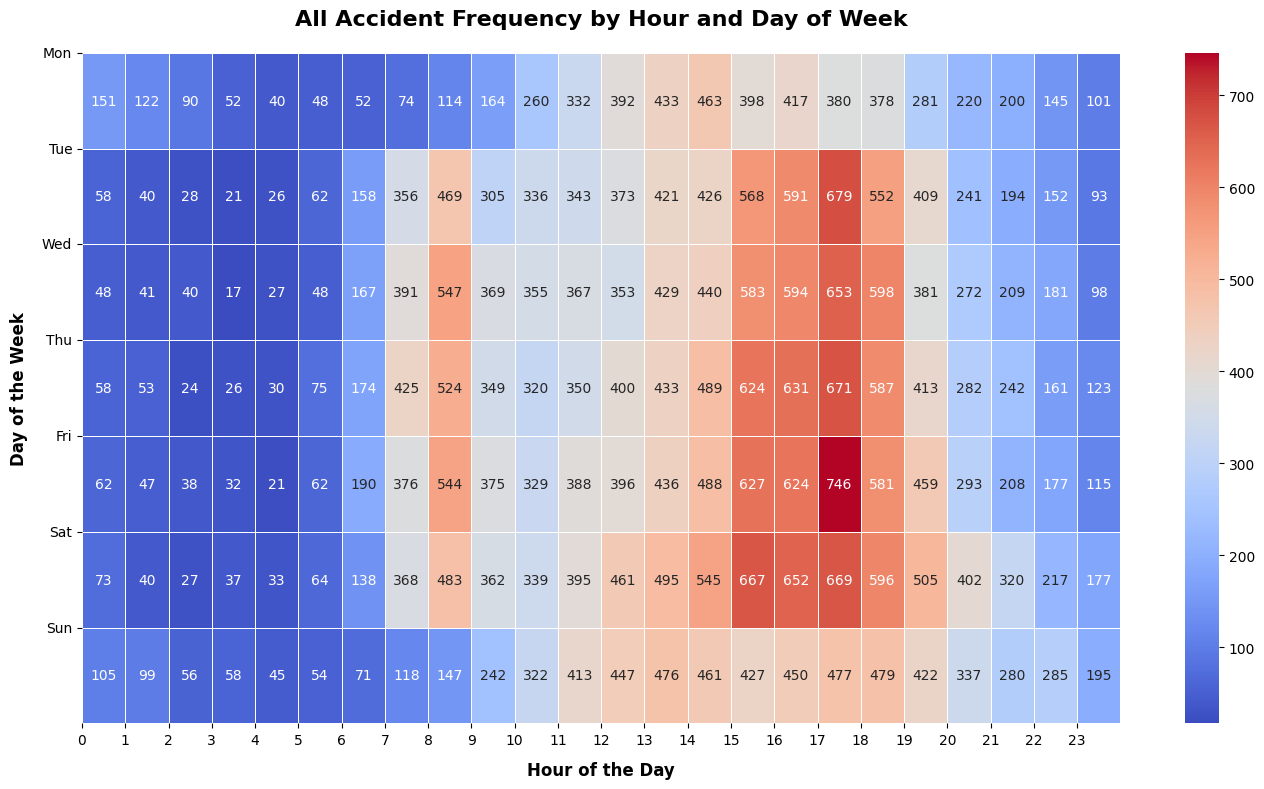

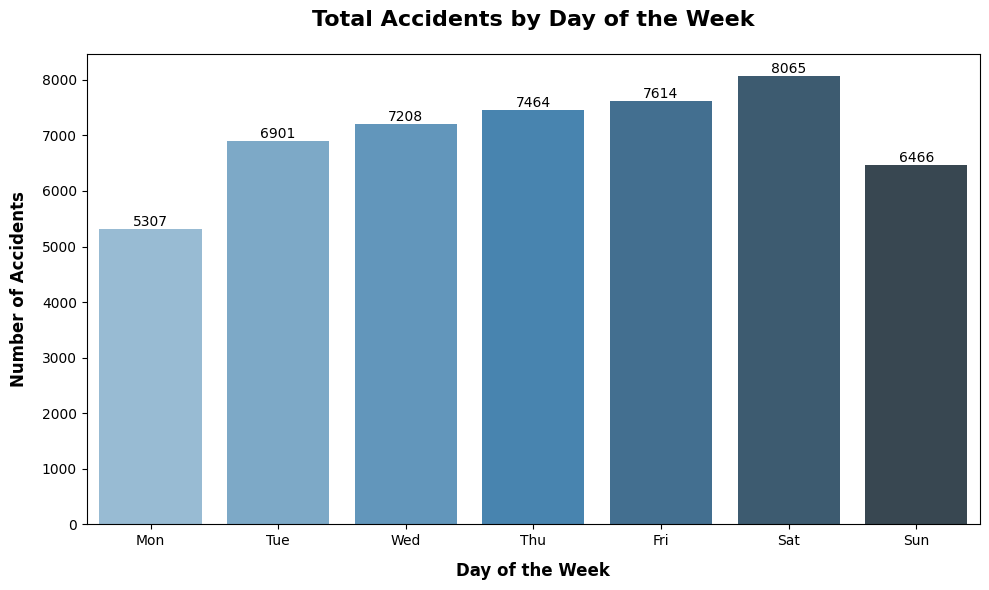

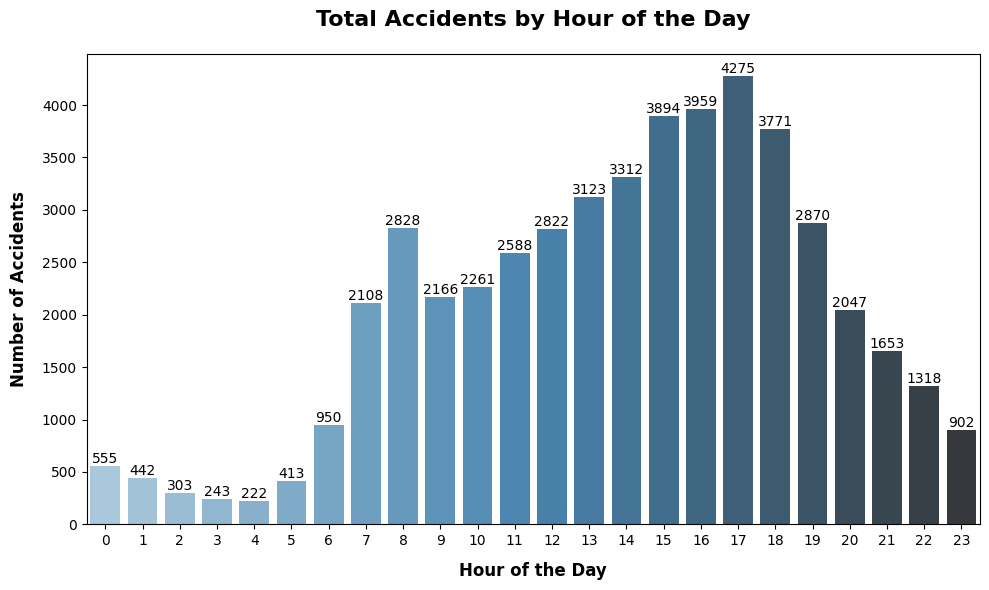

In [29]:
#invoke/call analyze_accidents to analyze significant hours of the day, and days of the week, on which accidents occur
analysis.analyze_accidents()

## Question 2
For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

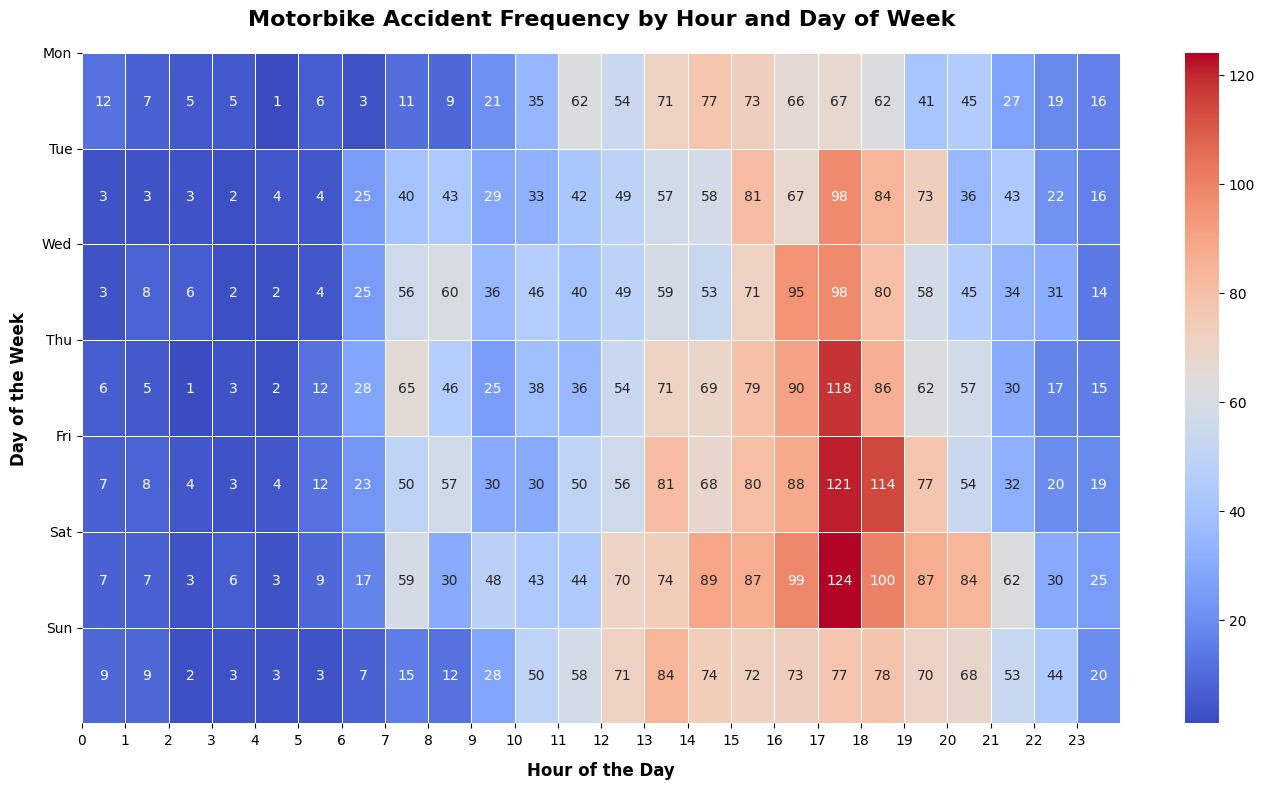

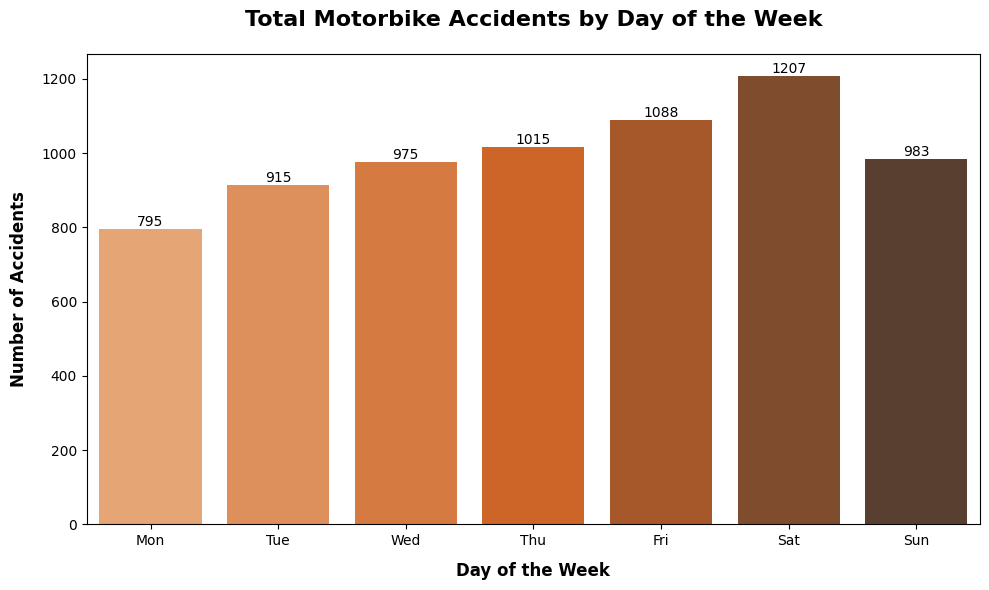

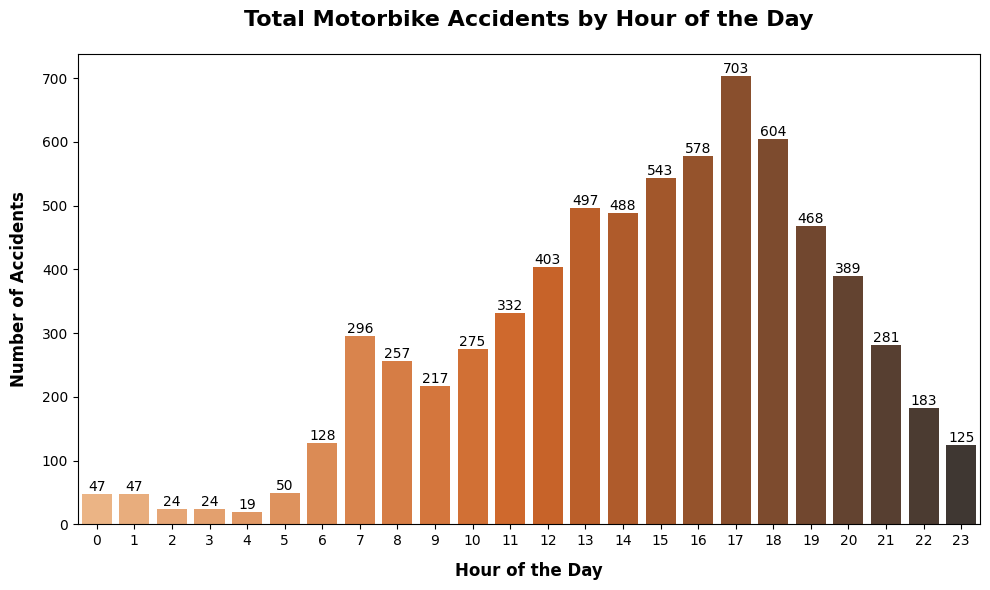

In [30]:
#invoke analyze_motorbike_accidents to analyse significant hours of the day, and days of the week, on which accidents occur
analysis.analyze_motorbike_accidents()

## Question 3 
For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

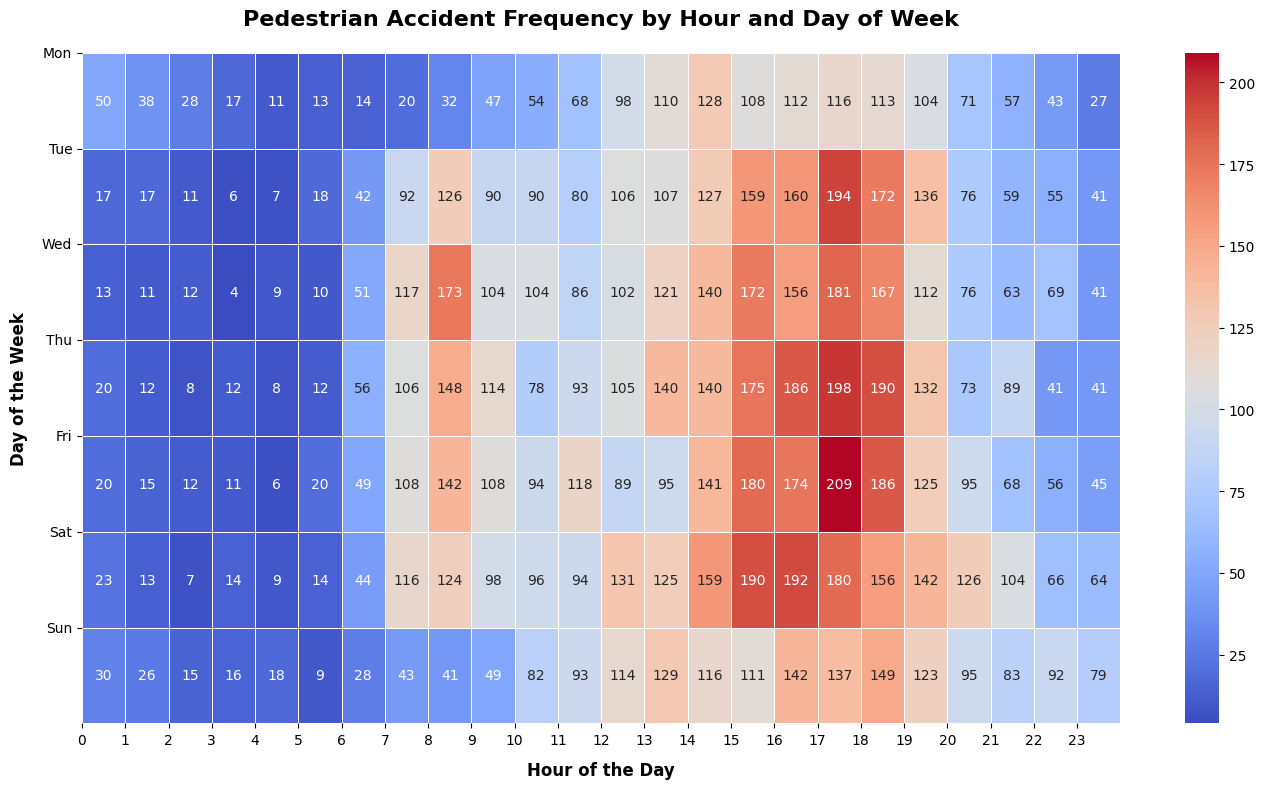

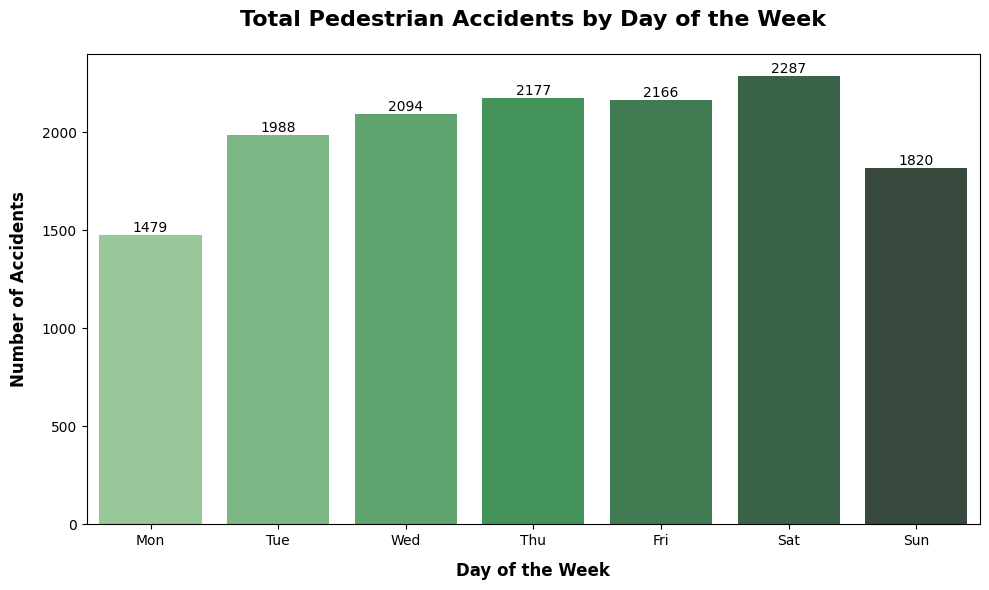

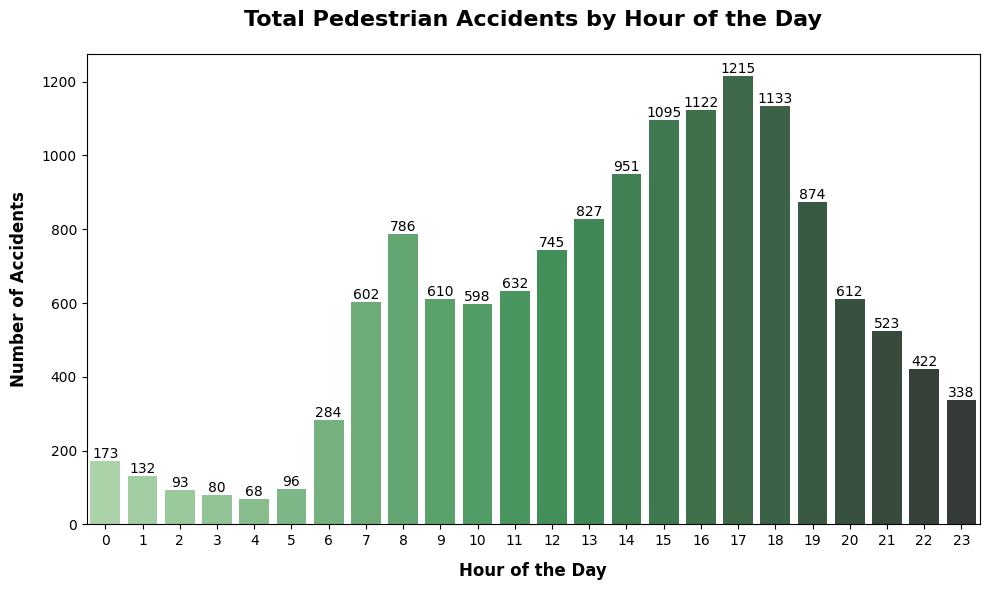

In [31]:
#invoke analyze_pedestrian_accidents to analyze significant hours of the day, and days of the week, on which they are more likely to be involved
analysis.analyze_pedestrian_accidents()

## Question 4 - Apriori Algorithm
Using the apriori algorithm, explore the impact of selected variables on accident severity.

Moving forward most of the columns for teh associated dataframes are encoded and their decoding value come from the excel file[dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2023-1.xlsx] given for this task.


In [32]:
#viewing features that could be considered or cause accidents from the data and also to confirm they are clean and ready for analysis 
display(cleaned_accidents_df[["accident_severity", "weather_conditions", "road_surface_conditions", "light_conditions", "speed_limit", "urban_or_rural_area","junction_detail"]])

accident_severity  weather_conditions  road_surface_conditions  \
1                      3                   1                        1   
2                      3                   1                        2   
4                      3                   1                        1   
5                      3                   1                        1   
6                      3                   1                        2   
...                  ...                 ...                      ...   
84478                  3                   1                        1   
84479                  3                   1                        1   
84484                  2                   1                        1   
84487                  3                   1                        1   
84488                  3                   1                        1   

       light_conditions  speed_limit  urban_or_rural_area  junction_detail  
1                     1           20                    1                9  
2                     4           30                    1                3  
4                     4           30                    1                3  
5                     4           20                    1                3  
6                     4           30                    1                3  
...                 ...          ...                  ...              ...  
84478                 1           30                    1                8  
84479                 4           30                    1                3  
84484                 1           30                    2                8  
84487                 1           30                    2                3  
84488                 1           30                    1                1  

[49025 rows x 7 columns]

In [33]:
#Mapping encodings to categorical values, which are in the excel file for accident severity using dictionary 
severity_mapping = {1: "Fatal", 2: "Serious", 3: "Slight"}

#Mapping encodings to categorical values, which are in the excel file for weather conditions  using a dictionary 
weather_mapping = {
    1: "Fine no high winds",
    2: "Raining no high winds",
    3: "Snowing no high winds",
    4: "Fine + high winds",
    5: "Raining + high winds",
    6: "Snowing + high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown",
}

#Mapping encodings to categorical values, which are in the excel file for road surface conditions using a dictionary 
road_surface_mapping = {
    1: "Dry",
    2: "Wet or damp",
    3: "Snow",
    4: "Frost or ice",
    5: "Flood over 3cm deep",
    6: "Oil or diesel",
    7: "Mud",
    9: "Unknown (self-reported)",
}

#Mapping encodings to categorical values, which are in the excel file for light conditions using a dictionary
light_mapping = {
    1: "Daylight",
    4: "Darkness - lights lit",
    5: "Darkness - lights unlit",
    6: "Darkness - no lighting",
    7: "Darkness - lighting unknown",
}


#defining the valid speed limits from excel file using using a set.
valid_speed_limits = {20, 30, 40, 50, 60, 70}

#apply the mappings without the lambda function for speed_limit
cleaned_accidents_df["accident_severity"] = cleaned_accidents_df["accident_severity"].map(severity_mapping)
cleaned_accidents_df["weather_conditions"] = cleaned_accidents_df["weather_conditions"].map(weather_mapping)
cleaned_accidents_df["road_surface_conditions"] = cleaned_accidents_df["road_surface_conditions"].map(road_surface_mapping)
cleaned_accidents_df["light_conditions"] = cleaned_accidents_df["light_conditions"].map(light_mapping)

#filtering out invalid speed limits
cleaned_accidents_df = cleaned_accidents_df[
    cleaned_accidents_df["speed_limit"].isin(valid_speed_limits)
]

##mapping speed limits with the "Speed_" prefix
cleaned_accidents_df["speed_limit"] = "Speed_" + cleaned_accidents_df["speed_limit"].astype(str)

#selecting the most important variables/features that can impact accident severity which is the target.
selected_columns = [
    "accident_severity",
    "weather_conditions",
    "road_surface_conditions",
    "light_conditions",
    "speed_limit",
]

print("\nAfter mapping - row counts:")  #indicate the start of row count summary after mapping
for col in selected_columns:  #iterate over selected columns to check non-null values
    print(f"{col}: {cleaned_accidents_df[col].notna().sum()} valid rows")  #display the number of valid (non-null) rows for each column


After mapping - row counts:
accident_severity: 49025 valid rows
weather_conditions: 49025 valid rows
road_surface_conditions: 49025 valid rows
light_conditions: 49025 valid rows
speed_limit: 49025 valid rows


In [34]:
pd.set_option('display.max_colwidth', None) #showing full content of each column because I will need to view my itemset fully without truncation
#creating one-hot encoding
one_hot_data = pd.get_dummies(cleaned_accidents_df[selected_columns], dtype=int)
print("\nOne-hot encoded shape:", one_hot_data.shape)
print("\nColumns in one-hot encoding:")
print(one_hot_data.columns)


One-hot encoded shape: (49025, 29)

Columns in one-hot encoding:
Index(['accident_severity_Fatal', 'accident_severity_Serious',
       'accident_severity_Slight', 'weather_conditions_Fine + high winds',
       'weather_conditions_Fine no high winds',
       'weather_conditions_Fog or mist', 'weather_conditions_Other',
       'weather_conditions_Raining + high winds',
       'weather_conditions_Raining no high winds',
       'weather_conditions_Snowing + high winds',
       'weather_conditions_Snowing no high winds',
       'weather_conditions_Unknown', 'road_surface_conditions_Dry',
       'road_surface_conditions_Flood over 3cm deep',
       'road_surface_conditions_Frost or ice', 'road_surface_conditions_Snow',
       'road_surface_conditions_Unknown (self-reported)',
       'road_surface_conditions_Wet or damp',
       'light_conditions_Darkness - lighting unknown',
       'light_conditions_Darkness - lights lit',
       'light_conditions_Darkness - lights unlit',
       'light_con

In [35]:
#dislay one hot encoded data in zeros and one
one_hot_data

accident_severity_Fatal  accident_severity_Serious  \
1                            0                          0   
2                            0                          0   
4                            0                          0   
5                            0                          0   
6                            0                          0   
...                        ...                        ...   
84478                        0                          0   
84479                        0                          0   
84484                        0                          1   
84487                        0                          0   
84488                        0                          0   

       accident_severity_Slight  weather_conditions_Fine + high winds  \
1                             1                                     0   
2                             1                                     0   
4                             1                                     0   
5                             1                                     0   
6                             1                                     0   
...                         ...                                   ...   
84478                         1                                     0   
84479                         1                                     0   
84484                         0                                     0   
84487                         1                                     0   
84488                         1                                     0   

       weather_conditions_Fine no high winds  weather_conditions_Fog or mist  \
1                                          1                               0   
2                                          1                               0   
4                                          1                               0   
5                                          1                               0   
6                                          1                               0   
...                                      ...                             ...   
84478                                      1                               0   
84479                                      1                               0   
84484                                      1                               0   
84487                                      1                               0   
84488                                      1                               0   

       weather_conditions_Other  weather_conditions_Raining + high winds  \
1                             0                                        0   
2                             0                                        0   
4                             0                                        0   
5                             0                                        0   
6                             0                                        0   
...                         ...                                      ...   
84478                         0                                        0   
84479                         0                                        0   
84484                         0                                        0   
84487                         0                                        0   
84488                         0                                        0   

       weather_conditions_Raining no high winds  \
1                                             0   
2                                             0   
4                                             0   
5                                             0   
6                                             0   
...                                         ...   
84478                                         0   
84479                                         0   
84484                                         0   
84487        

In [36]:
#applying Apriori algorithm
frequent_itemsets = apriori(one_hot_data, min_support=0.2, use_colnames=True)
frequent_itemsets["itemsets"] = frequent_itemsets["itemsets"].apply(frozenset)

#generating association rules with frequent item set and onehot data
rules = association_rules(frequent_itemsets, num_itemsets=len(one_hot_data), metric="confidence", min_threshold=0.5)

#filtering rules involving accident severity
severity_rules = rules[rules["consequents"].apply(lambda x: any("accident_severity" in i for i in x))]

#displaying frequent results
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


C:\Users\896038\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support  \
0   0.814013   
1   0.781989   
2   0.708883   
3   0.272024   
4   0.237797   
5   0.710087   
6   0.646201   
7   0.631351   
8   0.574482   
9   0.222540   
10  0.581703   
11  0.528485   
12  0.663498   
13  0.586232   
14  0.507639   
15  0.551922   
16  0.461744   
17  0.455156   
18  0.536155   
19  0.475207   
20  0.412606   
21  0.448343   
22  0.376216   
23  0.376094   
24  0.519612   
25  0.432942   
26  0.377909   
27  0.357471   
28  0.420643   
29  0.352106   
30  0.309536   
31  0.293075   
32  0.337073   
33  0.275757   

                                                                                                                                           itemsets  
0                                                                                                                        (accident_severity_Slight)  
1                                                                                                           (weather_conditions_Fine no high winds)  
2                                                                                                                     (road_surface_conditions_Dry)  
3                                                                                                             (road_surface_conditions_Wet or damp)  
4                                                                                                          (light_conditions_Darkness - lights lit)  
5                                                                                                                       (light_conditions_Daylight)  
6                                                                                                                            (speed_limit_Speed_30)  
7                                                                                 (accident_severity_Slight, weather_conditions_Fine no high winds)  
8                                                                                           (accident_severity_Slight, road_surface_conditions_Dry)  
9                                                                                   (accident_severity_Slight, road_surface_conditions_Wet or damp)  
10                                                                                            (accident_severity_Slight, light_conditions_Daylight)  
11                                                                                                 (accident_severity_Slight, speed_limit_Speed_30)  
12                                                                             (weather_conditions_Fine no high winds, road_surface_conditions_Dry)  
13                                                                               (light_conditions_Daylight, weather_conditions_Fine no high winds)  
14                                                                                    (weather_conditions_Fine no high winds, speed_limit_Speed_30)  
15                                                                                         (light_conditions_Daylight, road_surface_conditions_Dry)  
16                                                                                              (speed_limit_Speed_30, road_surface_conditions_Dry)  
17                                                                                                (light_conditions_Daylight, speed_limit_Speed_30)  
18                                                   (accident_severity_Slight, weather_conditions_Fine no high winds, road_surface_conditions_Dry)  
19                                                     (accident_severity_Slight, light_conditions_Daylight, weather_conditions_Fine no high winds)  
20                                                          (accident_severity_Slight, weather_conditions_Fine no high winds, speed_limit_Speed_30)  
21                                                               (accident_severity_Slight, light_conditions_Daylight, road_surface_conditions_D

In [37]:
print("\nAssociation Rules Involving Accident Severity:")
severity_rules  #displaying Association Rules Involving Accident Severity


Association Rules Involving Accident Severity:


antecedents  \
1                                                                                  (weather_conditions_Fine no high winds)   
3                                                                                            (road_surface_conditions_Dry)   
4                                                                                    (road_surface_conditions_Wet or damp)   
6                                                                                              (light_conditions_Daylight)   
8                                                                                                   (speed_limit_Speed_30)   
23                                                    (weather_conditions_Fine no high winds, road_surface_conditions_Dry)   
25                                                                                 (weather_conditions_Fine no high winds)   
26                                                                                           (road_surface_conditions_Dry)   
29                                                      (light_conditions_Daylight, weather_conditions_Fine no high winds)   
31                                                                                             (light_conditions_Daylight)   
32                                                                                 (weather_conditions_Fine no high winds)   
35                                                           (weather_conditions_Fine no high winds, speed_limit_Speed_30)   
37                                                                                 (weather_conditions_Fine no high winds)   
38                                                                                                  (speed_limit_Speed_30)   
41                                                                (light_conditions_Daylight, road_surface_conditions_Dry)   
43                                                                                             (light_conditions_Daylight)   
44                                                                                           (road_surface_conditions_Dry)   
47                                                                     (speed_limit_Speed_30, road_surface_conditions_Dry)   
48                                                                                                  (speed_limit_Speed_30)   
49                                                                                           (road_surface_conditions_Dry)   
52                                                                       (light_conditions_Daylight, speed_limit_Speed_30)   
53                                                                                             (light_conditions_Daylight)   
54                                                                                                  (speed_limit_Speed_30)   
81                         (light_conditions_Daylight, weather_conditions_Fine no high winds, road_surface_conditions_Dry)   
85                                                      (light_conditions_Daylight, weather_conditions_Fine no high winds)   
86                                                                (light_conditions_Daylight, road_surface_conditions_Dry)   
87                                                    (weather_conditions_Fine no high winds, road_surface_conditions_Dry)   
89                                                                                             (light_conditions_Daylight)   
90                                                                                 (weather_conditions_Fine no high winds)   
91                                                                                           (road_surface_conditions_Dry)   
95                              (weather_conditions_Fine no high winds, speed_limit_Speed_30, road_surface_conditions_Dry)   
99                                                           (weather_condition

Decision on Variable Selection for Accident Severity Analysis:

The analysis focuses on five key variables (accident_severity, weather_conditions, road_surface_conditions, 
light_conditions, and speed_limit) for several important reasons:

1. Direct Impact: These variables have direct physical relationships with accident severity. Weather affects 
   road conditions and visibility, road surface affects vehicle control, light conditions affect visibility, 
   and speed directly influences impact force.

2. Clarity of Relationships: Adding variables like urban_or_rural_area and junction_detail would introduce 
   indirect relationships that could obscure the primary patterns. For example, an urban area might have 
   different speed limits and junction types, making it harder to identify which factor is truly influencing 
   severity.

3. Support and Confidence: The current variables show strong support (>0.64) and confidence (>0.80) values, 
   indicating robust relationships. Adding more variables would likely dilute these strong associations and 
   make patterns harder to interpret.

4. Parsimony Principle: In association rule mining, fewer, well-chosen variables often provide clearer insights 
   than more variables. The current selection follows this principle while maintaining comprehensive coverage 
   of key environmental factors.
   The selected variables provide direct insights into this relationship, while additional variables might shift focus to location-based 
   patterns rather than severity factors.

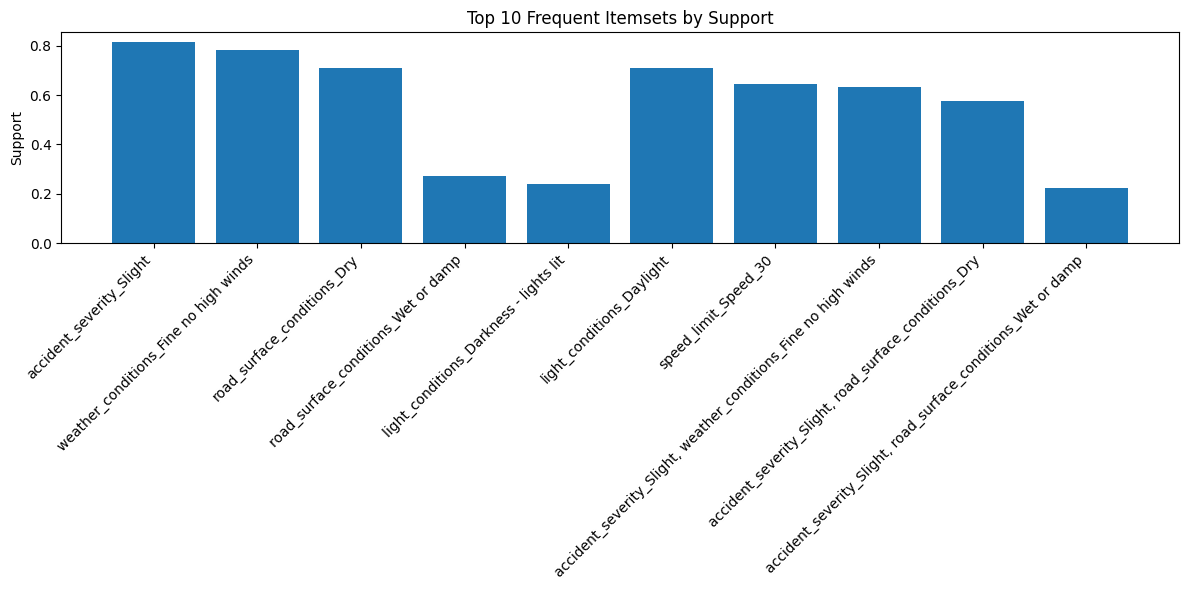

In [38]:
#ploting top 10 frequent itemsets
plt.figure(figsize=(12, 6))  #set the figure size for the plot
top_frequent = frequent_itemsets.head(10)  #select the top 10 frequent itemsets
plt.bar(range(len(top_frequent)), top_frequent['support'])  #create a bar chart for the support values of the top 10 itemsets
plt.xticks(
    range(len(top_frequent)),  #set x-axis tick positions
    [', '.join(list(x)[:2]) for x in top_frequent['itemsets']],  #format x-axis labels to display up to 2 items per set
    rotation=45,  #rotate the labels for better readability
    ha='right'  #align the labels to the right
)
plt.title('Top 10 Frequent Itemsets by Support')  #set the title of the plot
plt.ylabel('Support')  #label the y-axis
plt.tight_layout()  #adjust the layout to prevent overlap
plt.savefig('Top_10_Frequent_Itemsets_by_Support.png')  #save the plot to a file
plt.show()  #display the plot


## Question 5 - Geographical Clustering 
Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

In [39]:
##Since the question specified etc [Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc], that means Lincolnshire and North East Lincolnshire can be added because from the stats20-2011.pdf file 
#they are both under Humberside on page 103. 

areas_of_interest = 'Kingston upon Hull|Humberside|East Riding of Yorkshire|Lincolnshire|North East Lincolnshire'  #using regular expression OR operator

#merge accident data with LSOA data for these regions
#Only rows from cleaned_accidents_df and our_region_accidents_df that have matching values in the columns specified
#(lsoa_of_accident_location in cleaned_accidents_df and lsoa01cd in our_region_accidents_df) will be included in the 
#resulting merged_accidents_lsao_df.
merged_accidents_lsao_df = pd.merge(
    cleaned_accidents_df,
    cleaned_lsao_df[cleaned_lsao_df['lsoa01nm'].str.contains(areas_of_interest, na=False)],
    left_on="lsoa_of_accident_location",
    right_on="lsoa01cd",
    how="inner"   #similar to SQL inner join
)

#viewing the merged DataFrame
if merged_accidents_lsao_df.empty:
    print("No accidents found in the specified regions.")
else:
    print(f"Number of rows in merged data: {len(merged_accidents_lsao_df)}")
    display(merged_accidents_lsao_df)


Number of rows in merged data: 897


accident_index  accident_year accident_reference  location_easting_osgr  \
0    2020160914930           2020          160914930               506050.0   
1    2020160915008           2020          160915008               497660.0   
2    2020160915047           2020          160915047               510322.0   
3    2020160915311           2020          160915311               527410.0   
4    2020160915489           2020          160915489               477357.0   
..             ...            ...                ...                    ...   
892  2020161012744           2020          161012744               503718.0   
893  2020161012771           2020          161012771               471686.0   
894  2020161013646           2020          161013646               502981.0   
895  2020161014491           2020          161014491               489433.0   
896  2020161014949           2020          161014949               509443.0   

     location_northing_osgr  longitude   latitude  police_force  \
0                  428813.0  -0.393424  53.744936            16   
1                  402806.0  -0.528743  53.512895            16   
2                  431457.0  -0.327733  53.767805            16   
3                  408065.0  -0.078215  53.553782            16   
4                  413169.0  -0.832277  53.609396            16   
..                      ...        ...        ...           ...   
892                428641.0  -0.428826  53.743858            16   
893                423873.0  -0.915506  53.706392            16   
894                432285.0  -0.438783  53.776745            16   
895                408637.0  -0.651104  53.566753            16   
896                428632.0  -0.342063  53.742609            16   

    accident_severity  number_of_vehicles  ...  \
0              Slight                   2  ...   
1              Slight                   1  ...   
2              Slight                   1  ...   
3             Serious                   2  ...   
4              Slight                   1  ...   
..                ...                 ...  ...   
892            Slight                   2  ...   
893           Serious                   2  ...   
894            Slight                   2  ...   
895            Slight                   2  ...   
896            Slight                   2  ...   

     did_police_officer_attend_scene_of_accident trunk_road_flag  \
0                                              1               2   
1                                              1               2   
2                                              1               2   
3                                              1               2   
4                                              1               2   
..                                           ...             ...   
892                                            2               2   
893                                            2               2   
894                                            2               2   
895                                            2               2   
896                                            2               2   

     lsoa_of_accident_location objectid   lsoa01cd  \
0                    E01012777    12777  E01012777   
1                    E01013325    13325  E01013325   
2                    E01012817    12817  E01012817   
3                    E01013183    13183  E01013183   
4                    E01013248    13248  E01013248   
..                         ...      ...        ...   
892                  E01013107    13107  E01013107   
893                  E01013074    13074  E01013074   
894                  E01012954    12954  E01012954   
895                  E01013239    13239  E01013239   
896                  E01012854    12854  E01012854   

                          lsoa01nm                      lsoa01nmw  \
0          Kingston upon Hull 028E        Kingston upon Hull 028E   
1          North Lincolnshire 022C        Nor

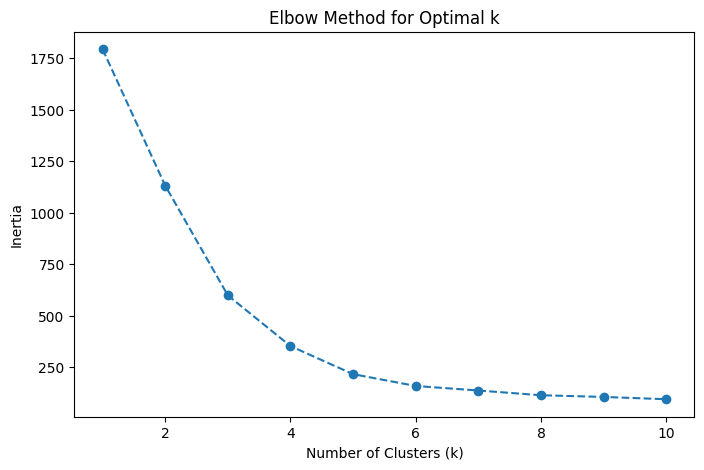

In [40]:
#prepare data for clustering
clustering_data = merged_accidents_lsao_df[['longitude', 'latitude']].dropna()

#scaling the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

#calculate inertia for different values of k to get optimal k
inertia = []
k_values = range(1, 11)  # test k values from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

#ploting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Observations from the Plot: In the plot, the inertia drops sharply between k = 1 and k = 4. After k = 4, the reduction becomes more gradual, indicating diminishing returns from additional clusters.

In [41]:
optimal_k = 4 #based on elbow plot seen above

#applying KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_accidents_lsao_df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

#creating a Folium map centered on the accident data
map_center = [merged_accidents_lsao_df['latitude'].mean(), merged_accidents_lsao_df['longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)

#adding marker clusters to the map
marker_cluster = MarkerCluster().add_to(accident_map)

#adding accident points to the cluster
for _, row in merged_accidents_lsao_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['cluster']}, Severity: {row['accident_severity']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

#saving the map to an HTML file for viewing
map_filename = "accident_clusters_map.html"
accident_map.save(map_filename)
print(f"Map saved as {map_filename}")


#displaying the map here on jupyter but please if this does not load up on opening the file please run the code or 
#view the html to get the explanation as the same image is in the report documenation.
display(accident_map) 

Map saved as accident_clusters_map.html


PLeaseNote: These colors are for visual distinction only and do not indicate accident severity or any other attribute.

### Please Read these commenst to understand the Map Cluster above

In [134]:
#BEFORE ZOOMING PLEASE READ THIS, THE FIRST MAP STATE HERE TALLYS WITH THE ONE iN THE RPORT.

#This map visualizes traffic accident data across specified regions using Folium with clustering enabled.
#The clustering groups nearby accident points, making the data easier to interpret, especially in areas with high densities.

#The numbers inside each cluster (358, 163) indicate the total number of accidents grouped in that cluster.
#358 (Hull): Highlights a significant hotspot, likely due to heavy traffic or complex intersections.
#163 (North East Lincolnshire): Suggests another major area of concern, possibly due to industrial activity or commuter routes.
#Smaller numbers (2, 3, 6): Represent low-density areas, typical of rural or less trafficked zones.

#Cluster colors (yellow, green, blue) are auto-generated by the Folium MarkerCluster plugin.
#When you click on the the blue location icon is what depicts a data point with its cluster and accident severity  


In [135]:
#Clusters are interactive—clicking on a cluster (example 358) zooms in to reveal individual accident points.
#Each accident point is marked with a blue info icon, which provides the exact location when zoomed in.

#Insights from the Map:
#High-Density Areas:
#Hull City Center (358): The highest density of accidents, requiring attention to urban traffic management.
#North East Lincolnshire (163): Another hotspot, potentially linked to busy industrial or commuting routes.

#Moderate-Density Areas:
#Scunthorpe (83) and Barton-upon-Humber (13): Show moderate accident density, likely due to secondary road usage.

#Low-Density Areas:
#Rural zones like Withernsea and Hornsea (clusters with 2, 3, or 4): Represent areas with minimal accident activity.

#Regional Distribution:
#Accident densities are concentrated around key urban centers and major roadways, with sparse distributions in rural areas.

## Question 6  - Time Series Modelling 
Choose three policing areas by filtering the data using the "police_force" column, then create time series models to predict weekly accident counts for the upcoming year based on historical data from 2017 to 2019.

In [136]:
#Load the specified data for 2017–2019 acidents using SQL
query = "SELECT * FROM accident WHERE accident_year BETWEEN 2017 AND 2019"
accident_df_2017_2019 = pd.read_sql(query, connection)

#Display the first few rows
print("Loaded DataFrame for accident WHERE accident_year BETWEEN 2017 AND 2019:")
accident_df_2017_2019

Loaded DataFrame for accident WHERE accident_year BETWEEN 2017 AND 2019:


accident_index  accident_year accident_reference  \
0       2017010001708           2017          010001708   
1       2017010009342           2017          010009342   
2       2017010009344           2017          010009344   
3       2017010009348           2017          010009348   
4       2017010009350           2017          010009350   
...               ...            ...                ...   
370148  2019984106919           2019          984106919   
370149  2019984107019           2019          984107019   
370150  2019984107219           2019          984107219   
370151  2019984107419           2019          984107419   
370152  201998QC01004           2019          98QC01004   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    532920.0                196330.0  -0.080107  51.650061   
1                    526790.0                181970.0  -0.173845  51.522425   
2                    535200.0                181260.0  -0.052969  51.514096   
3                    534340.0                193560.0  -0.060658  51.624832   
4                    533680.0                187820.0  -0.072372  51.573408   
...                       ...                     ...        ...        ...   
370148               312635.0                573392.0  -3.368899  55.047323   
370149               337522.0                591682.0  -2.983499  55.215407   
370150               318544.0                567087.0  -3.274645  54.991685   
370151               336525.0                584226.0  -2.997491  55.148292   
370152               291367.0                608364.0  -3.715064  55.357237   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  1                   2  ...   
1                  1                  3                   2  ...   
2                  1                  3                   3  ...   
3                  1                  3                   2  ...   
4                  1                  2                   1  ...   
...              ...                ...                 ...  ...   
370148            98                  3                   1  ...   
370149            98                  3                   4  ...   
370150            98                  3                   2  ...   
370151            98                  3                   1  ...   
370152            98                  2                   1  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
0                                             0                4   
1                                             0                4   
2                                             0                4   
3                                             4                4   
4                                             5                4   
...                                         ...              ...   
370148                                        0                1   
370149                                        0                1   
370150                                        0                1   
370151                                        0                1   
370152                                        0                1   

        weather_conditions road_surface_conditions  \
0                        1                       1   
1                        1                       2   
2                        1                       1   
3                        2                       2   
4                        1                       2   
...                    ...                     ...   
370148                   1                       2   
370149                   1                       2   
370150                   1                       1   
370151                   1                       1   
370152                   1                       1   

        special_conditions_at_site carriageway_hazards urban_or_ru

I will reuse the Data Cleaner class again to clean the data (accident_df_2017_19) loaded from SQL into Pandas

In [139]:
#initialize the cleaner with a dictionary
cleaner_2017_19 = DataCleaner({"accidents_2017_19": accident_df_2017_2019})

#peerform cleaning
cleaner_2017_19.drop_invalid_values(invalid_value=-1)  #drop rows with -1
cleaner_2017_19.clean_whitespace()                    #remove leading/trailing spaces
cleaner_2017_19.drop_duplicates()                     #rDrop duplicate rows

#convert specific column types
conversion_map = {
    "accidents_2017_19": {"date": "datetime64[ns]", "police_force": "int", "time": "datetime64[ns]"}
}
cleaner_2017_19.convert_data_types(conversion_map)

#summarizing the cleaned tables
cleaner_2017_19.summary()

Cleaning table: accidents_2017_19
accidents_2017_19: Dropped rows with invalid value '-1'.
Shape before: (370153, 36), after: (196636, 36)
accidents_2017_19: Whitespace cleaned from string columns.
accidents_2017_19: Dropped duplicates. Shape before: (196636, 36), after: (196636, 36)
accidents_2017_19: Data types converted successfully.

Summary of accidents_2017_19:
Rows: 196636, Columns: 36
Missing Values:
accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0


In [140]:
#Retrieve cleaned DataFrame (cleaned_accident_df_2017_19)
cleaned_accident_df_2017_19 = cleaner_2017_19.get_cleaned_table("accidents_2017_19")

In [141]:
cleaned_accident_df_2017_19

accident_index  accident_year accident_reference  \
1       2017010009342           2017          010009342   
2       2017010009344           2017          010009344   
3       2017010009348           2017          010009348   
4       2017010009350           2017          010009350   
6       2017010009353           2017          010009353   
...               ...            ...                ...   
360133  2019552000212           2019          552000212   
360135  2019552000214           2019          552000214   
360139  2019552000221           2019          552000221   
360141  2019552000231           2019          552000231   
360142  2019552000234           2019          552000234   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
1                    526790.0                181970.0  -0.173845  51.522425   
2                    535200.0                181260.0  -0.052969  51.514096   
3                    534340.0                193560.0  -0.060658  51.624832   
4                    533680.0                187820.0  -0.072372  51.573408   
6                    508640.0                181870.0  -0.435377  51.525305   
...                       ...                     ...        ...        ...   
360133               403370.0                 97926.0  -1.953559  50.780892   
360135               364190.0                116154.0  -2.511077  50.943699   
360139               410732.0                 92651.0  -1.849287  50.733366   
360141               401774.0                 93690.0  -1.976216  50.742805   
360142               418187.0                 93554.0  -1.743610  50.741303   

        police_force  accident_severity  number_of_vehicles  ...  \
1                  1                  3                   2  ...   
2                  1                  3                   3  ...   
3                  1                  3                   2  ...   
4                  1                  2                   1  ...   
6                  1                  3                   2  ...   
...              ...                ...                 ...  ...   
360133            55                  3                   2  ...   
360135            55                  3                   3  ...   
360139            55                  2                   2  ...   
360141            55                  3                   1  ...   
360142            55                  3                   2  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
1                                             0                4   
2                                             0                4   
3                                             4                4   
4                                             5                4   
6                                             4                4   
...                                         ...              ...   
360133                                        0                1   
360135                                        0                1   
360139                                        0                4   
360141                                        0                4   
360142                                        0                4   

        weather_conditions road_surface_conditions  \
1                        1                       2   
2                        1                       1   
3                        2                       2   
4                        1                       2   
6                        1                       2   
...                    ...                     ...   
360133                   2                       2   
360135                   2                       2   
360139                   2                       2   
360141                   2                       2   
360142                   1                       1   

        special_conditions_at_site carriageway_hazards urban_or_ru

In [142]:
#convert date column to datetime format
cleaned_accident_df_2017_19['date'] = pd.to_datetime(cleaned_accident_df_2017_19['date'], dayfirst=True)

#adding week column for aggregation
cleaned_accident_df_2017_19['week'] = cleaned_accident_df_2017_19['date'].dt.to_period('W')

#Defining three policing areas based on the Excel file 
#police_force	12	= North Yorkshire
#police_force	13	= West Yorkshire
#police_force	14	= South Yorkshire

#policing_areas = {'Humberside': 16, 'West Yorkshire': 13, 'South Yorkshire': 12}
policing_areas = {'North Yorkshire': 12, 'West Yorkshire': 13, 'South Yorkshire': 14}

#filter for selected policing areas
filtered_accidents = cleaned_accident_df_2017_19[cleaned_accident_df_2017_19['police_force'].isin(policing_areas.values())]

#aggregate weekly accident counts
weekly_accident_counts = (
    filtered_accidents.groupby(['police_force', 'week'])['accident_index']
    .count()
    .reset_index()
    .rename(columns={'accident_index': 'accident_count'})
)

print("Filtered and aggregated data:")
weekly_accident_counts

Filtered and aggregated data:


police_force                   week  accident_count
0              12  2016-12-26/2017-01-01               3
1              12  2017-01-02/2017-01-08              15
2              12  2017-01-09/2017-01-15              17
3              12  2017-01-16/2017-01-22              18
4              12  2017-01-23/2017-01-29              23
..            ...                    ...             ...
469            14  2019-12-02/2019-12-08              27
470            14  2019-12-09/2019-12-15              35
471            14  2019-12-16/2019-12-22              38
472            14  2019-12-23/2019-12-29              14
473            14  2019-12-30/2020-01-05              12

[474 rows x 3 columns]

In [143]:
weekly_accident_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   police_force    474 non-null    int32        
 1   week            474 non-null    period[W-SUN]
 2   accident_count  474 non-null    int64        
dtypes: int32(1), int64(1), period[W-SUN](1)
memory usage: 9.4 KB


In [144]:
weekly_accident_counts['week'] = weekly_accident_counts['week'].dt.to_timestamp()  #convert the 'week' column to a timestamp for easier indexing
weekly_accident_counts.set_index('week', inplace=True)  #set the 'week' column as the index of the DataFrame
print(weekly_accident_counts.index)  #print the index to verify the changes


DatetimeIndex(['2016-12-26', '2017-01-02', '2017-01-09', '2017-01-16',
               '2017-01-23', '2017-01-30', '2017-02-06', '2017-02-13',
               '2017-02-20', '2017-02-27',
               ...
               '2019-10-28', '2019-11-04', '2019-11-11', '2019-11-18',
               '2019-11-25', '2019-12-02', '2019-12-09', '2019-12-16',
               '2019-12-23', '2019-12-30'],
              dtype='datetime64[ns]', name='week', length=474, freq=None)


In [145]:
weekly_accident_counts.info() #summary

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 474 entries, 2016-12-26 to 2019-12-30
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   police_force    474 non-null    int32
 1   accident_count  474 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 9.3 KB


In [146]:
#the core of time series is to ensure the data is indexed on time, which here I am indexing by week.
weekly_accident_counts

police_force  accident_count
week                                    
2016-12-26            12               3
2017-01-02            12              15
2017-01-09            12              17
2017-01-16            12              18
2017-01-23            12              23
...                  ...             ...
2019-12-02            14              27
2019-12-09            14              35
2019-12-16            14              38
2019-12-23            14              14
2019-12-30            14              12

[474 rows x 2 columns]

In [147]:
weekly_accident_counts['police_force'].unique() #confirming police fore regions

array([12, 13, 14])

In [148]:
#Exploring the time series

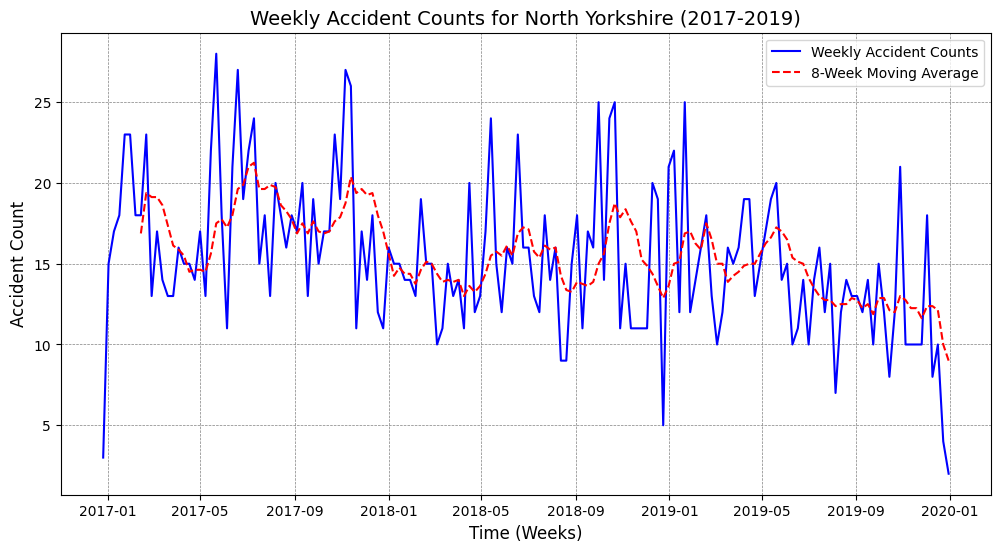

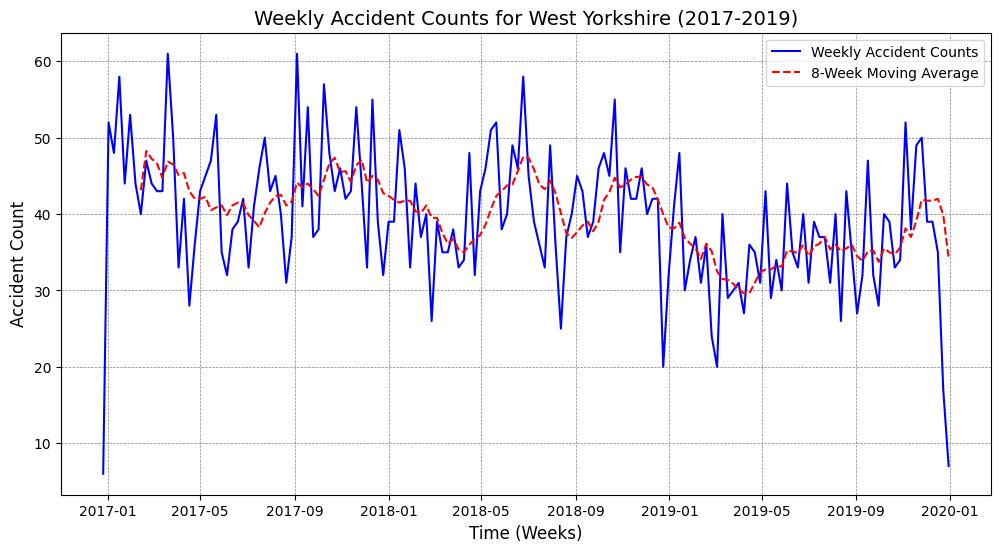

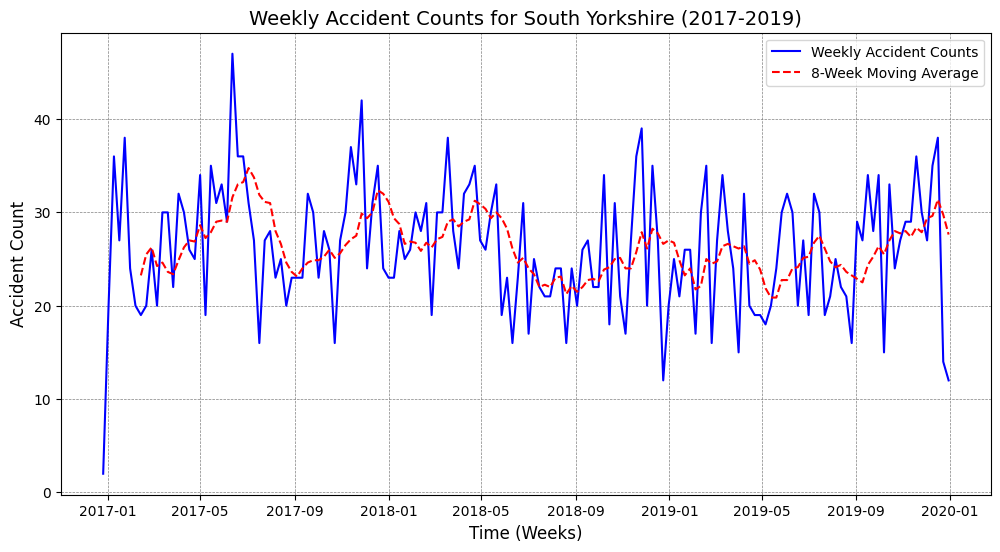

In [150]:
#Function to plot time series with enhancements
def plot_time_series(data, area_name): 
    #Calculate a rolling mean for trend visualization
    data['rolling_mean'] = data['accident_count'].rolling(window=8).mean()  # 8-week moving average
    
    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['accident_count'], label="Weekly Accident Counts", color='blue')
    plt.plot(data.index, data['rolling_mean'], label="8-Week Moving Average", color='red', linestyle='--')
    plt.title(f"Weekly Accident Counts for {area_name} (2017-2019)", fontsize=14)
    plt.xlabel("Time (Weeks)", fontsize=12)
    plt.ylabel("Accident Count", fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

#Loop through the three areas
for area, area_id in policing_areas.items():
    data = weekly_accident_counts[weekly_accident_counts['police_force'] == area_id].copy()  # Filter data for each area
    plot_time_series(data, area)


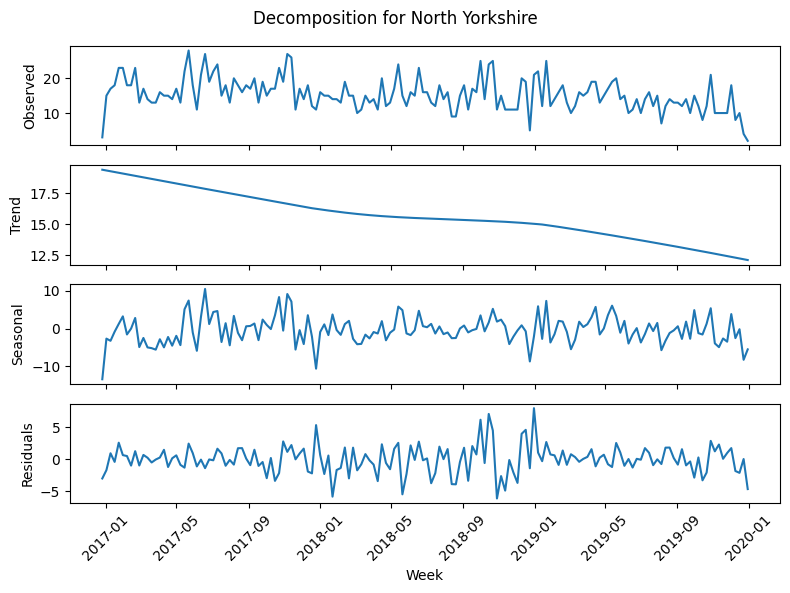

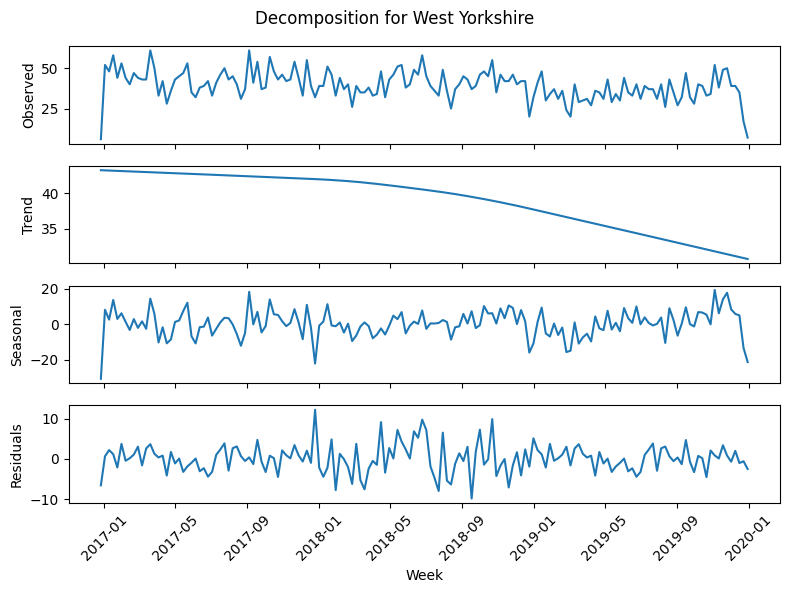

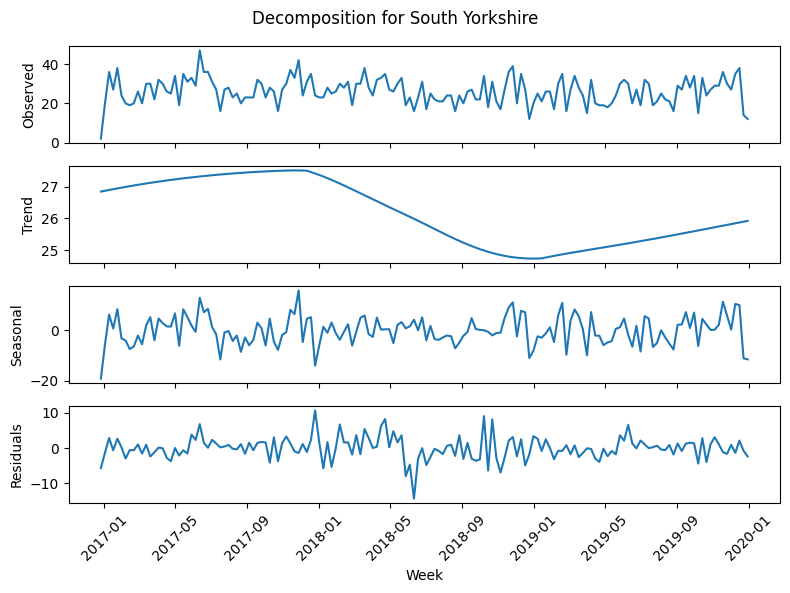

In [159]:
#Function to decompose and plot
def decompose_time_series(data, title):
    """
    Decompose a time series using STL and plot the components.

    :param data: Data series to decompose.
    :param title: Title to use for the decomposition plots.
    """
    decomposition = STL(data, period=52).fit()  # Weekly seasonality
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 6))
    ax1.plot(decomposition.observed, label='Observed')
    ax1.set_ylabel('Observed')
    ax2.plot(decomposition.trend, label='Trend')
    ax2.set_ylabel('Trend')
    ax3.plot(decomposition.seasonal, label='Seasonal')
    ax3.set_ylabel('Seasonal')
    ax4.plot(decomposition.resid, label='Residuals')
    ax4.set_ylabel('Residuals')
    plt.suptitle(title)
    plt.xlabel("Week")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the decomposition plot
    plt.savefig(f"Decomposition_{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')  #save the plot with a filename based on the title
    plt.show()

#Looping through policing areas to decompose time series
for area, area_id in policing_areas.items():
    #Filter data for the current policing area
    area_data = weekly_accident_counts[weekly_accident_counts['police_force'] == area_id]
    area_data = area_data.copy()  #Avoid modifying the original DataFrame
    decompose_time_series(area_data['accident_count'], f"Decomposition for {area}")


In [152]:
#Function for ADF Test to check for stationairty
def adf_test(series, area):
    result = adfuller(series)
    print(f"ADF Test for {area}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print(f"The series is stationary for {area}.")
    else:
        print(f"The series is NOT stationary for {area}. Differencing required.")
    print()

#Apply ADF Test for all areas
for area, area_id in policing_areas.items():
    data = weekly_accident_counts[weekly_accident_counts['police_force'] == area_id]['accident_count']
    adf_test(data, area)

ADF Test for North Yorkshire:
ADF Statistic: -0.9377560745806484
p-value: 0.7752847320299245
The series is NOT stationary for North Yorkshire. Differencing required.

ADF Test for West Yorkshire:
ADF Statistic: -4.306470618951045
p-value: 0.00043288992640190283
The series is stationary for West Yorkshire.

ADF Test for South Yorkshire:
ADF Statistic: -10.75887194945827
p-value: 2.551116503921245e-19
The series is stationary for South Yorkshire.



In [153]:
#Apply first-order differencing for North Yorkshire
north_yorkshire_data = weekly_accident_counts[weekly_accident_counts['police_force'] == 12]['accident_count']
north_yorkshire_diff = north_yorkshire_data.diff().dropna()

#Re-run ADF test after differencing
adf_test(north_yorkshire_diff, "North Yorkshire (Differenced)")

ADF Test for North Yorkshire (Differenced):
ADF Statistic: -6.3380225044905005
p-value: 2.799256275587393e-08
The series is stationary for North Yorkshire (Differenced).



In [154]:
north_yorkshire_diff.info() #summary of north_yorkshire_diff

<class 'pandas.core.series.Series'>
DatetimeIndex: 157 entries, 2017-01-02 to 2019-12-30
Series name: accident_count
Non-Null Count  Dtype  
--------------  -----  
157 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [161]:
display(north_yorkshire_diff.head()) #just comfirming values 

week
2017-01-02    12.0
2017-01-09     2.0
2017-01-16     1.0
2017-01-23     5.0
2017-01-30     0.0
Name: accident_count, dtype: float64

Plotting ACF and PACF for differenced series of North Yorkshire.


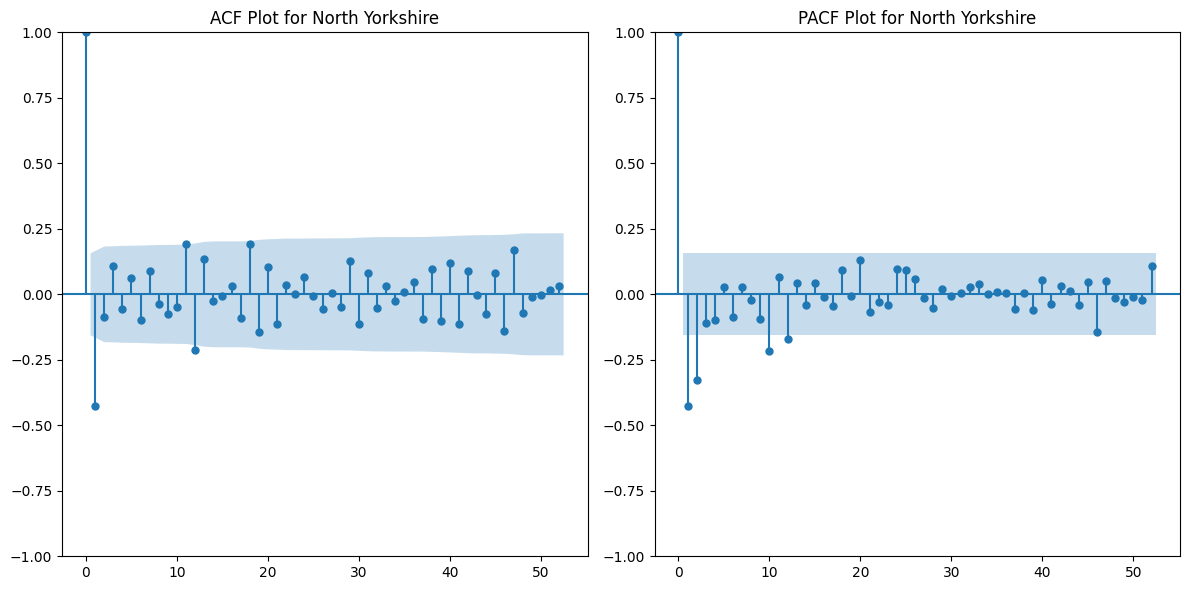

Plotting ACF and PACF for original series of West Yorkshire.


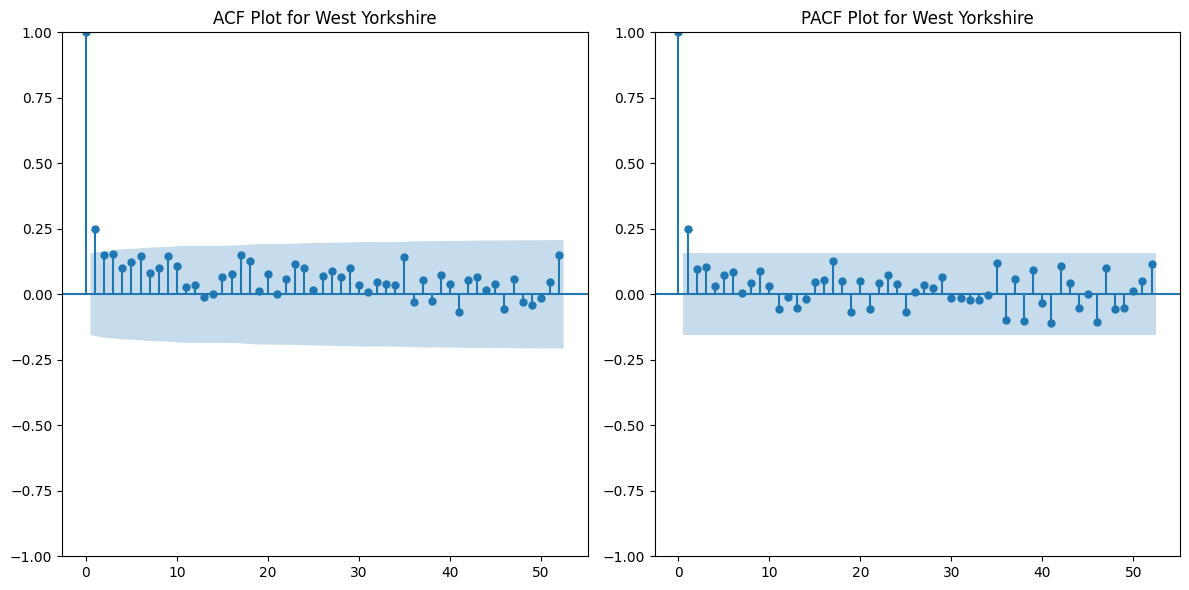

Plotting ACF and PACF for original series of South Yorkshire.


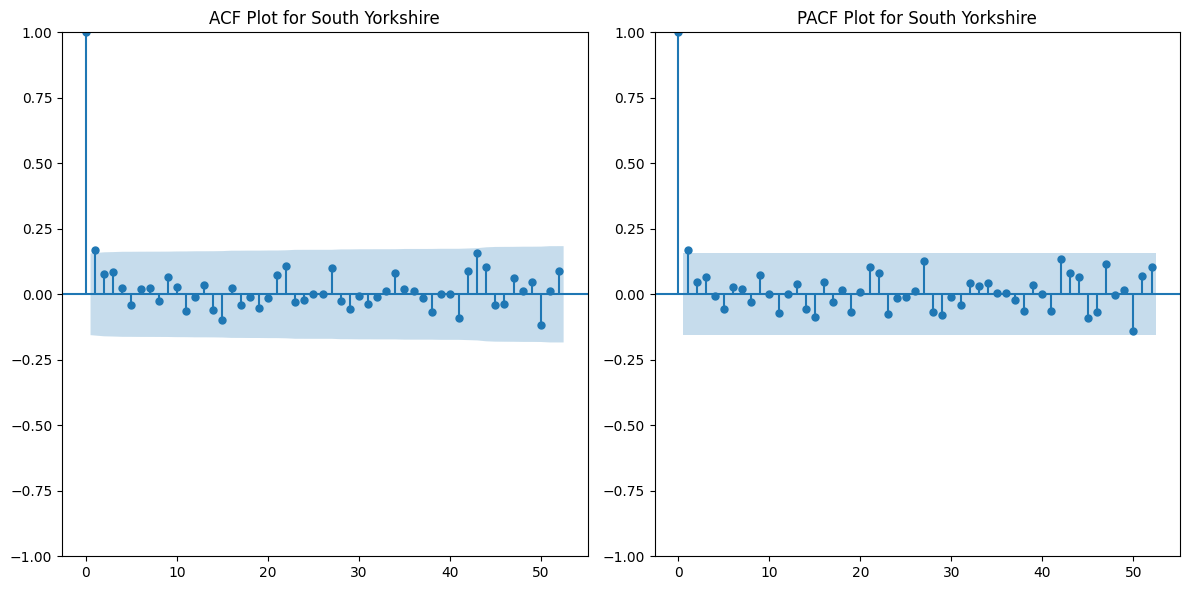

In [162]:
#defining function to plot ACF and PACF
def plot_acf_pacf(data, title):
    """
    Plot the ACF and PACF for the given data series.

    :param data: Data series to analyze.
    :param title: Title to use for the plots.
    """
    plt.figure(figsize=(12, 6))  #set the figure size for the plots
    
    #Plot ACF
    plt.subplot(121)  #create a subplot for ACF on the left
    plot_acf(data, lags=52, ax=plt.gca())  #plot the autocorrelation function with a 1-year lag for weekly data
    plt.title(f"ACF Plot for {title}")  #set the title for the ACF plot
    
    #Plot PACF
    plt.subplot(122)  #create a subplot for PACF on the right
    plot_pacf(data, lags=52, ax=plt.gca(), method='ywm')  #plot the partial autocorrelation function using the 'ywm' method
    plt.title(f"PACF Plot for {title}")  #set the title for the PACF plot
    
    plt.tight_layout()  #adjust layout to prevent overlap
    
    # Save the plots to a file
    plt.savefig(f"ACF_PACF_{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')  #save the plots with the title as filename
    
    plt.show()  #display the plots

#calling functions to plot ACF and PACF for all regions
for area, area_id in policing_areas.items():  #iterate through each policing area and its ID
    if area == "North Yorkshire":  #check if the area is North Yorkshire to use the differenced series
        data = north_yorkshire_diff  #assign the differenced series
        print(f"Plotting ACF and PACF for differenced series of {area}.")  #log the process for North Yorkshire
    else:
        data = weekly_accident_counts[weekly_accident_counts['police_force'] == area_id]['accident_count']  #filter the data for the specific area
        print(f"Plotting ACF and PACF for original series of {area}.")  #log the process for other areas
    
    # Call the function to plot
    plot_acf_pacf(data, area)  #plot ACF and PACF for the specified area's data


Looking at both the ACF and PACF plots for each region, the SARIMA(p,d,q)(P,D,Q) parameters:
For West Yorkshire:

p=1 (PACF shows significant spike at lag 1)
q=1 (ACF shows significant spike at lag 1)
P=1 (PACF shows spike at seasonal lag)
Q=1 (ACF shows spike at seasonal lag)

For North Yorkshire:

p=1 (PACF shows significant spike at lag 1)
q=1 (ACF shows significant spike at lag 1)
P=1 (PACF shows spike at seasonal lag)
Q=1 (ACF shows spike at seasonal lag)

For South Yorkshire:

p=1 (PACF shows significant spike at lag 1)
q=1 (ACF shows significant spike at lag 1)
P=1 (PACF shows spike at seasonal lag)
Q=1 (ACF shows spike at seasonal lag)

In [163]:
# Function to optimize SARIMA parameters
def optimize_SARIMA(endog, order_list, m):
    """
    Optimize SARIMA model parameters by evaluating different combinations of orders.

    :param endog: Endogenous variable (time series data to model).
    :param order_list: List of SARIMA parameter combinations to evaluate.
    :param m: Seasonal period (e.g., 52 for weekly seasonality).
    :return: DataFrame sorted by AIC scores for the evaluated orders.
    """
    results = []  #store results of parameter combinations and their AIC scores
    for order in order_list:  #iterate through each combination of SARIMA orders
        try:
            #fit the SARIMA model for the given order
            model = SARIMAX(
                endog,
                order=(order[0], order[1], order[2]),  #non-seasonal parameters (p, d, q)
                seasonal_order=(order[3], order[4], order[5], m),  #seasonal parameters (P, D, Q, m)
                simple_differencing=False  #use full differencing
            ).fit(disp=False)  #fit the model without displaying output
            
            aic = model.aic  #calculate the Akaike Information Criterion (AIC) for the model(A low AIC (Akaike Information Criterion) is the best choice.)
            results.append([order, aic])  #store the order and its corresponding AIC score
            
        except (ValueError, np.linalg.LinAlgError, IndexError) as e:  #handle errors during model fitting
            print(f"Error for order {order}: {e}")  #log errors for specific parameter combinations
            continue
    
    result_df = pd.DataFrame(results, columns=['order', 'AIC'])  #create a DataFrame of results
    return result_df.sort_values(by='AIC').reset_index(drop=True)  #sort results by AIC in ascending order

# Set parameter ranges
ps = range(0, 2)  #AR terms (autoregressive)
ds = range(0, 2)  #differencing terms
qs = range(0, 2)  #MA terms (moving average)
Ps = range(0, 2)  #seasonal AR terms
Ds = range(0, 2)  #seasonal differencing terms
Qs = range(0, 2)  #seasonal MA terms
m = 52  #weekly seasonality (number of weeks in a year)
SARIMA_order_list = list(product(ps, ds, qs, Ps, Ds, Qs))  #generate all combinations of parameter values



Processing North Yorkshire...
Total data points: 158
Date range: 2016-12-26 00:00:00 to 2019-12-30 00:00:00
Training data points: 106
Test data points: 52
Best parameters for North Yorkshire: (0, 1, 1, 0, 1, 0)
North Yorkshire - MSE: 38.03143112688214
First few forecast values for 2020:
2020-01-06    12.611207
2020-01-13    12.611207
2020-01-20    11.611207
2020-01-27    11.611207
2020-02-03    10.611207
Freq: W-MON, Name: predicted_mean, dtype: float64

Processing West Yorkshire...
Total data points: 158
Date range: 2016-12-26 00:00:00 to 2019-12-30 00:00:00
Training data points: 106
Test data points: 52
Best parameters for West Yorkshire: (0, 1, 1, 0, 1, 0)
West Yorkshire - MSE: 87.04518818592166
First few forecast values for 2020:
2020-01-06    36.61122
2020-01-13    48.61122
2020-01-20    43.61122
2020-01-27    30.61122
2020-02-03    41.61122
Freq: W-MON, Name: predicted_mean, dtype: float64

Processing South Yorkshire...
Total data points: 158
Date range: 2016-12-26 00:00:00 to 2

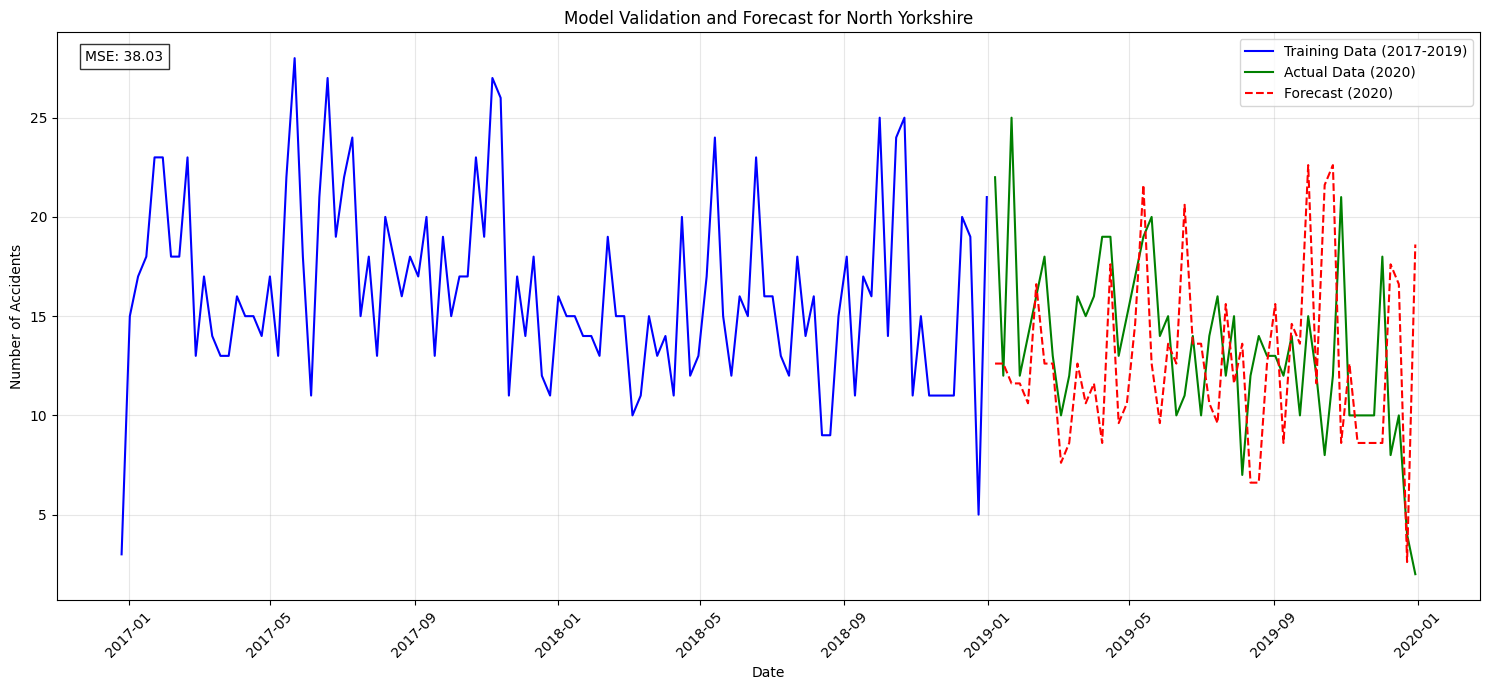

Validation MSE for North Yorkshire: 38.03


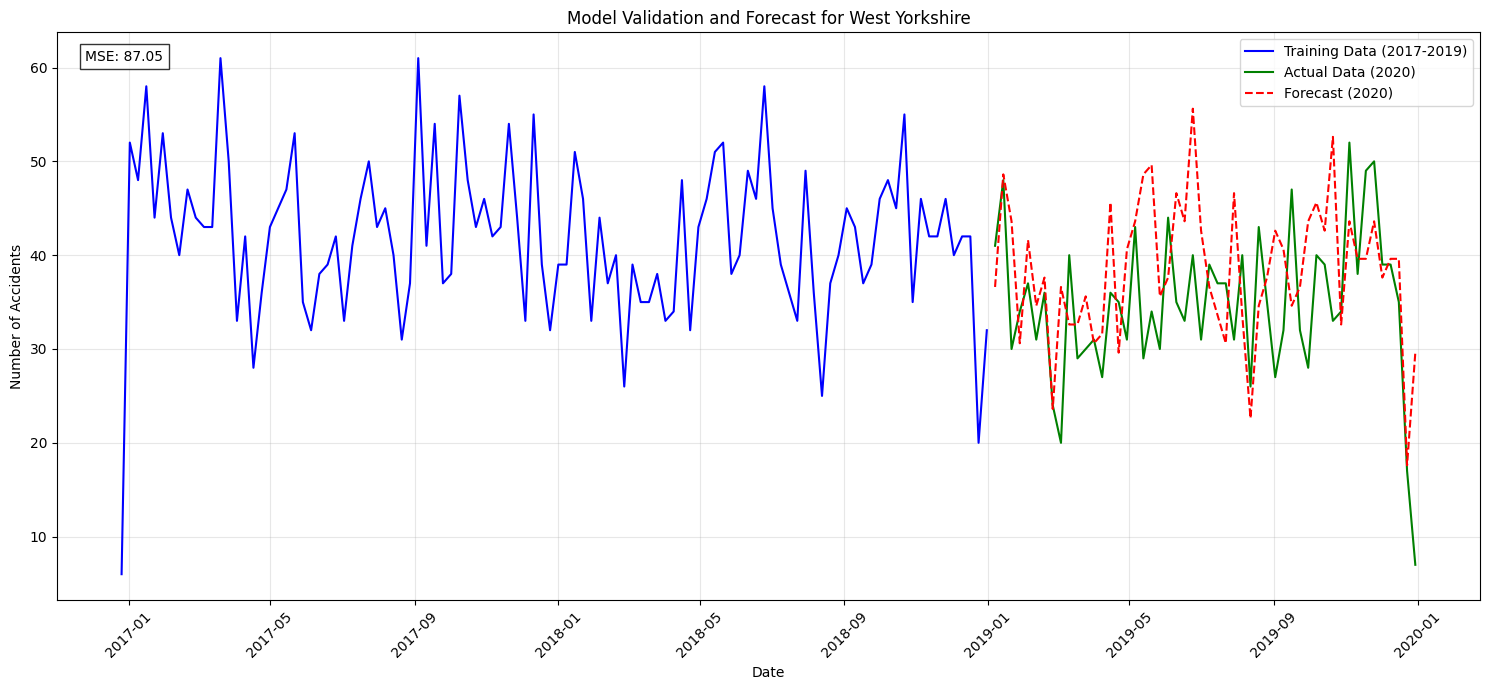

Validation MSE for West Yorkshire: 87.05


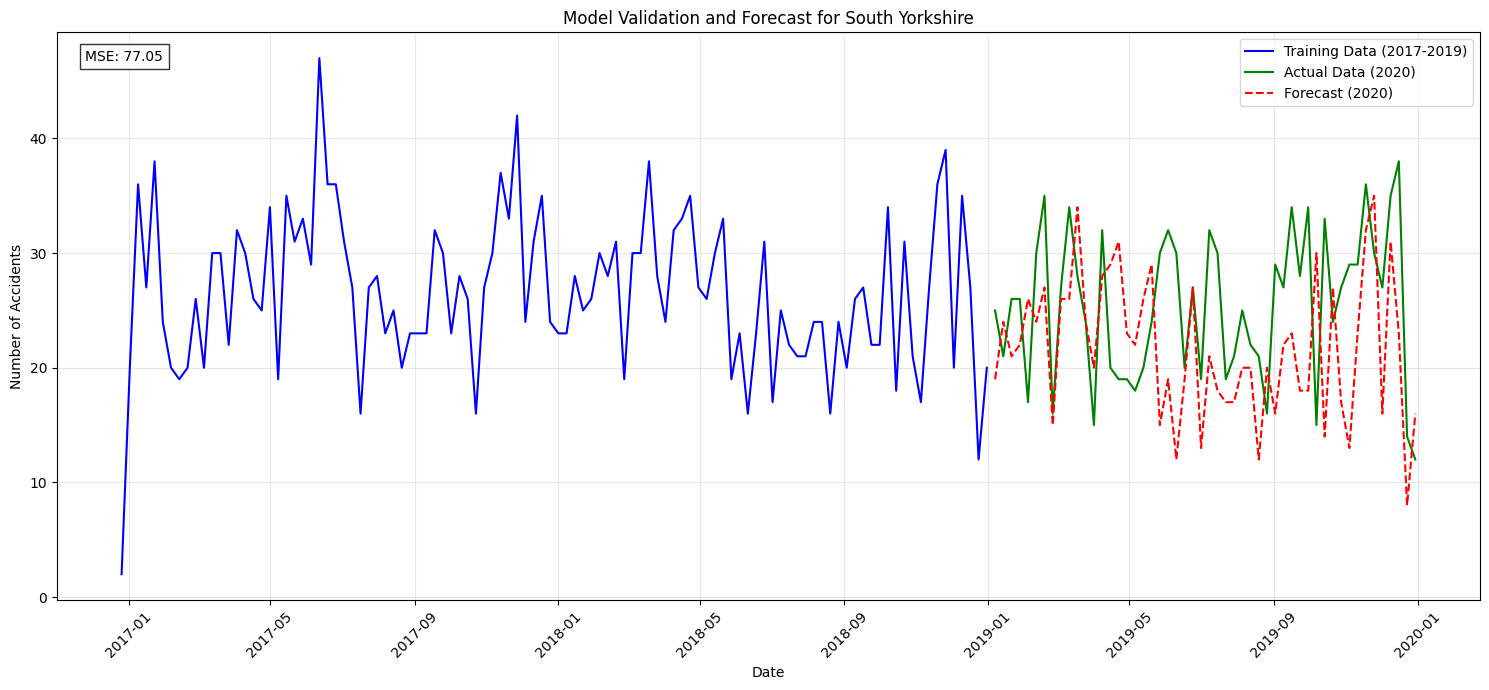

Validation MSE for South Yorkshire: 77.05

Generating forecast plots...


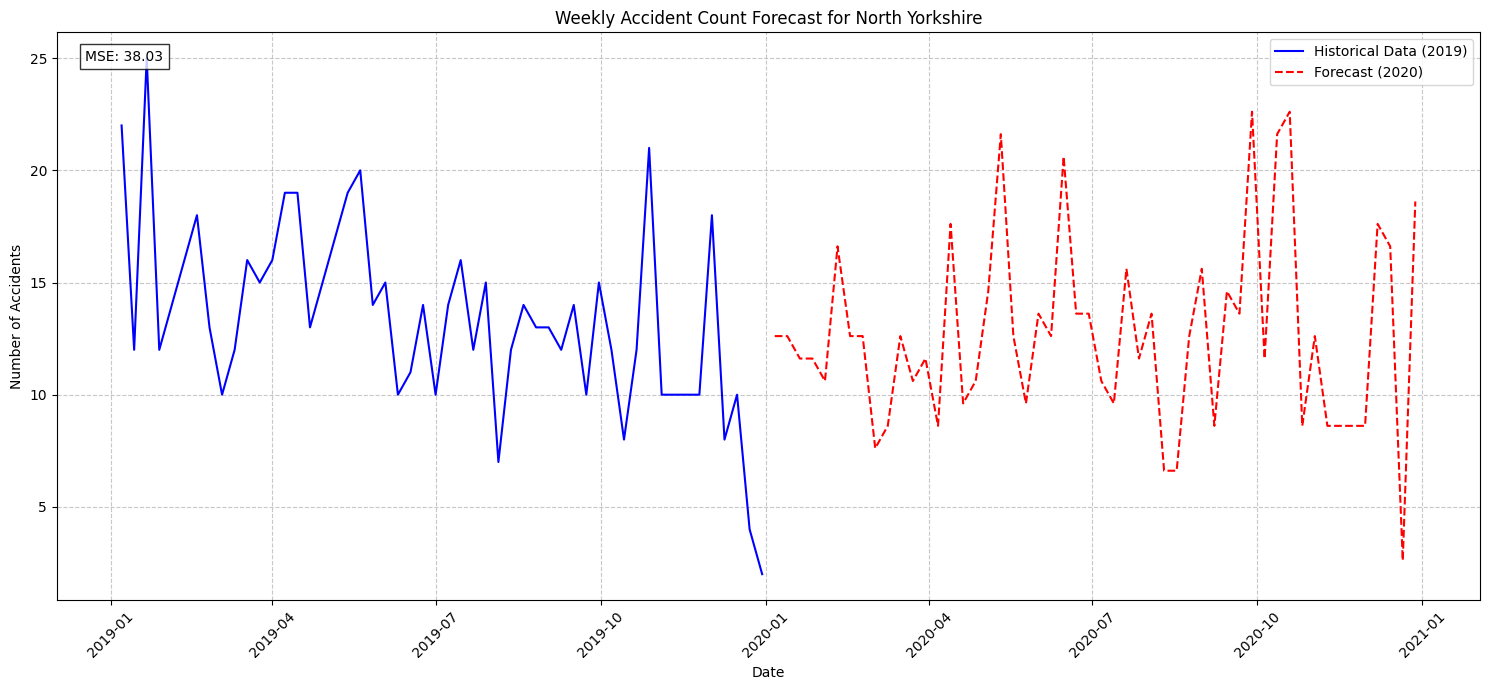

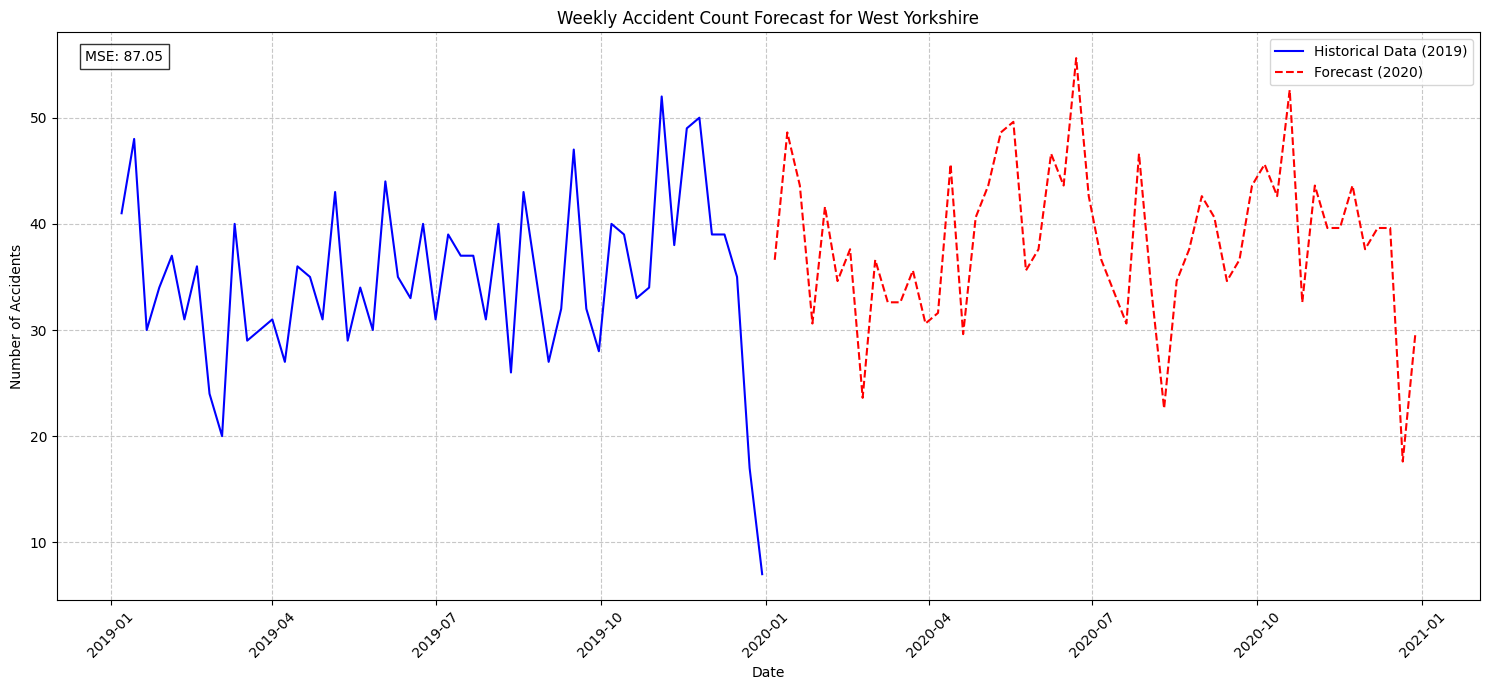

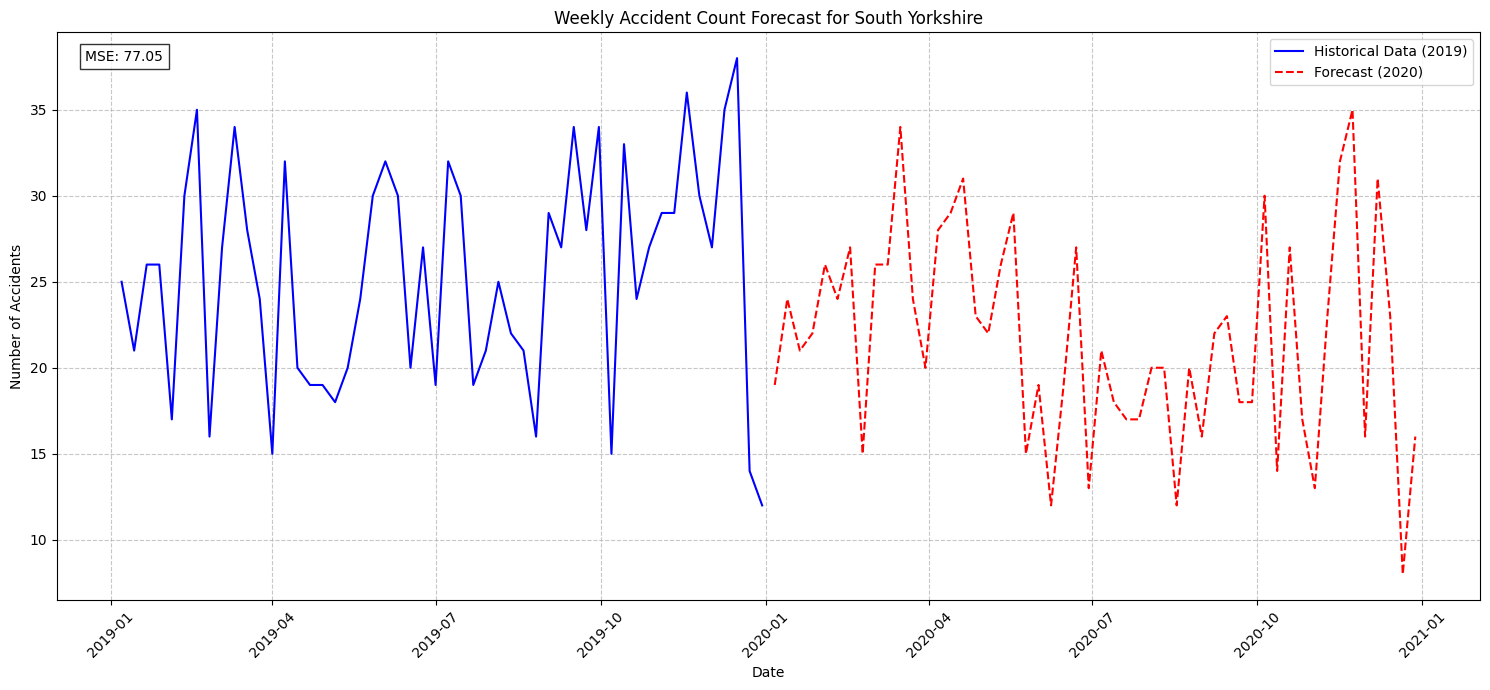


Results for North Yorkshire:
MSE: 38.03
Forecast values:
2020-01-06    12.611207
2020-01-13    12.611207
2020-01-20    11.611207
2020-01-27    11.611207
2020-02-03    10.611207
2020-02-10    16.611207
2020-02-17    12.611207
2020-02-24    12.611207
2020-03-02     7.611207
2020-03-09     8.611207
2020-03-16    12.611207
2020-03-23    10.611207
2020-03-30    11.611207
2020-04-06     8.611207
2020-04-13    17.611207
2020-04-20     9.611207
2020-04-27    10.611207
2020-05-04    14.611207
2020-05-11    21.611207
2020-05-18    12.611207
2020-05-25     9.611207
2020-06-01    13.611207
2020-06-08    12.611207
2020-06-15    20.611207
2020-06-22    13.611207
2020-06-29    13.611207
2020-07-06    10.611207
2020-07-13     9.611207
2020-07-20    15.611207
2020-07-27    11.611207
2020-08-03    13.611207
2020-08-10     6.611207
2020-08-17     6.611207
2020-08-24    12.611207
2020-08-31    15.611207
2020-09-07     8.611207
2020-09-14    14.611207
2020-09-21    13.611207
2020-09-28    22.611207
2020-1

In [165]:
#Process each area
results = {}
for area, area_id in policing_areas.items():
    print(f"\nProcessing {area}...")
    
    #Filter and preprocess data
    data = weekly_accident_counts[weekly_accident_counts['police_force'] == area_id]['accident_count']
    
    #Print data info
    print(f"Total data points: {len(data)}")
    print(f"Date range: {data.index.min()} to {data.index.max()}")
    
    #ensure sufficient data length
    if len(data) < m * 2:  # At least two seasonal cycles are recommended
        print(f"Not enough data points for seasonal period {m}. Skipping {area}.")
        continue

    # Split data into training and testing sets using integer indexing
    train_size = len(data) - 52  # Reserve last 52 weeks for testing
    train = data[:train_size]
    test = data[train_size:]
    
    print(f"Training data points: {len(train)}")
    print(f"Test data points: {len(test)}")

    # Optimize SARIMA parameters
    result_df = optimize_SARIMA(train, SARIMA_order_list, m)
    
    if not result_df.empty:
        best_order = result_df.iloc[0]['order']
        print(f"Best parameters for {area}: {best_order}")

        try:
            # Fit SARIMA model
            model = SARIMAX(
                train,
                order=(best_order[0], best_order[1], best_order[2]),
                seasonal_order=(best_order[3], best_order[4], best_order[5], m),
                simple_differencing=False
            ).fit(disp=False)
            
            # Generate forecast
            forecast = model.forecast(steps=52)
            
            # Create correct 2020 date index
            forecast_index = pd.date_range(
                start='2020-01-06',  # First Monday of 2020
                periods=52,
                freq='W-MON'
            )
            
            # Assign new index to forecast
            forecast.index = forecast_index
            
            # Evaluate performance using 2019 data for validation
            mse = np.mean((forecast.values - test.values) ** 2)
            results[area] = {
                'model': model,
                'forecast': forecast,
                'actual': test,
                'mse': mse
            }
            print(f"{area} - MSE: {mse}")
            
            # Print first few values with correct 2020 dates
            print(f"First few forecast values for 2020:")
            print(forecast.head())
                
        except Exception as e:
            print(f"Failed to fit SARIMA for {area} with order {best_order}: {e}")
    else:
        print(f"No valid model found for {area}.")

#Function to plot validation results
def plot_validation_and_forecast(data, forecast, area_name):
    """Plot validation results and forecast"""
    plt.figure(figsize=(15, 7))
    
    # Get training and test periods
    train_size = len(data) - 52
    train_data = data[:train_size]
    test_data = data[train_size:]
    
    # Plot training data
    plt.plot(train_data.index, train_data, 
             label='Training Data (2017-2019)', color='blue')
    
    #clot test data
    plt.plot(test_data.index, test_data, 
             label='Actual Data (2020)', color='green')
    
    # Plot forecast
    forecast_index = test_data.index  # Use test data index for forecast
    plt.plot(forecast_index, forecast, 
             label='Forecast (2020)', color='red', linestyle='--')
    
    plt.title(f'Model Validation and Forecast for {area_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    #calculate and display MSE (low mse indicates good performance)
    mse = np.mean((test_data.values - forecast.values) ** 2)
    plt.text(0.02, 0.95, f'MSE: {mse:.2f}', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'validation_plot_{area_name}.png')  # Save first
    plt.show()
    
    return mse

#generate validation plots
print("\nGenerating validation plots...")
for area, result in results.items():
    area_data = weekly_accident_counts[
        weekly_accident_counts['police_force'] == policing_areas[area]
    ]['accident_count']
    
    if area in results:
        mse = plot_validation_and_forecast(
            area_data,
            result['forecast'],
            area
        )
        print(f"Validation MSE for {area}: {mse:.2f}")

#create forecast visualization
def plot_forecast(historical_data, forecast_data, area_name):
    plt.figure(figsize=(15, 7))
    
    # Get last year of historical data (2019)
    historical_end = pd.to_datetime('2019-12-31')
    historical_start = pd.to_datetime('2019-01-01')
    historical_subset = historical_data[
        (historical_data.index >= historical_start) & 
        (historical_data.index <= historical_end)
    ]
    
    # Plot historical data (2019 only)
    plt.plot(historical_subset.index, historical_subset, 
             label='Historical Data (2019)', color='blue')
    
    #plot forecast (2020)
    plt.plot(forecast_data.index, forecast_data, 
             label='Forecast (2020)', color='red', linestyle='--')
    
    plt.title(f'Weekly Accident Count Forecast for {area_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    
    # Add MSE value as text
    mse_value = results[area_name]['mse']
    plt.text(0.02, 0.95, f'MSE: {mse_value:.2f}', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(f'forecast_plot_{area_name}.png')  # Save first
    plt.show()
    
#plot forecast results
print("\nGenerating forecast plots...")
for area, result in results.items():
    historical_data = weekly_accident_counts[
        weekly_accident_counts['police_force'] == policing_areas[area]
    ]['accident_count']
    forecast_data = result['forecast']
    plot_forecast(historical_data, forecast_data, area)

#display final results
for area, result in results.items():
    print(f"\nResults for {area}:")
    print(f"MSE: {result['mse']:.2f}")
    print("Forecast values:")
    print(result['forecast'])

In [166]:
##question 6 and 7 can also be solved togetehr in a modular fashion using a class/function pattern just 
##as I did for question 1-3 and 8-10 but I am trying not to  misuse or abuse  use of classes excessively. 

## Question 7 - Time Series Modelling 
Identify the three Local Super Output Areas (LSOAs) of Hull city that recorded the highest number of road accidents in the first three months of 2020, then employ a time series model to forecast daily accident occurrences for the upcoming month (e.g., July), leveraging data from the preceding six months (e.g., January to June) for these high-incident areas.

 ### Data Filtering and Aggregation

In [107]:
#Filtering LSOA data for Hull with lsoa01nm and displaying dataframe
hull_lsoas = cleaned_lsao_df[cleaned_lsao_df ['lsoa01nm'].str.contains('Hull', na=False)]
hull_lsoas

objectid   lsoa01cd                 lsoa01nm                lsoa01nmw  \
12755     12756  E01012756  Kingston upon Hull 025A  Kingston upon Hull 025A   
12756     12757  E01012757  Kingston upon Hull 025B  Kingston upon Hull 025B   
12757     12758  E01012758  Kingston upon Hull 018A  Kingston upon Hull 018A   
12758     12759  E01012759  Kingston upon Hull 025C  Kingston upon Hull 025C   
12759     12760  E01012760  Kingston upon Hull 025D  Kingston upon Hull 025D   
...         ...        ...                      ...                      ...   
12913     12914  E01012914  Kingston upon Hull 012C  Kingston upon Hull 012C   
12914     12915  E01012915  Kingston upon Hull 008E  Kingston upon Hull 008E   
12915     12916  E01012916  Kingston upon Hull 012D  Kingston upon Hull 012D   
12916     12917  E01012917  Kingston upon Hull 008F  Kingston upon Hull 008F   
12917     12918  E01012918  Kingston upon Hull 008G  Kingston upon Hull 008G   

         shape__area  shape__length                              globalid  
12755  198940.919128    3498.355895  6f44ac4a-9449-4c64-8564-6f612bf9a060  
12756  318087.393494    3716.587517  e1c0a075-7ca8-425e-8437-39db56a6b994  
12757  311920.258041    3775.303823  a049347f-f7fb-481f-90ca-a95e632ac97a  
12758  398188.211227    3984.807880  f55da506-35c7-4db5-a007-bba4255d50e3  
12759  125999.228485    2082.915305  dc1e40d1-79fe-4cda-b204-d22f9362b043  
...              ...            ...                                   ...  
12913  710303.255646    5041.700669  cffb08e3-6c6b-4a4b-9ae2-33c7558359e5  
12914  262494.227234    3192.736490  ae097b6b-47d1-4b41-8743-8a78aeb6e408  
12915  546988.155197    3973.545932  f238c3d8-e0f7-4648-81f9-1c407b46a7ca  
12916  400908.828018    3816.251453  644cfeaf-d9c6-4e49-b64e-31220ee8d4ed  
12917  201495.421783    2804.640839  9f2dda61-3e3b-4b05-81d3-b41d580e5785  

[163 rows x 7 columns]

In [108]:
#checking if there are matching rows
if hull_lsoas.empty:
    print("No LSOAs found for 'Hull'. Please check the data.")
else:
    #merge cleaned accident data with filtered LSOA data
    hull_city_merged_df = cleaned_accidents_df.merge(
        hull_lsoas,
        left_on='lsoa_of_accident_location',
        right_on='lsoa01cd',
        how='inner'
    )

    print("Merged DataFrame (Accident + Hull LSOAs):")
    display(hull_city_merged_df)  #displaying merged DataFrame

    #ensuring the date column is in datetime format
    hull_city_merged_df['date'] = pd.to_datetime(hull_city_merged_df['date'], errors='coerce')


Step 2: Merged DataFrame (Accident + Hull LSOAs):


accident_index  accident_year accident_reference  location_easting_osgr  \
0    2020160914930           2020          160914930               506050.0   
1    2020160915047           2020          160915047               510322.0   
2    2020160916437           2020          160916437               505530.0   
3    2020160916464           2020          160916464               508163.0   
4    2020160916619           2020          160916619               505917.0   
..             ...            ...                ...                    ...   
352  2020161010095           2020          161010095               515095.0   
353  2020161010802           2020          161010802               508372.0   
354  2020161010995           2020          161010995               511263.0   
355  2020161011582           2020          161011582               513126.0   
356  2020161014949           2020          161014949               509443.0   

     location_northing_osgr  longitude   latitude  police_force  \
0                  428813.0  -0.393424  53.744936            16   
1                  431457.0  -0.327733  53.767805            16   
2                  430659.0  -0.400675  53.761627            16   
3                  428678.0  -0.361446  53.743289            16   
4                  427812.0  -0.395782  53.735969            16   
..                      ...        ...        ...           ...   
352                430218.0  -0.255818  53.755643            16   
353                432655.0  -0.356884  53.778976            16   
354                429883.0  -0.314030  53.753464            16   
355                430712.0  -0.285486  53.760511            16   
356                428632.0  -0.342063  53.742609            16   

    accident_severity  number_of_vehicles  ...  \
0              Slight                   2  ...   
1              Slight                   1  ...   
2              Slight                   2  ...   
3              Slight                   2  ...   
4              Slight                   2  ...   
..                ...                 ...  ...   
352            Slight                   2  ...   
353            Slight                   2  ...   
354           Serious                   2  ...   
355            Slight                   2  ...   
356            Slight                   2  ...   

     did_police_officer_attend_scene_of_accident trunk_road_flag  \
0                                              1               2   
1                                              1               2   
2                                              1               2   
3                                              1               2   
4                                              1               2   
..                                           ...             ...   
352                                            1               2   
353                                            2               2   
354                                            1               2   
355                                            2               2   
356                                            2               2   

     lsoa_of_accident_location objectid   lsoa01cd                 lsoa01nm  \
0                    E01012777    12777  E01012777  Kingston upon Hull 028E   
1                    E01012817    12817  E01012817  Kingston upon Hull 016D   
2                    E01012798    12798  E01012798  Kingston upon Hull 019D   
3                    E01012855    12855  E01012855  Kingston upon Hull 029D   
4                    E01012886    12886  E01012886  Kingston upon Hull 031D   
..                         ...      ...        ...                      ...   
352                  E01012845    12845  E01012845  Kingston upon Hull 021C   
353                  E01012765    12765  E01012765  Kingston upon Hull 005B   
354                  E01012805    12805  E01012805  Kingston upon Hull 026A   
355                  E01012895    12895  E

In [109]:
#filtering for the first three months of 2020
hull_accidents =  hull_city_merged_df[
        (hull_city_merged_df['date'] >= '2020-01-01') & 
        (hull_city_merged_df['date'] <= '2020-03-31')
    ]

print("Hull Accidents (Jan-Mar 2020):")
hull_accidents  #display hull accidents filtered by date


Step 3: Hull Accidents (Jan-Mar 2020):


accident_index  accident_year accident_reference  location_easting_osgr  \
0    2020160914930           2020          160914930               506050.0   
1    2020160915047           2020          160915047               510322.0   
5    2020160917927           2020          160917927               510351.0   
9    2020160918418           2020          160918418               505576.0   
10   2020160918618           2020          160918618               511889.0   
..             ...            ...                ...                    ...   
317  2020161003091           2020          161003091               510792.0   
320  2020161004218           2020          161004218               507273.0   
327  2020161005353           2020          161005353               506627.0   
328  2020161005358           2020          161005358               507296.0   
329  2020161005478           2020          161005478               510112.0   

     location_northing_osgr  longitude   latitude  police_force  \
0                  428813.0  -0.393424  53.744936            16   
1                  431457.0  -0.327733  53.767805            16   
5                  431474.0  -0.327287  53.767951            16   
9                  428756.0  -0.400627  53.744520            16   
10                 432283.0  -0.303672  53.774892            16   
..                      ...        ...        ...           ...   
317                429365.0  -0.321356  53.748910            16   
320                433611.0  -0.373222  53.787793            16   
327                428671.0  -0.384727  53.743542            16   
328                430086.0  -0.374097  53.756118            16   
329                436084.0  -0.329268  53.809418            16   

    accident_severity  number_of_vehicles  ...  \
0              Slight                   2  ...   
1              Slight                   1  ...   
5              Slight                   2  ...   
9              Slight                   2  ...   
10             Slight                   2  ...   
..                ...                 ...  ...   
317           Serious                   2  ...   
320            Slight                   2  ...   
327            Slight                   2  ...   
328            Slight                   2  ...   
329            Slight                   2  ...   

     did_police_officer_attend_scene_of_accident trunk_road_flag  \
0                                              1               2   
1                                              1               2   
5                                              2               2   
9                                              1               2   
10                                             1               2   
..                                           ...             ...   
317                                            1               2   
320                                            1               2   
327                                            2               2   
328                                            2               2   
329                                            2               2   

     lsoa_of_accident_location objectid   lsoa01cd                 lsoa01nm  \
0                    E01012777    12777  E01012777  Kingston upon Hull 028E   
1                    E01012817    12817  E01012817  Kingston upon Hull 016D   
5                    E01012817    12817  E01012817  Kingston upon Hull 016D   
9                    E01012777    12777  E01012777  Kingston upon Hull 028E   
10                   E01012812    12812  E01012812  Kingston upon Hull 013A   
..                         ...      ...        ...                      ...   
317                  E01012809    12809  E01012809  Kingston upon Hull 026C   
320                  E01012875    12875  E01012875  Kingston upon Hull 003A   
327                  E01012865    12865  E01012865  Kingston upon Hull 027E   
328                  E01012756    12756  E

In [110]:
#checking if there are any accidents in the filtered data
if hull_accidents.empty:
    print("No accident data found for Hull in the first three months of 2020.")
else:
    #grouping by LSOA and count accidents
    top_lsoas = hull_accidents.groupby('lsoa_of_accident_location')['accident_index'].count() \
                              .sort_values(ascending=False).head(3)

    #convert the grouped series to a DataFrame for display
    top_lsoas_df = top_lsoas.reset_index(name='accident_count')

In [111]:
top_lsoas_df

lsoa_of_accident_location  accident_count
0                 E01012817               7
1                 E01012848               5
2                 E01012852               4

In [112]:
print("Top 3 LSOAs with the highest accidents in Hull (Jan-Mar 2020):")
print(top_lsoas_df)  #display top 3 LSOAs as a DataFrame

#get the top 3 LSOAs for forecasting
top_lsoa_ids = top_lsoas.index.tolist()

print("Top 3 LSOA IDs for forecasting:")
top_lsoa_ids  #display top 3 LSOA IDs as a list


Step 4: Top 3 LSOAs with the highest accidents in Hull (Jan-Mar 2020):
  lsoa_of_accident_location  accident_count
0                 E01012817               7
1                 E01012848               5
2                 E01012852               4

Step 5: Top 3 LSOA IDs for forecasting:


['E01012817', 'E01012848', 'E01012852']

In [113]:
#LSOA IDs from Step 5
top_lsoa_ids = ['E01012817', 'E01012848', 'E01012852']

#filtering the lsoa DataFrame for the top LSOA IDs
matched_lsoas = cleaned_lsao_df[cleaned_lsao_df['lsoa01cd'].isin(top_lsoa_ids)]

#display the LSOA names (cities) corresponding to the IDs
print("Cities corresponding to the top LSOA IDs:")
print(matched_lsoas[['lsoa01cd', 'lsoa01nm']])

Cities corresponding to the top LSOA IDs:
        lsoa01cd                 lsoa01nm
12816  E01012817  Kingston upon Hull 016D
12847  E01012848  Kingston upon Hull 020B
12851  E01012852  Kingston upon Hull 024B


### High Incident Areas in Hull City, England 

In [114]:
matched_lsoas       #displaying matched lsoas

objectid   lsoa01cd                 lsoa01nm                lsoa01nmw  \
12816     12817  E01012817  Kingston upon Hull 016D  Kingston upon Hull 016D   
12847     12848  E01012848  Kingston upon Hull 020B  Kingston upon Hull 020B   
12851     12852  E01012852  Kingston upon Hull 024B  Kingston upon Hull 024B   

        shape__area  shape__length                              globalid  
12816  1.798393e+06    7836.548217  d1883eb3-b8e3-47f3-97ab-f33ce4bad217  
12847  8.136570e+06   13072.585960  40195408-8c75-47d1-8f0b-497f3840d6d4  
12851  3.988544e+05    3591.109515  711d4ee9-cbf6-4baf-8312-506710fc354b

### High Incident Top 3 Area Time Series Modelling 


Processing Area: Kingston upon Hull 016D (LSOA ID: E01012817)


accident_index  accident_year accident_reference  location_easting_osgr  \
37755  2020160915047           2020          160915047               510322.0   
37787  2020160917927           2020          160917927               510351.0   
37816  2020160920484           2020          160920484               509904.0   
37840  2020160922085           2020          160922085               509312.0   
37845  2020160922305           2020          160922305               510364.0   
38252  2020160948494           2020          160948494               510321.0   
38265  2020160949392           2020          160949392               509368.0   
38398  2020160957079           2020          160957079               510125.0   
39021  2020160988681           2020          160988681               510315.0   
39043  2020160989505           2020          160989505               510355.0   
39166  2020160996571           2020          160996571               510184.0   

       location_northing_osgr  longitude   latitude  police_force  \
37755                431457.0  -0.327733  53.767805            16   
37787                431474.0  -0.327287  53.767951            16   
37816                432022.0  -0.333871  53.772969            16   
37840                432544.0  -0.342665  53.777783            16   
37845                431478.0  -0.327089  53.767984            16   
38252                431428.0  -0.327759  53.767544            16   
38265                432777.0  -0.341733  53.779865            16   
38398                432565.0  -0.330326  53.777801            16   
39021                431449.0  -0.327842  53.767734            16   
39043                431449.0  -0.327236  53.767726            16   
39166                431818.0  -0.329697  53.771077            16   

      accident_severity  number_of_vehicles  ...  \
37755            Slight                   1  ...   
37787            Slight                   2  ...   
37816            Slight                   1  ...   
37840            Slight                   2  ...   
37845           Serious                   2  ...   
38252            Slight                   3  ...   
38265             Fatal                   1  ...   
38398            Slight                   1  ...   
39021            Slight                   2  ...   
39043            Slight                   2  ...   
39166            Slight                   2  ...   

       pedestrian_crossing_physical_facilities       light_conditions  \
37755                                        0  Darkness - lights lit   
37787                                        0  Darkness - lights lit   
37816                                        0  Darkness - lights lit   
37840                                        0  Darkness - lights lit   
37845                                        0               Daylight   
38252                                        0  Darkness - lights lit   
38265                                        8  Darkness - lights lit   
38398                                        0               Daylight   
39021                                        0               Daylight   
39043                                        0               Daylight   
39166                                        0               Daylight   

          weather_conditions road_surface_conditions  \
37755     Fine no high winds                     Dry   
37787     Fine no high winds                     Dry   
37816  Raining no high winds             Wet or damp   
37840     Fine no high winds                     Dry   
37845     Fine no high winds             Wet or damp   
38252     Fine no high winds                     Dry   
38265     Fine no high winds                     Dry   
38398     Fine no high winds             Wet or damp   
39021      Fine + high winds             Wet or damp   
39043     Fine no high winds                     Dry   
39166     Fine no high winds                     Dry   

       special_conditions_at_

Time Series Data for Kingston upon Hull 016D


2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
2020-01-05    1
             ..
2020-06-26    0
2020-06-27    0
2020-06-28    0
2020-06-29    0
2020-06-30    0
Freq: D, Name: accident_index, Length: 182, dtype: int64

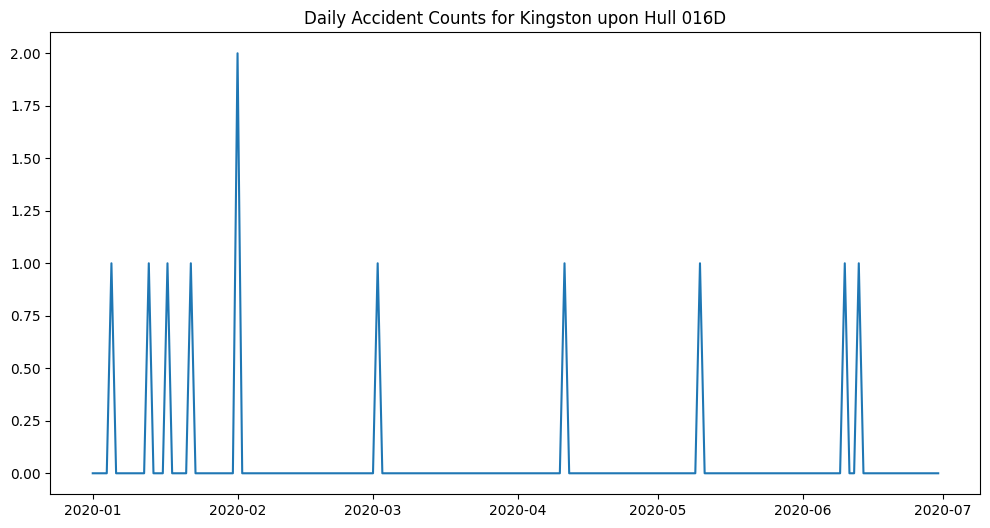


Processing Area: Kingston upon Hull 020B (LSOA ID: E01012848)


accident_index  accident_year accident_reference  location_easting_osgr  \
38003  2020160933982           2020          160933982               513875.0   
38013  2020160934801           2020          160934801               512307.0   
38113  2020160941407           2020          160941407               512276.0   
38196  2020160946275           2020          160946275               515457.0   
38479  2020160961028           2020          160961028               512253.0   
38765  2020160977600           2020          160977600               515449.0   

       location_northing_osgr  longitude   latitude  police_force  \
38003                429708.0  -0.274500  53.751328            16   
38013                429256.0  -0.298432  53.747607            16   
38113                429252.0  -0.298903  53.747578            16   
38196                429052.0  -0.250765  53.745088            16   
38479                429215.0  -0.299265  53.747251            16   
38765                429262.0  -0.250808  53.746976            16   

      accident_severity  number_of_vehicles  ...  \
38003            Slight                   2  ...   
38013           Serious                   3  ...   
38113            Slight                   2  ...   
38196            Slight                   2  ...   
38479           Serious                   3  ...   
38765            Slight                   2  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
38003                                        0         Daylight   
38013                                        0         Daylight   
38113                                        0         Daylight   
38196                                        5         Daylight   
38479                                        8         Daylight   
38765                                        0         Daylight   

          weather_conditions road_surface_conditions  \
38003     Fine no high winds                     Dry   
38013  Raining no high winds             Wet or damp   
38113     Fine no high winds                     Dry   
38196     Fine no high winds                     Dry   
38479     Fine no high winds                     Dry   
38765     Fine no high winds                     Dry   

       special_conditions_at_site carriageway_hazards urban_or_rural_area  \
38003                           0                   0                   1   
38013                           0                   0                   1   
38113                           0                   0                   1   
38196                           0                   0                   2   
38479                           0                   0                   1   
38765                           0                   0                   1   

       did_police_officer_attend_scene_of_accident  trunk_road_flag  \
38003                                            1                2   
38013                                            1                1   
38113                                            2                1   
38196                                            2                1   
38479                                            1                1   
38765                                            1                2   

       lsoa_of_accident_location  
38003                  E01012848  
38013                  E01012848  
38113                  E01012848  
38196                  E01012848  
38479                  E01012848  
38765                  E01012848  

[6 rows x 36 columns]

Time Series Data for Kingston upon Hull 020B


2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
2020-01-05    0
             ..
2020-06-26    0
2020-06-27    0
2020-06-28    0
2020-06-29    0
2020-06-30    1
Freq: D, Name: accident_index, Length: 182, dtype: int64

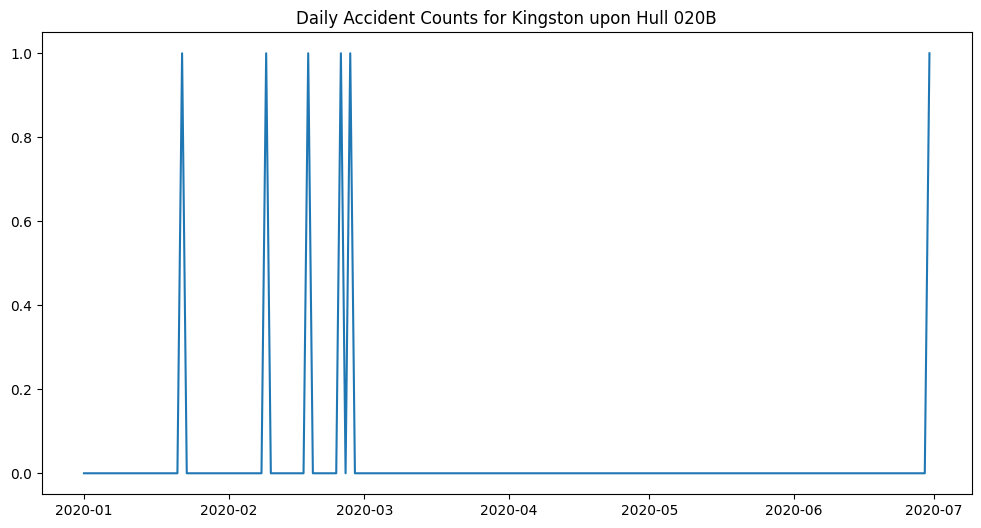


Processing Area: Kingston upon Hull 024B (LSOA ID: E01012852)


accident_index  accident_year accident_reference  location_easting_osgr  \
37979  2020160931334           2020          160931334               508241.0   
38027  2020160935470           2020          160935470               508460.0   
38260  2020160949104           2020          160949104               508289.0   
38486  2020160961366           2020          160961366               508353.0   
38981  2020160987143           2020          160987143               508293.0   

       location_northing_osgr  longitude   latitude  police_force  \
37979                429594.0  -0.359943  53.751503            16   
38027                429508.0  -0.356653  53.750685            16   
38260                429118.0  -0.359382  53.747216            16   
38486                428674.0  -0.358567  53.743214            16   
38981                429035.0  -0.359350  53.746470            16   

      accident_severity  number_of_vehicles  ...  \
37979            Slight                   2  ...   
38027           Serious                   1  ...   
38260            Slight                   3  ...   
38486             Fatal                   1  ...   
38981            Slight                   2  ...   

       pedestrian_crossing_physical_facilities       light_conditions  \
37979                                        0  Darkness - lights lit   
38027                                        4  Darkness - lights lit   
38260                                        0               Daylight   
38486                                        5  Darkness - lights lit   
38981                                        0  Darkness - lights lit   

          weather_conditions road_surface_conditions  \
37979     Fine no high winds                     Dry   
38027     Fine no high winds                     Dry   
38260     Fine no high winds                     Dry   
38486  Raining no high winds             Wet or damp   
38981     Fine no high winds             Wet or damp   

       special_conditions_at_site carriageway_hazards urban_or_rural_area  \
37979                           0                   0                   1   
38027                           0                   0                   1   
38260                           0                   0                   1   
38486                           0                   0                   1   
38981                           0                   0                   1   

       did_police_officer_attend_scene_of_accident  trunk_road_flag  \
37979                                            2                2   
38027                                            1                2   
38260                                            1                2   
38486                                            1                2   
38981                                            1                2   

       lsoa_of_accident_location  
37979                  E01012852  
38027                  E01012852  
38260                  E01012852  
38486                  E01012852  
38981                  E01012852  

[5 rows x 36 columns]

Time Series Data for Kingston upon Hull 024B


2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
2020-01-05    1
             ..
2020-06-26    0
2020-06-27    0
2020-06-28    0
2020-06-29    0
2020-06-30    0
Freq: D, Name: accident_index, Length: 182, dtype: int64

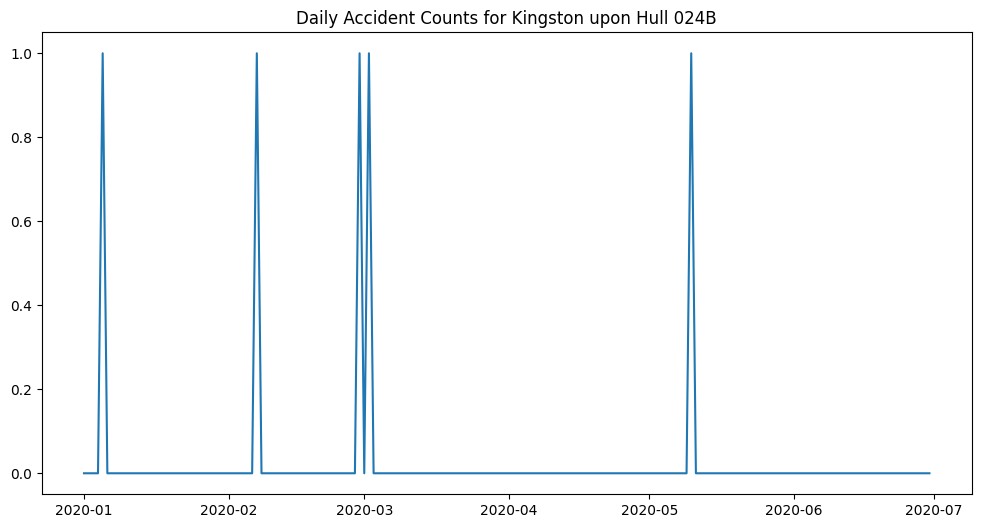

In [115]:
#dictionary of top 3 LSOAs and their names
hull_top3_areas = {'Kingston upon Hull 016D': 'E01012817', 
                   'Kingston upon Hull 020B': 'E01012848', 
                   'Kingston upon Hull 024B': 'E01012852'}

#forecasts dictionary to store results
forecasts = {}

#process each LSOA in the dictionary
for area_name, lsoa_id in hull_top3_areas.items():
    print(f"\nProcessing Area: {area_name} (LSOA ID: {lsoa_id})")    #should lsoa_id rather be lsoa01cd value from the data 
    
    #filter data for the specific LSOA
    lsoa_data = cleaned_accidents_df[
        (cleaned_accidents_df['lsoa_of_accident_location'] == lsoa_id) &
        (cleaned_accidents_df['date'] >= '2020-01-01') &
        (cleaned_accidents_df['date'] <= '2020-06-30')
    ]
    daily_accidents = lsoa_data.groupby('date')['accident_index'].count()
    daily_accidents = daily_accidents.reindex(
        pd.date_range(start='2020-01-01', end='2020-06-30'),
        fill_value=0
    )
    display(lsoa_data)

    print(f"Time Series Data for {area_name}")
    display(daily_accidents)
     #checking if series is constant
    if daily_accidents.max() == daily_accidents.min():
        print(f"The series for {area_name} (LSOA {lsoa_id}) is constant (all values are {daily_accidents.max()}). Skipping.")
        continue

    #Visualize time series
    plt.figure(figsize=(12, 6))
    plt.plot(daily_accidents)
    plt.title(f"Daily Accident Counts for {area_name}")
    plt.show()



In [119]:
## The high incedent areas do hav ea lot of sparse data which wont be very effective for time series modelling but 
#I will give it a try at following the instruction, I have tried with both the cleand and uncleaned data but still getting sparsed data in both cases . 
#Considering that I have sparse data, which breaks key assumptions of ARIMA/SARIMA models an alternative would be Poisson Time Series Model or 
#Zero-Inflated Poisson (ZIP) Model which are out of the scope of this task. 


Analyzing Area: Kingston upon Hull 016D (LSOA ID: E01012817)


<Figure size 1200x1000 with 0 Axes>

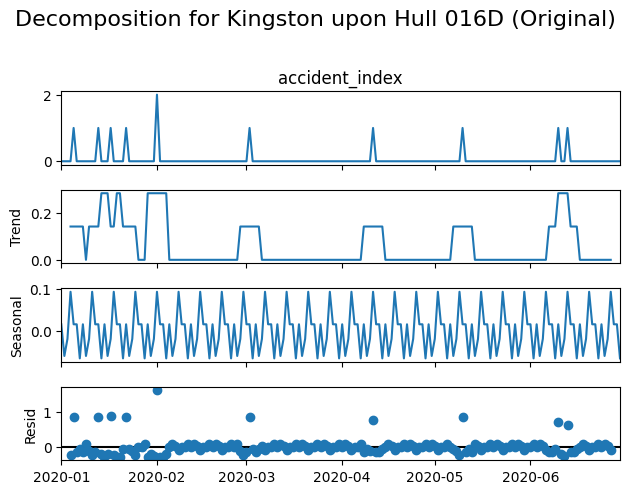

ADF Test p-value for Kingston upon Hull 016D: 2.3866514521353828e-26


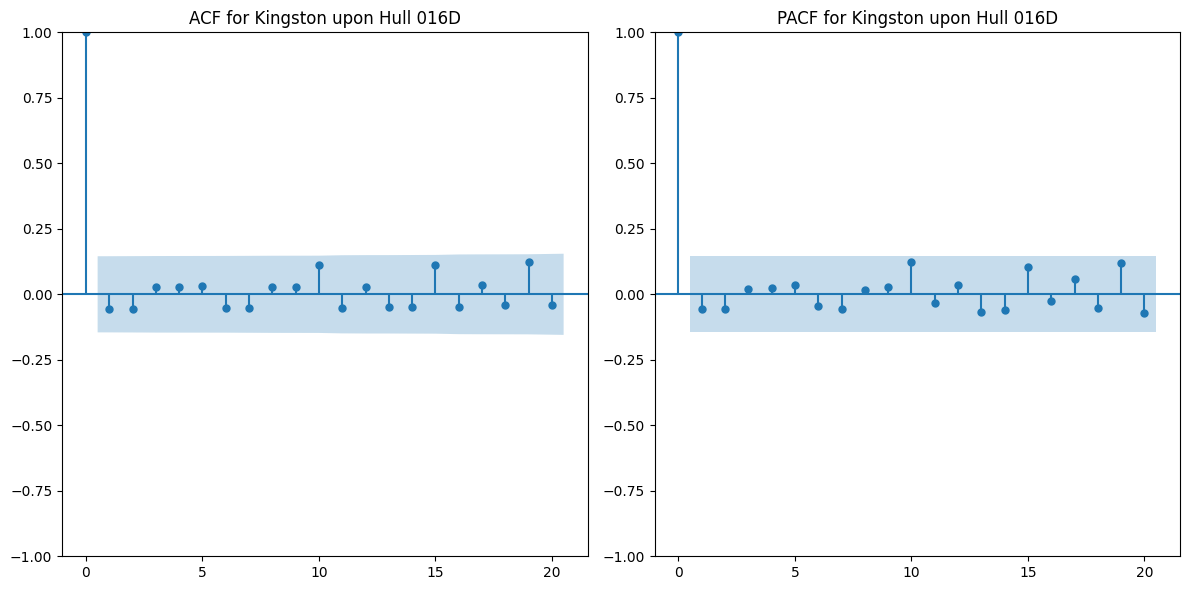


Analyzing Area: Kingston upon Hull 020B (LSOA ID: E01012848)


<Figure size 1200x1000 with 0 Axes>

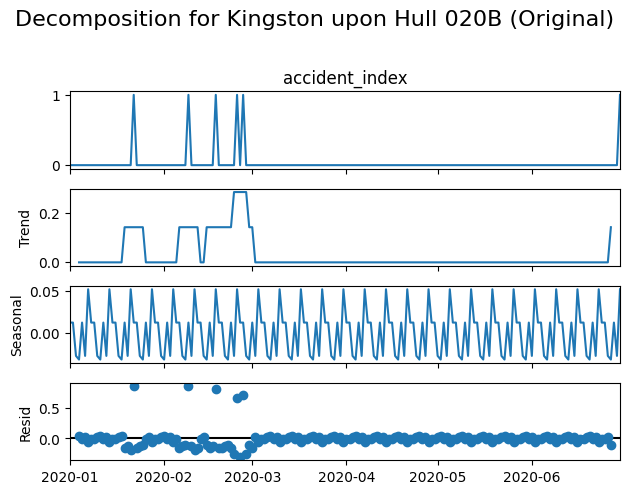

ADF Test p-value for Kingston upon Hull 020B: 0.09137612100483311
The series for Kingston upon Hull 020B is not stationary. Applying differencing.


<Figure size 1200x1000 with 0 Axes>

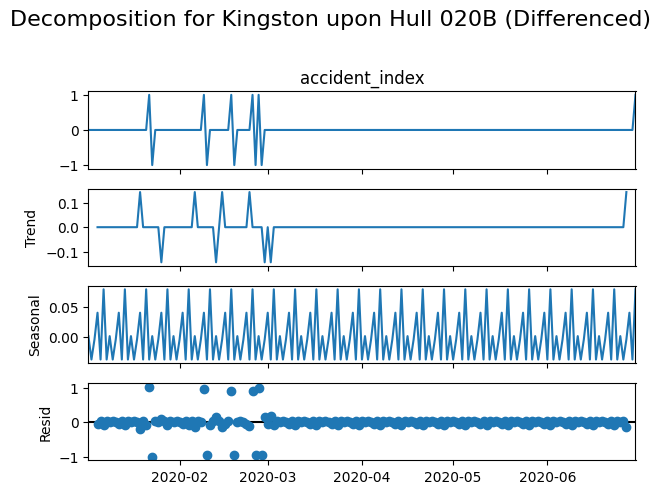

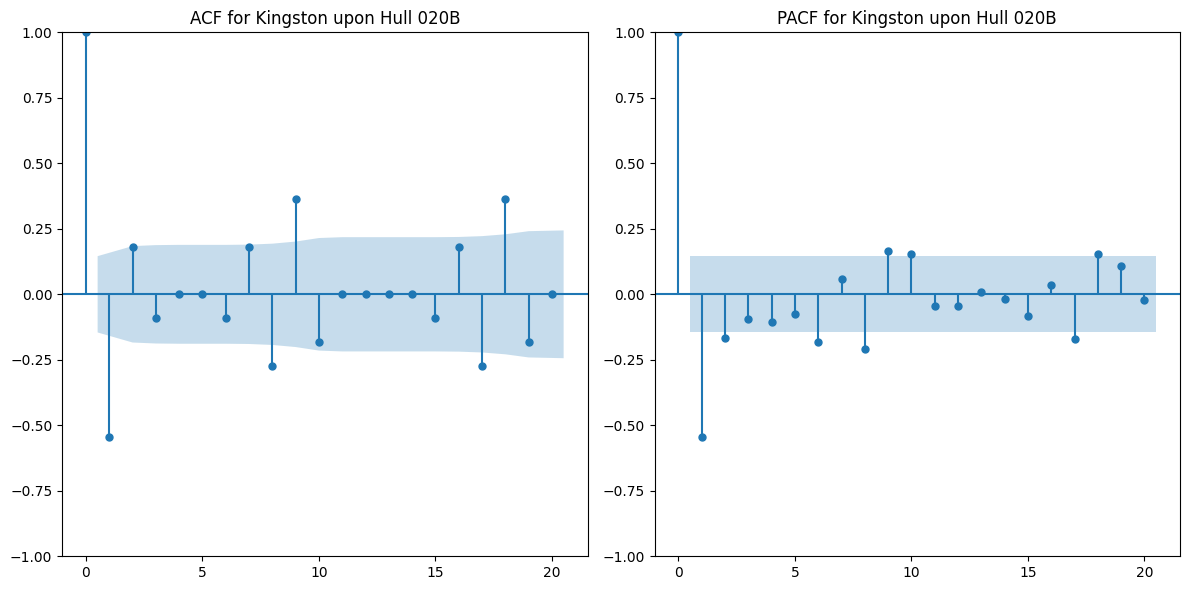


Analyzing Area: Kingston upon Hull 024B (LSOA ID: E01012852)


<Figure size 1200x1000 with 0 Axes>

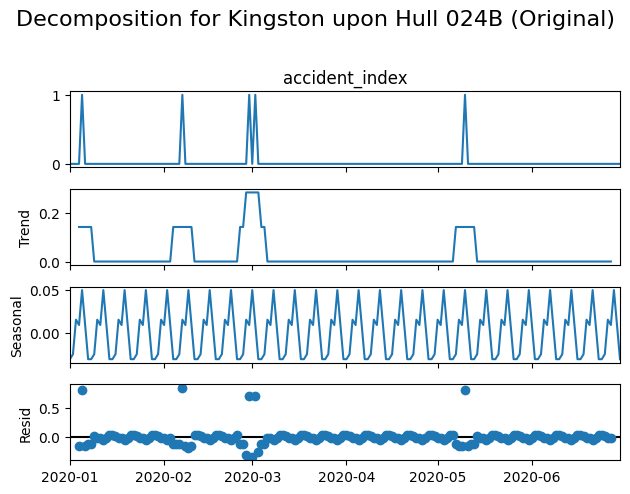

ADF Test p-value for Kingston upon Hull 024B: 2.601029948550994e-12


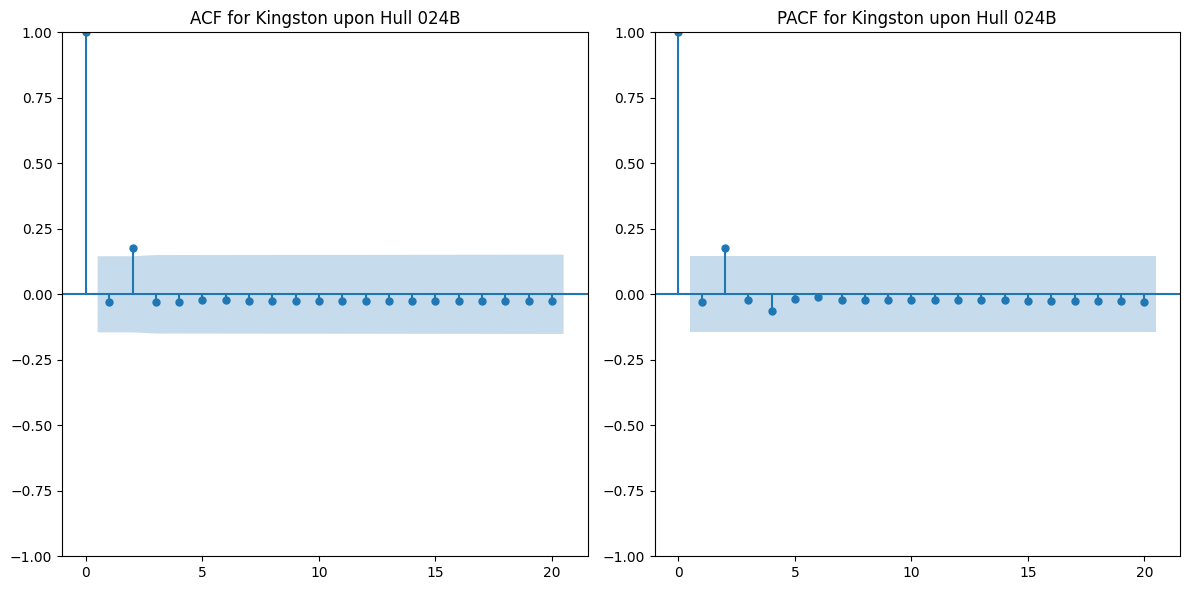

In [121]:
#Analysis before forecasting
def test_stationarity(series):
    """Perform ADF test and return p-value"""
    try:
        result = adfuller(series)
        return result[1]
    except:
        return None

# Process each LSOA for initial analysis
processed_series = {}  # Dictionary to store processed series
for area_name, lsoa_id in hull_top3_areas.items():
    print(f"\nAnalyzing Area: {area_name} (LSOA ID: {lsoa_id})")
    
    # Filter data
    lsoa_data = cleaned_accidents_df[
        (cleaned_accidents_df['lsoa_of_accident_location'] == lsoa_id) &
        (cleaned_accidents_df['date'] >= '2020-01-01') &
        (cleaned_accidents_df['date'] <= '2020-06-30')
    ].copy()
    
    # Create daily time series
    lsoa_data['date'] = pd.to_datetime(lsoa_data['date'])
    date_range = pd.date_range(start='2020-01-01', end='2020-06-30', freq='D')
    daily_accidents = lsoa_data.groupby('date')['accident_index'].count().reindex(date_range, fill_value=0)
    
    # Store original series
    original_series = daily_accidents.copy()
    
    # Decomposition of original series
    plt.figure(figsize=(12, 10))
    decomposition = seasonal_decompose(daily_accidents, period=7)
    decomposition.plot()
    plt.suptitle(f"Decomposition for {area_name} (Original)", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'decomposition_original_{area_name}.png')
    plt.show()
    
    # Stationarity test and differencing
    series_to_use = daily_accidents.copy()
    p_value = test_stationarity(series_to_use)
    differenced = False
    
    if p_value is not None:
        print(f"ADF Test p-value for {area_name}: {p_value}")
        if p_value > 0.05:
            print(f"The series for {area_name} is not stationary. Applying differencing.")
            series_to_use = series_to_use.diff().dropna()
            differenced = True
            
            # Decomposition of differenced series
            plt.figure(figsize=(12, 10))
            decomposition = seasonal_decompose(series_to_use, period=7)
            decomposition.plot()
            plt.suptitle(f"Decomposition for {area_name} (Differenced)", y=1.02, fontsize=16)
            plt.tight_layout()
            plt.savefig(f'decomposition_differenced_{area_name}.png')
            plt.show()
            
    # ACF and PACF of final series (original or differenced)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_acf(series_to_use, lags=20, ax=plt.gca())
    plt.title(f"ACF for {area_name}")
    plt.subplot(1, 2, 2)
    plot_pacf(series_to_use, lags=20, ax=plt.gca())
    plt.title(f"PACF for {area_name}")
    plt.tight_layout()
    plt.savefig(f'acf_pacf_{area_name}.png')
    plt.show()
    
    # Store processed series and differencing info
    processed_series[area_name] = {
        'original': original_series,
        'processed': series_to_use,
        'differenced': differenced
    }


Processing Area: Kingston upon Hull 016D (LSOA ID: E01012817)
Best parameters for Kingston upon Hull 016D: (0, 1, 1, 0, 0, 0)


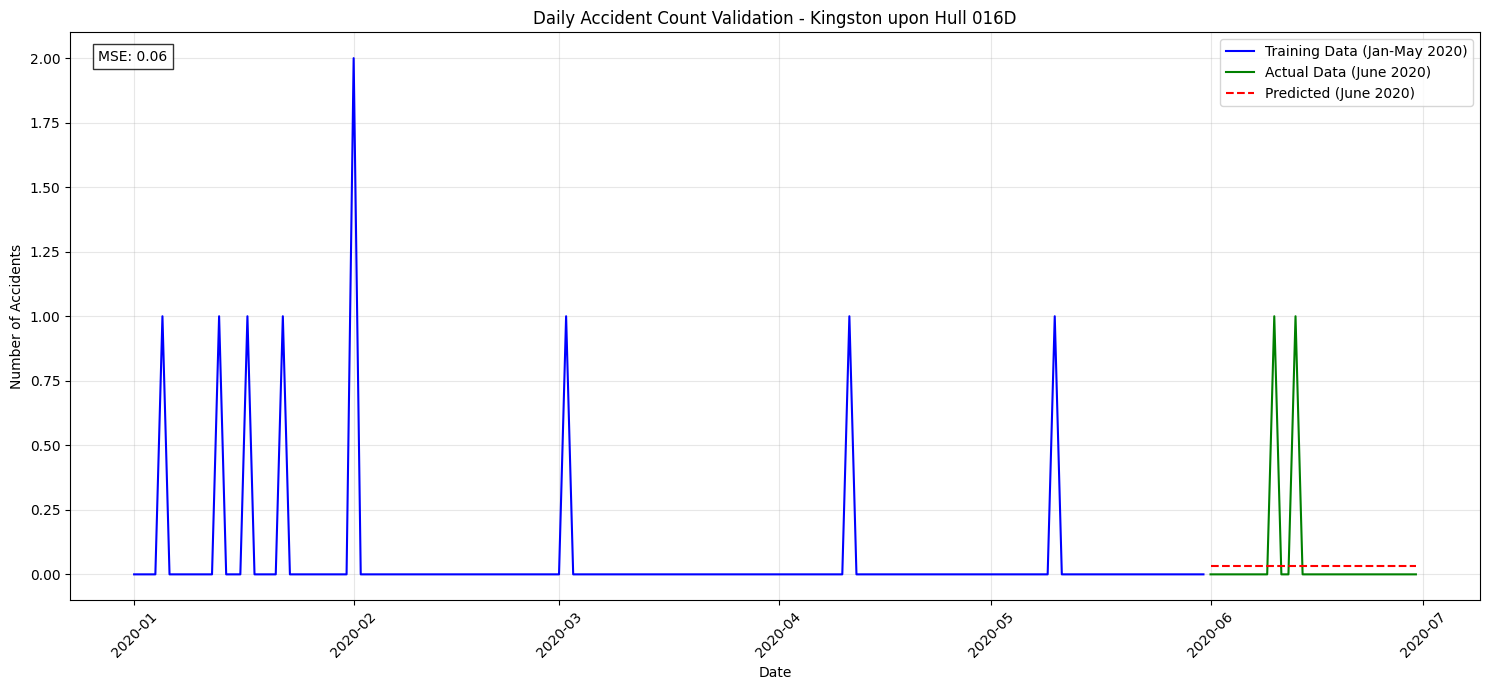

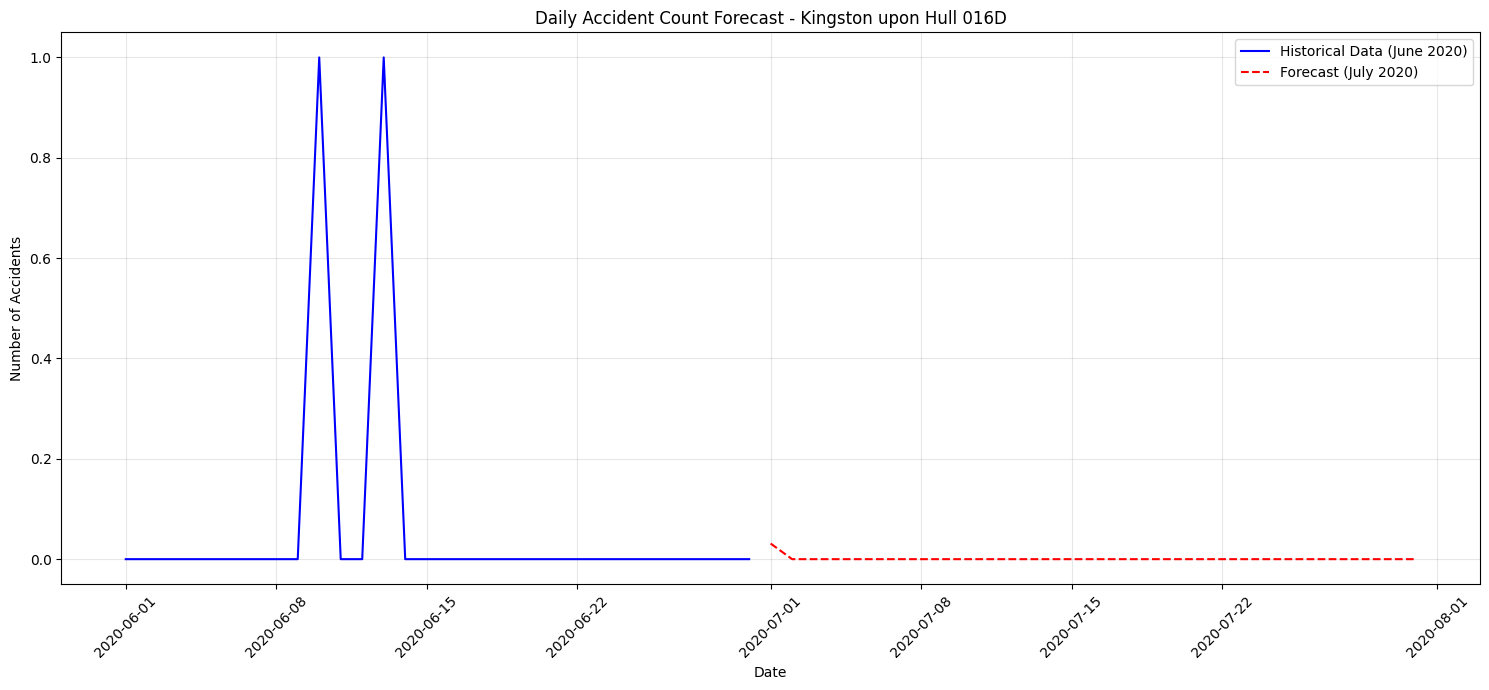


Validation MSE for Kingston upon Hull 016D: 0.06

July 2020 Forecast Summary:
Average daily accidents: 0.00
Maximum daily accidents: 0.03
Minimum daily accidents: 0.00

Processing Area: Kingston upon Hull 020B (LSOA ID: E01012848)
Best parameters for Kingston upon Hull 020B: (0, 0, 0, 1, 0, 0)


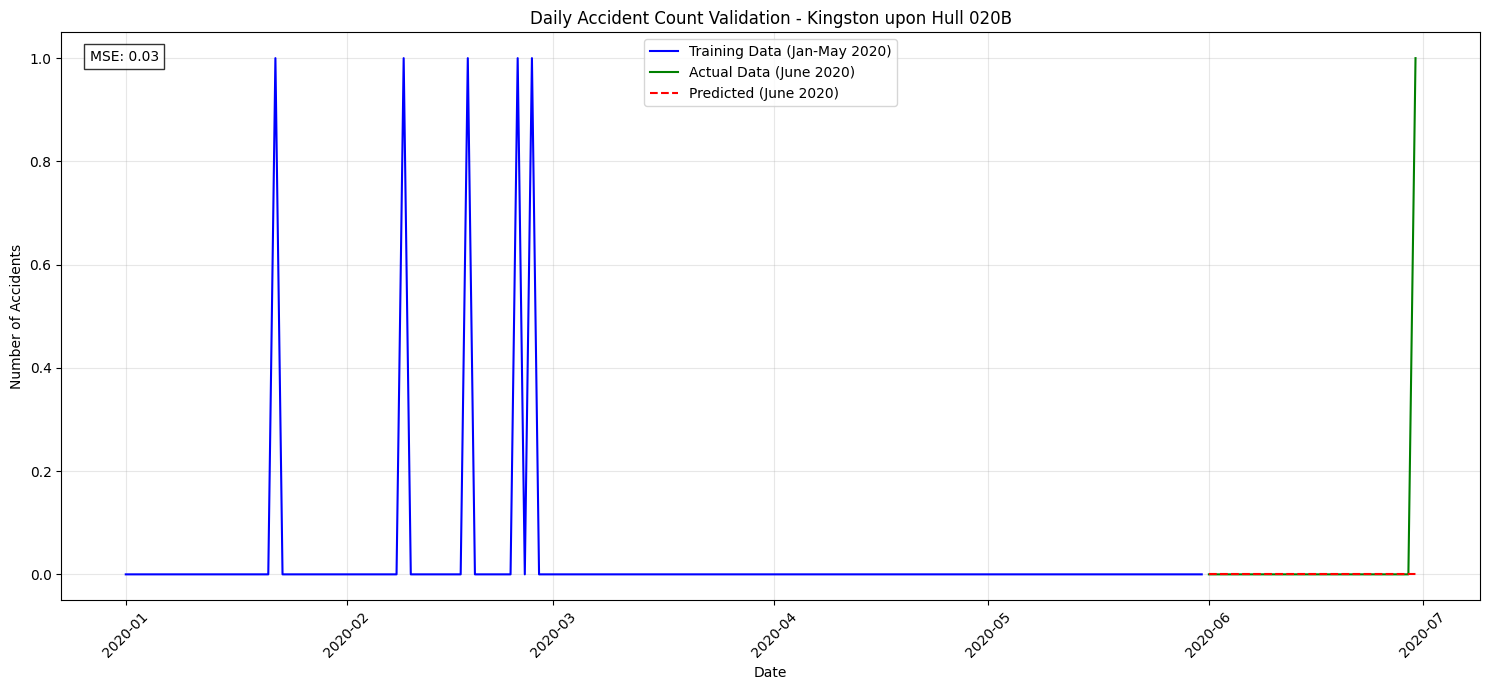

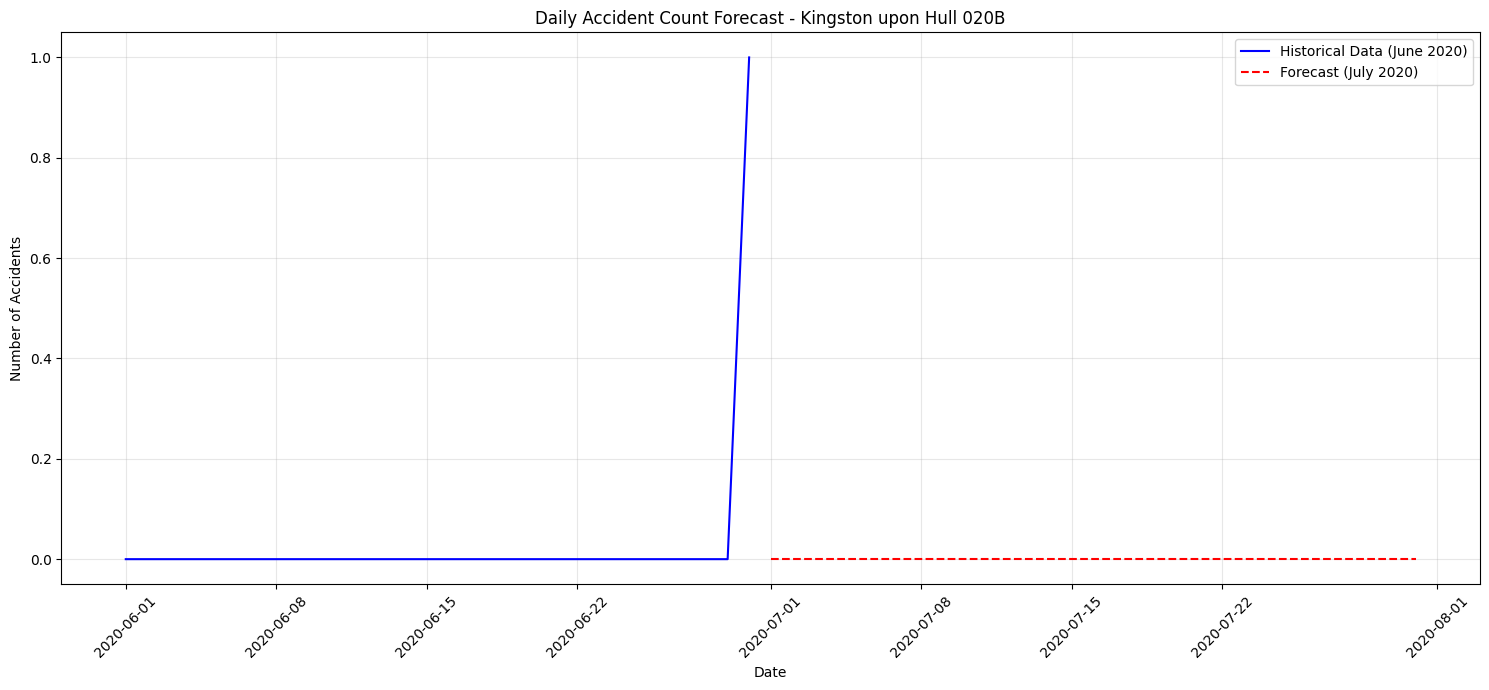


Validation MSE for Kingston upon Hull 020B: 0.03

July 2020 Forecast Summary:
Average daily accidents: 0.00
Maximum daily accidents: 0.00
Minimum daily accidents: 0.00

Processing Area: Kingston upon Hull 024B (LSOA ID: E01012852)
Best parameters for Kingston upon Hull 024B: (0, 0, 0, 0, 0, 0)


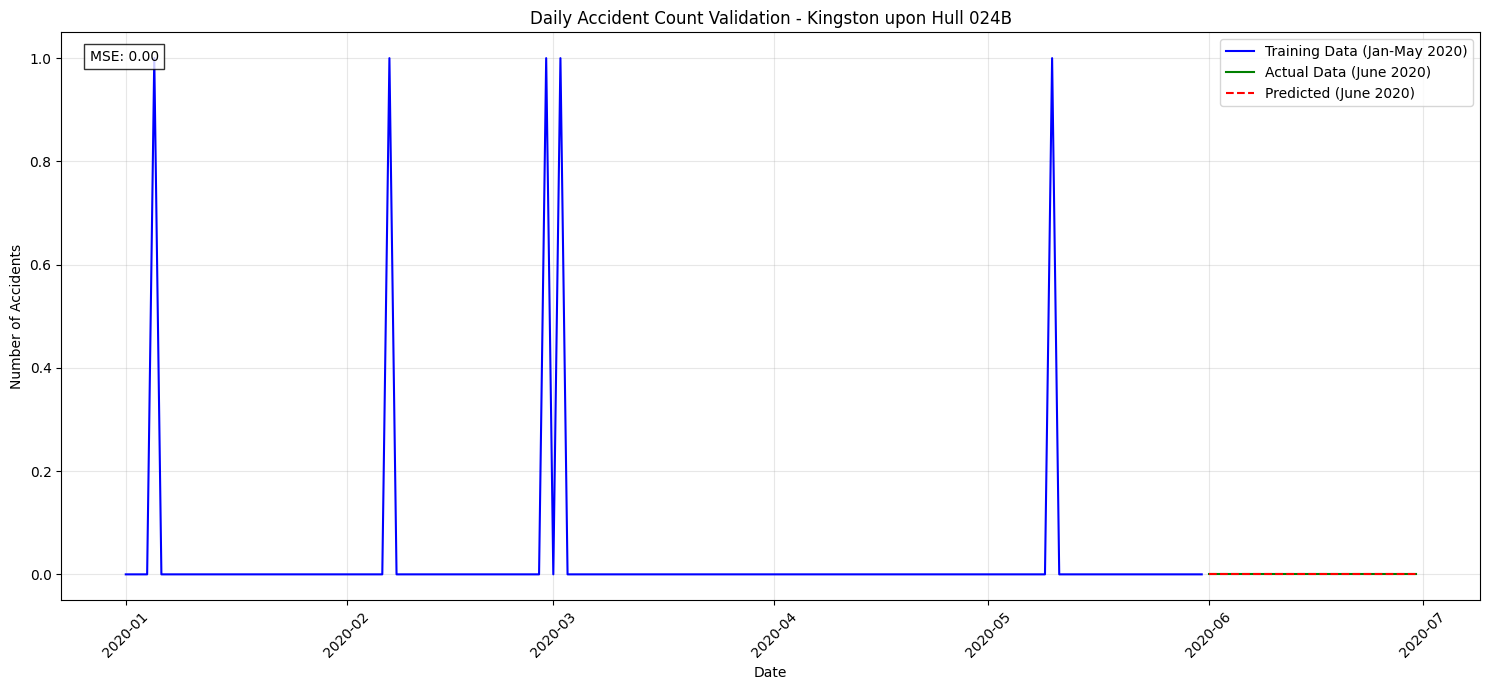

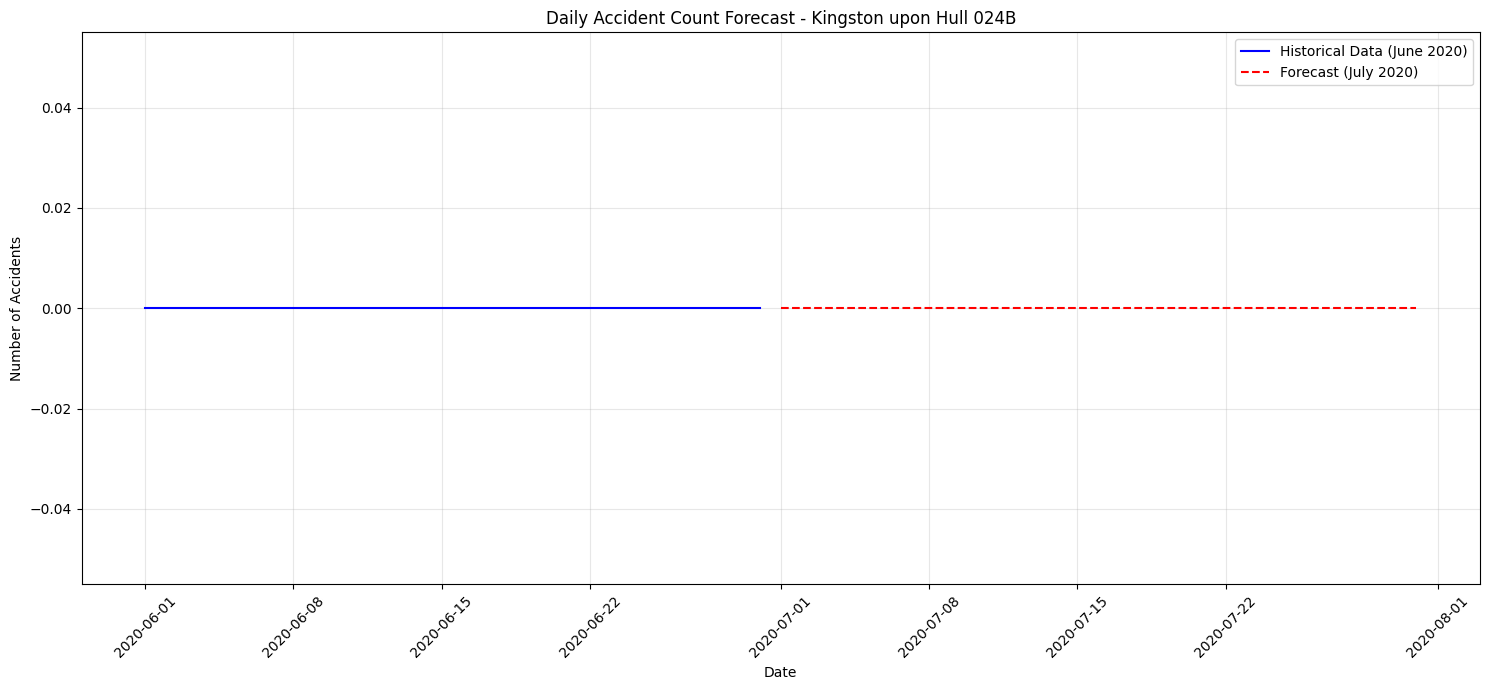


Validation MSE for Kingston upon Hull 024B: 0.00

July 2020 Forecast Summary:
Average daily accidents: 0.00
Maximum daily accidents: 0.00
Minimum daily accidents: 0.00

Final Results Summary:

Kingston upon Hull 016D:
Validation MSE: 0.06
July 2020 Forecast:
2020-07-01    0.031182
2020-07-02    0.000000
2020-07-03    0.000000
2020-07-04    0.000000
2020-07-05    0.000000
2020-07-06    0.000000
2020-07-07    0.000000
2020-07-08    0.000000
2020-07-09    0.000000
2020-07-10    0.000000
2020-07-11    0.000000
2020-07-12    0.000000
2020-07-13    0.000000
2020-07-14    0.000000
2020-07-15    0.000000
2020-07-16    0.000000
2020-07-17    0.000000
2020-07-18    0.000000
2020-07-19    0.000000
2020-07-20    0.000000
2020-07-21    0.000000
2020-07-22    0.000000
2020-07-23    0.000000
2020-07-24    0.000000
2020-07-25    0.000000
2020-07-26    0.000000
2020-07-27    0.000000
2020-07-28    0.000000
2020-07-29    0.000000
2020-07-30    0.000000
2020-07-31    0.000000
Freq: D, Name: predicted_me

In [117]:
def optimize_SARIMA_daily(endog, order_list, s=7):
    """
    Optimize SARIMA parameters for daily data.
    s=7 for weekly seasonality in daily data
    """
    results = []
    for order in order_list:
        try:
            model = SARIMAX(
                endog,
                order=(order[0], order[1], order[2]),
                seasonal_order=(order[3], order[4], order[5], s),
                simple_differencing=False
            ).fit(disp=False)
            aic = model.aic
            results.append([order, aic])
        except:
            continue
    
    result_df = pd.DataFrame(results, columns=['order', 'AIC'])
    return result_df.sort_values(by='AIC').reset_index(drop=True)

def plot_daily_validation(train, test, forecast, area_name):
    """Plot validation results for daily predictions"""
    plt.figure(figsize=(15, 7))
    
    # Plot training data
    plt.plot(train.index, train, label='Training Data (Jan-May 2020)', color='blue')
    
    # Plot test data
    plt.plot(test.index, test, label='Actual Data (June 2020)', color='green')
    
    # Plot forecast
    plt.plot(test.index, forecast, label='Predicted (June 2020)', 
             color='red', linestyle='--')
    
    plt.title(f'Daily Accident Count Validation - {area_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Calculate and display MSE
    mse = np.mean((test - forecast) ** 2)
    plt.text(0.02, 0.95, f'MSE: {mse:.2f}', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'daily_validation_{area_name}.png')
    plt.show()
    
    return mse

def plot_daily_forecast(historical, forecast, area_name):
    """Plot forecast for next month"""
    plt.figure(figsize=(15, 7))
    
    # Plot historical data (last month)
    plt.plot(historical.index[-30:], historical[-30:], 
             label='Historical Data (June 2020)', color='blue')
    
    # Fill NaN values with 0 for plotting
    forecast = forecast.fillna(0)
    
    # Plot forecast
    plt.plot(forecast.index, forecast, 
             label='Forecast (July 2020)', color='red', linestyle='--')
    
    plt.title(f'Daily Accident Count Forecast - {area_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'daily_forecast_{area_name}.png')
    plt.show()

# Set parameter ranges for daily data
ps = range(0, 2)  # AR terms
ds = range(0, 2)  # Differencing
qs = range(0, 2)  # MA terms
Ps = range(0, 2)  # Seasonal AR
Ds = range(0, 1)  # Seasonal differencing
Qs = range(0, 1)  # Seasonal MA
SARIMA_order_list = list(product(ps, ds, qs, Ps, Ds, Qs))

# Process each LSOA
forecasts = {}
for area_name, lsoa_id in hull_top3_areas.items():
    print(f"\nProcessing Area: {area_name} (LSOA ID: {lsoa_id})")
    
    # Filter data for Jan-Jun 2020
    lsoa_data = cleaned_accidents_df[
        (cleaned_accidents_df['lsoa_of_accident_location'] == lsoa_id) &
        (cleaned_accidents_df['date'] >= '2020-01-01') &
        (cleaned_accidents_df['date'] <= '2020-06-30')
    ].copy()
    
    # Create daily time series
    lsoa_data['date'] = pd.to_datetime(lsoa_data['date'])
    date_range = pd.date_range(start='2020-01-01', end='2020-06-30', freq='D')
    daily_accidents = lsoa_data.groupby('date')['accident_index'].count().reindex(date_range, fill_value=0)
    
    # Split into train/test
    train = daily_accidents[:'2020-05-31']
    test = daily_accidents['2020-06-01':]
    
    if len(daily_accidents.unique()) == 1:
        print(f"Warning: Constant series for {area_name}")
        continue
    
    # Optimize SARIMA parameters
    result_df = optimize_SARIMA_daily(train, SARIMA_order_list)
    
    if not result_df.empty:
        best_order = result_df.iloc[0]['order']
        print(f"Best parameters for {area_name}: {best_order}")
        
        try:
            # Fit model
            model = SARIMAX(
                train,
                order=(best_order[0], best_order[1], best_order[2]),
                seasonal_order=(best_order[3], best_order[4], best_order[5], 7),
                simple_differencing=False
            ).fit(disp=False)
            
            # Generate validation forecast
            validation_forecast = model.forecast(steps=len(test))
            mse = plot_daily_validation(train, test, validation_forecast, area_name)
            
            # Generate July forecast
            july_forecast = model.forecast(steps=31)  # Get the forecast values
            july_dates = pd.date_range(start='2020-07-01', end='2020-07-31', freq='D')
            july_forecast = pd.Series(july_forecast, index=july_dates).fillna(0)  # Fill NaN with 0
            
            plot_daily_forecast(daily_accidents, july_forecast, area_name)
            
            forecasts[area_name] = {
                'model': model,
                'validation_mse': mse,
                'july_forecast': july_forecast
            }
            
            print(f"\nValidation MSE for {area_name}: {mse:.2f}")
            print("\nJuly 2020 Forecast Summary:")
            print(f"Average daily accidents: {july_forecast.mean():.2f}")
            print(f"Maximum daily accidents: {july_forecast.max():.2f}")
            print(f"Minimum daily accidents: {july_forecast.min():.2f}")
            
        except Exception as e:
            print(f"Error fitting model for {area_name}: {e}")
            
    else:
        print(f"No valid model found for {area_name}")

# Display final results
print("\nFinal Results Summary:")
for area_name, result in forecasts.items():
    print(f"\n{area_name}:")
    print(f"Validation MSE: {result['validation_mse']:.2f}")
    print("July 2020 Forecast:")
    print(result['july_forecast'])

In [127]:
### Please I will like a future correction on the rigt answer to question 7 just incase I am wrong with my approcah and answer.

## Social Network Analysis: Modular Implementation with Classes and Functions 
Since question 8 ,9 and 10 are all within the domain of social network analysis, then a class can be used for their collective implemenattion as well. 

In [46]:
class SocialNetworkAnalysis:
    def __init__(self, edge_list_file):
        """
        Initialize the SocialNetworkAnalysis class by loading the graph from an edge list file with validation of file and format

        Args:
            edge_list_file (str): Path to the edge list file.
        """
        if not os.path.exists(edge_list_file):
            raise FileNotFoundError(f"Edge list file {edge_list_file} not found")
        if not edge_list_file.endswith('.txt'):
            raise ValueError("Edge list file must be a .txt file")
        self.graph = self.load_graph(edge_list_file)

    def load_graph(self, file_path):
        """
        Load the social network graph from an edge list file.

        Args:
            file_path (str): Path to the edge list file.

        Returns:
            nx.Graph: Loaded graph.
        """
        #use NetworkX's read_edgelist function to create a graph from an edge list file.
        #nodetype=int ensures the nodes are interpreted as integers.
        G = nx.read_edgelist(file_path, nodetype=int)
        return G

    #Question 8 implementation
    def visualize_network(self):
        """
        Visualize the social network graph.

        Args:
            title (str): Title of the plot.
        """
        #create a matplotlib figure with a specified size.
        plt.figure(figsize=(10, 10))

        #use NetworkX's spring_layout to position the nodes.
        #seed ensures consistent layouts across runs.
        pos = nx.spring_layout(self.graph, seed=42)

        #draw the graph with small node sizes and gray edges. Labels are disabled for clarity.
        nx.draw(self.graph, pos, node_size=10, edge_color="gray", with_labels=False)

        #add a title to the plot and display it.
        plt.title("Social Network Visualization", fontsize=16)
        plt.tight_layout()
        plt.savefig('Social_Network_Visualization.png')  #save the plot to a file.
        plt.show()

    def calculate_basic_characteristics(self):
        """
        Calculate and print basic network characteristics.

        Returns:
            dict: Dictionary containing network characteristics.
        """
        #calculate the number of nodes in the graph.
        num_nodes = self.graph.number_of_nodes()

        #calculate the number of edges in the graph.
        num_edges = self.graph.number_of_edges()

        #calculate the density of the graph (actual edges divided by possible edges).
        density = nx.density(self.graph)

        #calculate the average degree of the graph.
        avg_degree = sum(dict(self.graph.degree()).values()) / num_nodes

        #store the calculated metrics in a dictionary.
        characteristics = {
            "Number of Nodes": num_nodes,
            "Number of Edges": num_edges,
            "Network Density": density,
            "Average Degree": avg_degree
        }

        #print the metrics in a formatted way.
        print("Basic Network Characteristics:")
        for key, value in characteristics.items():
            #format floating-point values to four decimal places.
            print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")

        return characteristics

    #Question 9 implementation
    def calculate_edge_betweenness_centrality(self):
        """
        Calculate and plot the distribution of edge betweenness centrality.

        Returns:
            dict: Edge betweenness centrality values.
        """
        print("Calculating edge betweenness centrality...")

        #calculate edge betweenness centrality for all edges in the graph.
        edge_centrality = nx.edge_betweenness_centrality(self.graph)
        
        #plot the distribution of edge betweenness centrality values.
        plt.figure(figsize=(10, 6))  #create a new figure with a specified size.
        
        #create a histogram of centrality values with 50 bins.
        plt.hist(edge_centrality.values(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)

        #add a title and axis labels to the histogram.
        plt.title("Distribution of Edge Betweenness Centrality", fontsize=16)
        plt.xlabel("Edge Betweenness Centrality", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

        #add gridlines to the y-axis for better readability.
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        #adjust layout to prevent overlap and save the figure.
        plt.tight_layout()
        plt.savefig('Distribution_of_Edge_Betweenness_Centrality.png')
        plt.show()

        return edge_centrality

    #Question 10 implementation    
    def detect_communities_girvan_newman(self):
        """
        Detect communities using the Girvan-Newman method.

        Returns:
            list: List of communities.
        """
        print("Detecting communities using Girvan-Newman method...")

        #use the Girvan-Newman algorithm to detect communities.
        comp = girvan_newman(self.graph)

        #get the first level of communities and sort nodes within each community.
        communities = tuple(sorted(c) for c in next(comp))

        #count the number of communities and their sizes.
        num_communities = len(communities)
        sizes = [len(c) for c in communities]

        #print the number of communities and the size of each community.
        print(f"Girvan-Newman Method:")
        print(f"Number of Communities: {num_communities}")
        print(f"Sizes of Communities: {sizes}")

        return communities

    def visualize_communities_girvan_newman(self, communities):
        """
        Visualize communities detected by the Girvan-Newman method.

        Args:
            communities (list): List of communities.
        """
        #generate a layout for the graph using spring layout.
        pos = nx.spring_layout(self.graph, seed=42)

        #assign a unique color to each community.
        color_map = {node: i for i, community in enumerate(communities) for node in community}
        node_colors = [color_map[node] for node in self.graph.nodes()]

        #create a figure and draw the graph with colored nodes based on their community.
        plt.figure(figsize=(10, 10))
        nx.draw(self.graph, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.tab20)
        plt.title("Girvan-Newman Community Detection")
        plt.show()

    def detect_communities_louvain(self):
        """
        Detect communities using the Louvain method.

        Returns:
            dict: Dictionary mapping nodes to their community.
        """
        print("Detecting communities using Louvain method...")

        #use the Louvain method to detect communities by maximizing modularity.
        partition = community_louvain.best_partition(self.graph)

        #group nodes by their community.
        communities = {}
        for node, comm in partition.items():
            communities.setdefault(comm, []).append(node)

        #count the number of communities and their sizes.
        num_communities = len(communities)
        sizes = [len(nodes) for nodes in communities.values()]

        #print the number of communities and the size of each community.
        print(f"Louvain Method:")
        print(f"Number of Communities: {num_communities}")
        print(f"Sizes of Communities: {sizes}")

        return partition

    def visualize_communities_louvain(self, partition):
        """
        Visualize communities detected by the Louvain method.

        Args:
            partition (dict): Dictionary mapping nodes to their community.
        """
        #generate a layout for the graph using spring layout.
        pos = nx.spring_layout(self.graph, seed=42)

        #assign a color to each node based on its community.
        node_colors = [partition[node] for node in self.graph.nodes()]

        #create a figure and draw the graph with colored nodes based on their community.
        plt.figure(figsize=(10, 10))
        nx.draw(self.graph, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.tab20)
        plt.title("Louvain Community Detection")
        plt.show()


## Question 8 
Construct a social network using the provided data and visualise the network, then provide the basic network characteristics, including numbers of nodes and edges, network density, average degree.

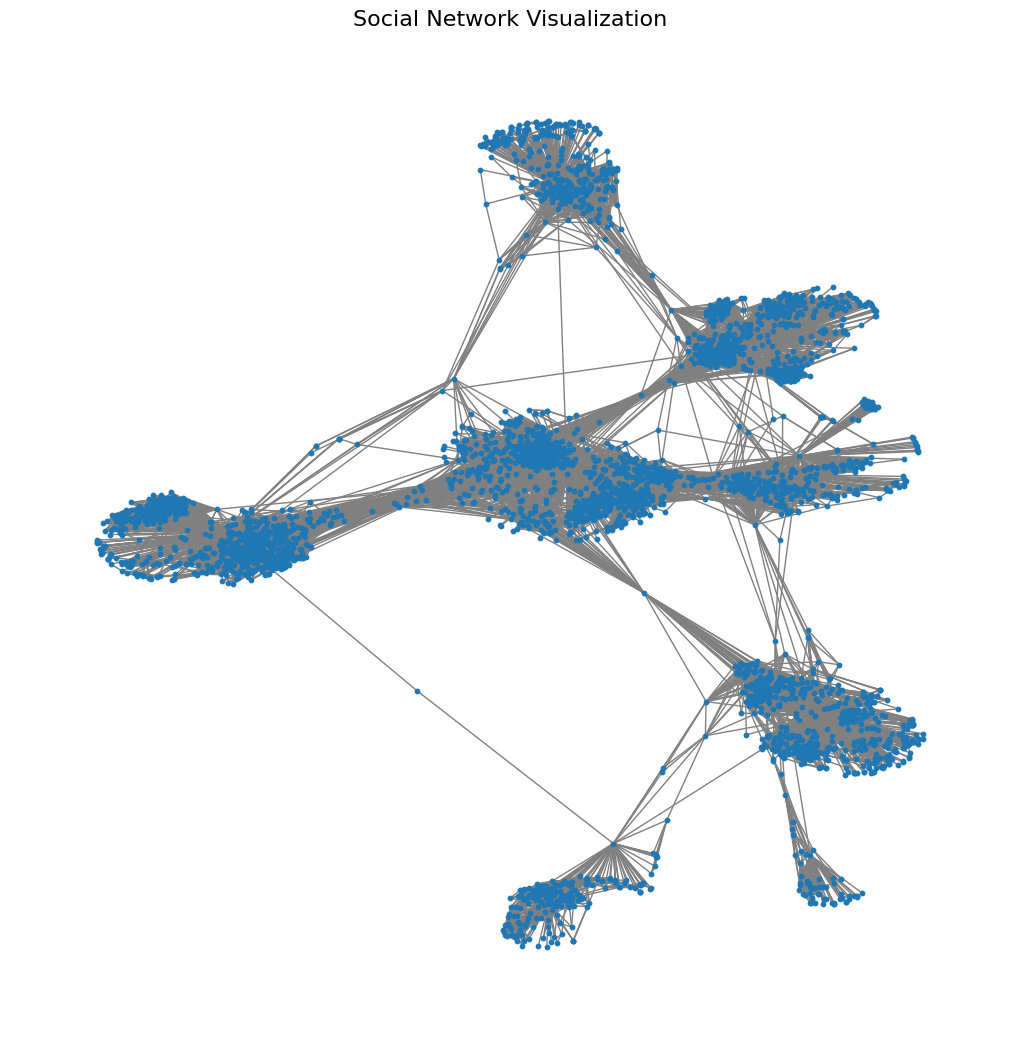

Basic Network Characteristics:
Number of Nodes: 4039
Number of Edges: 88234
Network Density: 0.0108
Average Degree: 43.6910


{'Number of Nodes': 4039,
 'Number of Edges': 88234,
 'Network Density': 0.010819963503439287,
 'Average Degree': 43.69101262688784}

In [45]:
#NetworkX Library: Utilized for its robust graph handling capabilities, allowing efficient loading and manipulation of large networks. 
#Visualization: Employed matplotlib for visual representation, providing insights into the network's structure and connectivity.
edge_list_file = 'facebook_combined.txt'   #file path
sna = SocialNetworkAnalysis(edge_list_file)     #SocialNetworkAnalysis class initialization 

sna.visualize_network()  #visualize_network method call or invokation
sna.calculate_basic_characteristics() #calculate_basic_characteristicsk method call or invokation

## Question  9
Calculate the edge centrality of this network and plot the distribution of the edge centrality values.

Calculating edge betweenness centrality...


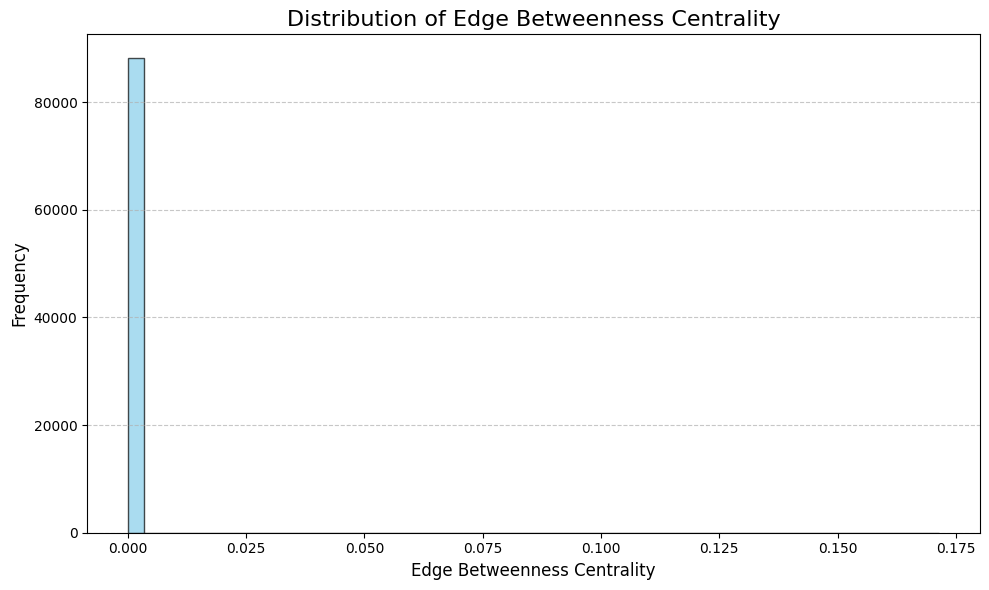

{(0, 1): 0.00040049937955461345,
 (0, 2): 0.0004923848145417046,
 (0, 3): 0.0004287786850298508,
 (0, 4): 0.000494007105805077,
 (0, 5): 0.0004102707367255275,
 (0, 6): 0.0004943238949383351,
 (0, 7): 0.00038541192817595303,
 (0, 8): 0.0004941910478824526,
 (0, 9): 0.00036799034834932996,
 (0, 10): 0.00042155934476553373,
 (0, 11): 0.0004951720722951225,
 (0, 12): 0.0004951720722951225,
 (0, 13): 0.00038378055161711246,
 (0, 14): 0.0004916192164720352,
 (0, 15): 0.0004951720722951225,
 (0, 16): 0.00048681365670770943,
 (0, 17): 0.0004910670496064318,
 (0, 18): 0.0004951720722951225,
 (0, 19): 0.0004895878244032402,
 (0, 20): 0.0004917922582781589,
 (0, 21): 0.0003490742281667195,
 (0, 22): 0.0004152807378449189,
 (0, 23): 0.0004897151239996462,
 (0, 24): 0.0004832051553132059,
 (0, 25): 0.0003673549680936626,
 (0, 26): 0.00036784255714446886,
 (0, 27): 0.00042273172334349564,
 (0, 28): 0.0004917973677803083,
 (0, 29): 0.0004859359902242319,
 (0, 30): 0.0004131537610889293,
 (0, 31): 0.

In [124]:
#Edge Betweenness Centrality: Measures the importance of edges by quantifying the number of shortest paths passing through each edge.
#This metric identifies critical connections that, if removed, could disrupt communication between nodes.
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html
sna.calculate_edge_betweenness_centrality()

## Question 10 
Use two community detection algorithms to detect the clusters/community within this social network, then compare the difference of results (the number of clusters and numbers of nodes in each cluster).

Detecting communities using Girvan-Newman method...
Girvan-Newman Method:
Number of Communities: 2
Sizes of Communities: [3833, 206]


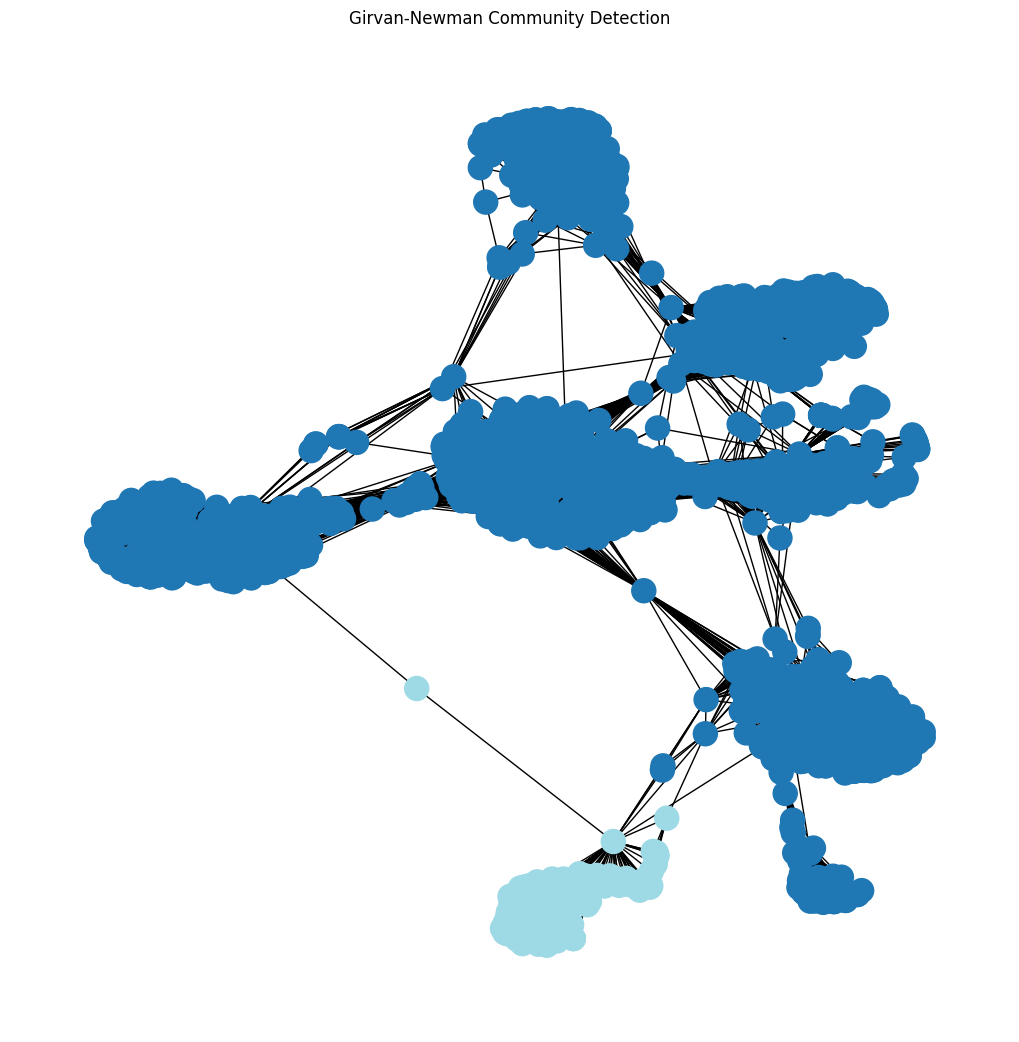

In [125]:
#Girvan-Newman Algorithm: A hierarchical divisive algorithm that iteratively removes edges with the highest betweenness centrality,
#effectively identifying communities by progressively separating the network into distinct groups. 
#https://networkx.org/documentation/stable/auto_examples/algorithms/plot_girvan_newman
communities_gn = sna.detect_communities_girvan_newman()
sna.visualize_communities_girvan_newman(communities_gn)

Detecting communities using Louvain method...
Louvain Method:
Number of Communities: 16
Sizes of Communities: [354, 432, 432, 423, 535, 326, 124, 548, 73, 237, 25, 60, 206, 226, 19, 19]


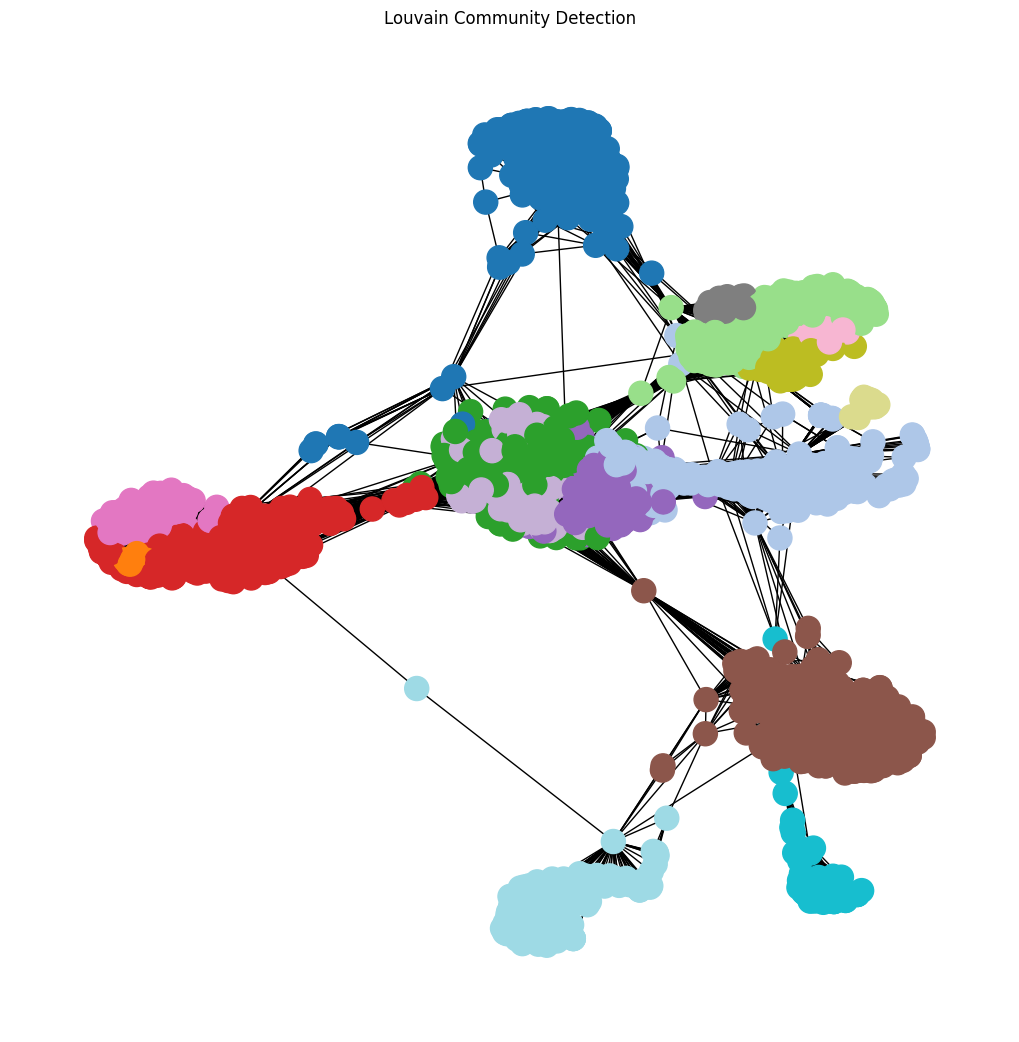

In [126]:
#Louvain Method: An efficient modularity-based algorithm that optimizes the partitioning of the network into communities, 
#aiming to maximize the density of edges within communities compared to edges between communities.
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html
partition_louvain = sna.detect_communities_louvain()
sna.visualize_communities_louvain(partition_louvain) 

In [ ]:
#Noted Differences 
#Girvan-Newman Algorithm took a longer compute time than Louvain Method
#Girvan-Newman Algorithm had just 2 Communitiess whereas Louvain Method had 16 Communities


In [129]:
##### Notebook End: Univeristy of Hull | DAIM | Student ID: 202403820 | Samuel Datubo Jaja